# Part 0: Introduction

We have a dataset which has been compiled and released for public use by a Portugese bank. The data contains several parameters recorded from their marketing campaign to sell their term deposits, as well as the result of the campaign, that is, if that particular person has bought the term deposit or not. In short, this dataset is giving information about the parameters which gave rise to a successful marketing attempt. The objective of this project is to apply all the techniques learned thus far onto this dataset. What we will be doing is to prepare the data, check the datatypes, do basic statistical analysis, exploratory data analytics (univariate, bivariate and multivariate) and finally apply different models and ensemble techniques to attempt to develop the most accurate predictive model.

## Parameters Explained

**Bank client data**
* 1 - age 
* 2 - job : type of job 
* 3 - marital : marital status
* 4 - education 
* 5 - default: has credit in default? 
* 6 - housing: has housing loan? 
* 7 - loan: has personal loan?
* 8 - balance in account

**Related to previous contact**
* 8 - contact: contact communication type
* 9 - day: last contact day of the month
* 10 - month: last contact month of year
* 11 - duration: last contact duration, in seconds*

**Other attributes**
* 12 - campaign: number of contacts performed during this campaign and for this client
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign
* 14 - previous: number of contacts performed before this campaign and for this client
* 15 - poutcome: outcome of the previous marketing campaign

**Output variable (desired target): has the client subscribed a term deposit?**

# Part I: Preparation 

Importing the libraries as required

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Increasing max area of plot shown without requiring to scroll

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Importing the data from csv file into a pandas dataframe which shall be called as '**data**'

In [3]:
data = pd.read_csv("bank-full.csv")
original = data.copy()

In [4]:
data.shape

(45211, 17)

The data has 17 columns and 45,211 rows

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There are no null values in this dataset. Hence, we can safely arrive at the conclusion that the dataset is a clean one.

# Part II: Exploratory Data Analysis 

## Basic observations on the dataset 

In [6]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [7]:
data.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no

In [8]:
data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

We see that the data's various values, especially 5-number summary of the numerical attributes.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We see from the above outputs that we have a mix of 7 numerical and 10 categorical data. Going ahead, we might have to convert the categorical data to numerical labels for better model building purposes

In [10]:
data.groupby("Target").size()

Target
no     39922
yes     5289
dtype: int64

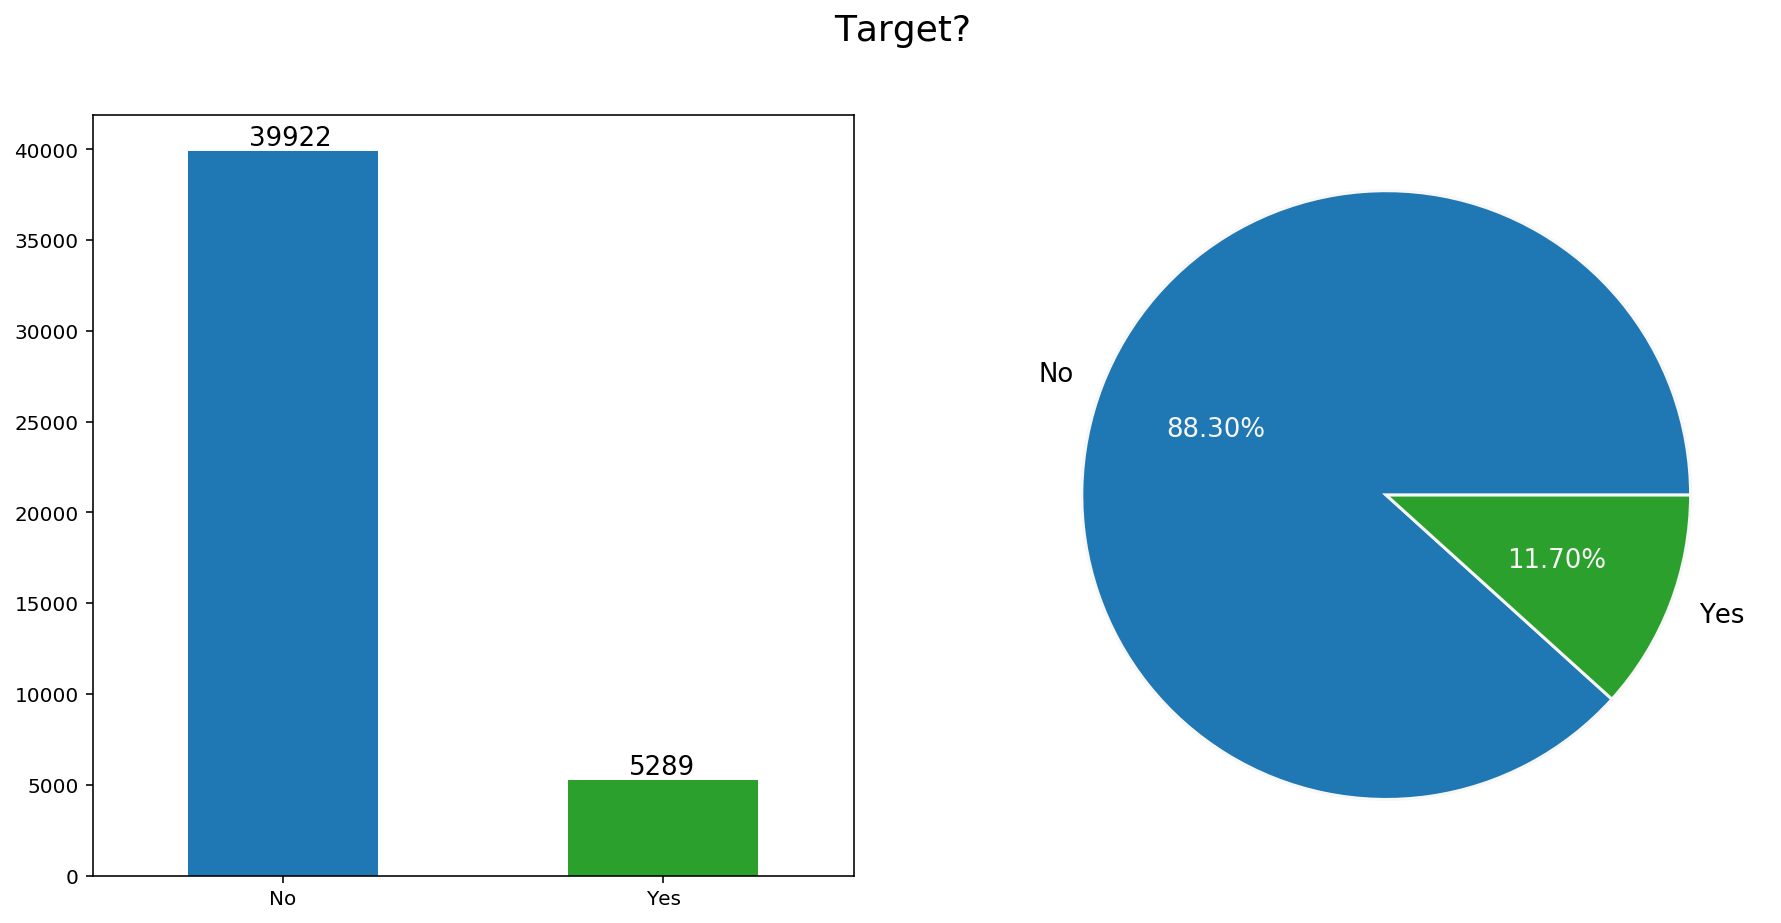

In [11]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Target?", fontsize = 18.)
_ = data.Target.value_counts().plot.bar(ax = ax1, rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = data.Target.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax2,\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax2.texts[1].set_color("#F7F7F7"), ax2.texts[3].set_color("#F7F7F7")
for i in ax1.patches:
    ax1.text(i.get_x()+0.16, i.get_height()+300, str(round((i.get_height()), 2)), fontsize=13, color='black')

As seen form the above outputs, the dataset is highly imbalanced towards the 'No' in Target value (39922 observations @ 88.30%) vs. 'Yes' in Target value (5289 observations @ 11.70%). This means that the Target column, which is the dependent variable is having a high class imbalance. This means that we might be having high accuracy for detecting 'No' as compared to detecting ' Yes'. This will make the accuracy a less useful measure of performance when we build the model. This is because False Negatives may occur and this will have a huge impact from a business point of view. Being a False Negative, that is, categorising someone who will subscribe (Yes) as someone who will not (No) would mean a loss of potential business if the company decides not to aim their marketing towards them. To ensure that all this is not going to be a problem, we must ensure to take care of the imbalance during model building stage and to use the Recall value of the model as a more appropriate measure of model performance

One important point to note is that the Duration column in the dataset will impact negatively for our model's performance. This is because the duration of call is known only when a call is performed and the outcome is known immediaetly after the call. Hence, due to not having much value, we can drop this column fully.

In [12]:
data.drop(['duration'], inplace = True, axis = 1)

In [13]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  campaign  pdays  previous poutcome Target  
0  unknown    5   may         1     -1         0  unknown     no  
1  unknown    5   may         1     -1         0  unknown     no  
2  unknown    5   may         1     -1         0  unknown     no  
3  unknown    5   may         1     -1         0  unknown     no  
4  unknown    5   may         1     -1         0  unknown     no

Now we see that the duration column has been dropped. We can move on to doing our univariate analysis

## Univariate Data Analytics

Defining a function to use for detecting outliers:

In [14]:
out=[]
def outliers(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            out.append(y)
            out2 = pd.DataFrame(out)
    return out2

### Age 

In [15]:
print("Min Value = ", data.age.quantile(0))
print("Q1 or 25% = ", data.age.quantile(0.25))
print("Q2/Median = ", data.age.quantile(0.5))
print("Q3 or 75% = ", data.age.quantile(0.75))
print("Max value = ", data.age.quantile(1))
print("Interquartile Range = ", stats.iqr(data.age))
print("Mean value = %.3f" % np.mean(data.age))

Min Value =  18.0
Q1 or 25% =  33.0
Q2/Median =  39.0
Q3 or 75% =  48.0
Max value =  95.0
Interquartile Range =  15.0
Mean value = 40.936


The Min age is 18, which makes logical sense. The median age is 39 whereas we have the max age at 95.

In [16]:
print("The list of outliers is: ")
outliers(data.age)

The list of outliers is: 


0
0    83
1    75
2    75
3    83
4    75
5    76
6    83
7    85
8    90
9    82
10   73
11   74
12   75
13   78
14   85
15   80
16   78
17   73
18   75
19   94
20   83
21   79
22   78
23   83
24   73
25   76
26   83
27   77
28   73
29   74
..   ..
351  77
352  80
353  84
354  75
355  83
356  75
357  74
358  88
359  74
360  75
361  78
362  81
363  82
364  89
365  81
366  77
367  79
368  73
369  75
370  86
371  75
372  77
373  77
374  74
375  73
376  78
377  78
378  77
379  75
380  73

[381 rows x 1 columns]

There are 381 outliers in this dataset. This fact, along with having some very high ages may 

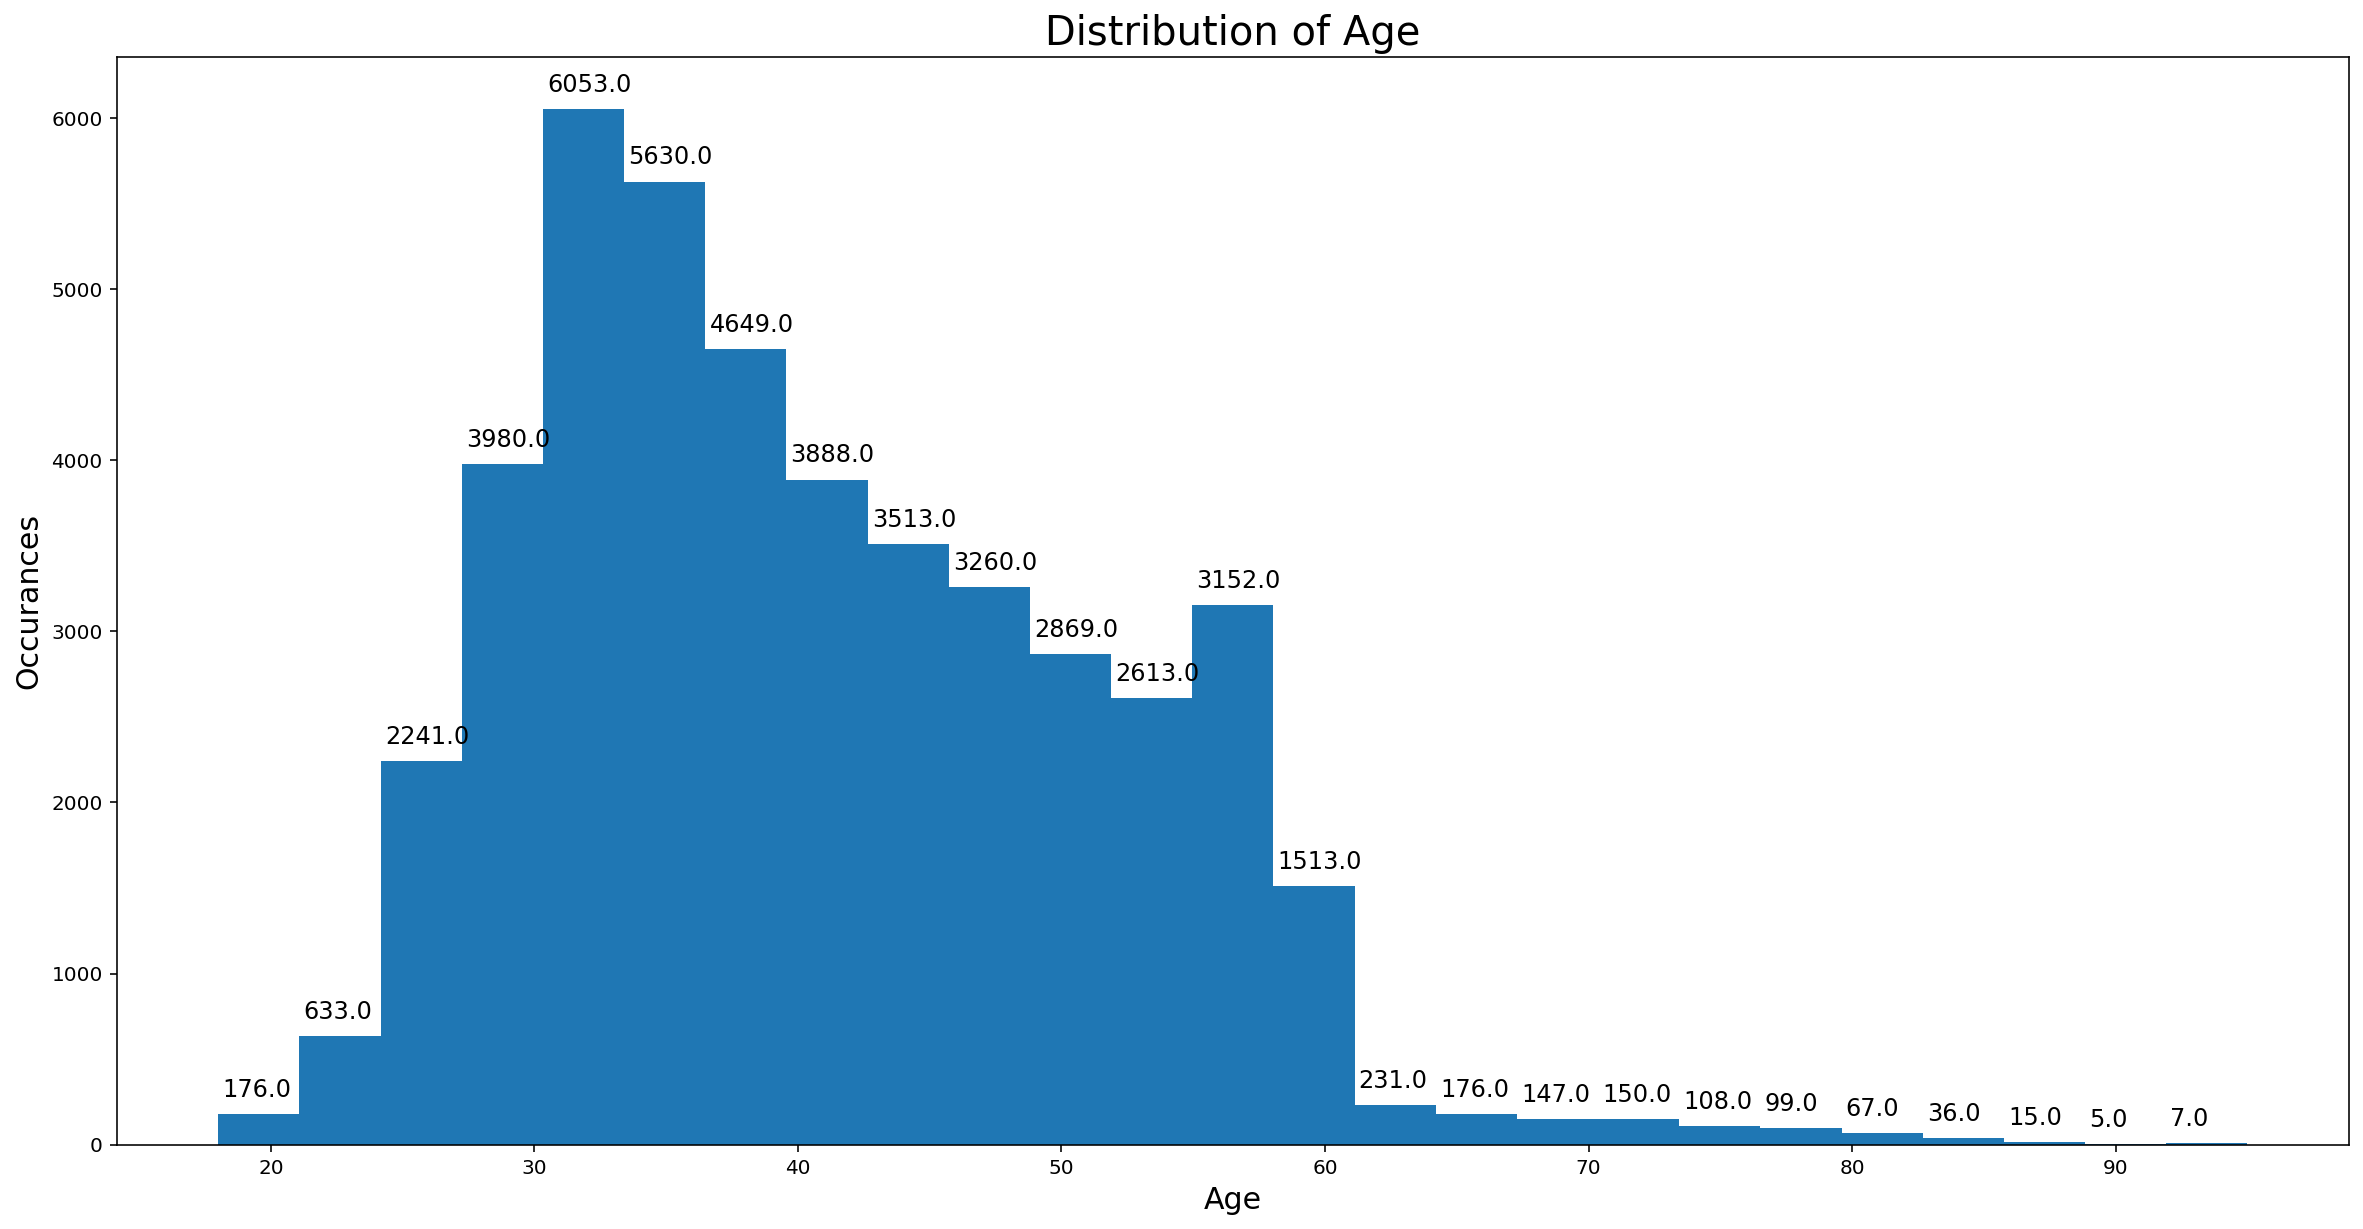

In [17]:
fig, ax = plt.subplots()

fig.set_size_inches(20,10)

ax.set_xlabel("Age", fontsize = 15)

ax.set_ylabel("Occurances", fontsize = 15)

ax.set_title("Distribution of Age", fontsize = 20)

plt.hist(data.age,bins = 25, histtype = 'bar', range = (data.age.min(),data.age.max()));
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+100, str(round((i.get_height()), 1)), fontsize=12, color='black')

Above, we can see the distribution of the age over 25 categories. We see that the data is slightly skewed, but relatively normally distributed. To check for the same, let's apply the Shapiro test for normality. If we get a p-value <0.05, then we can say that the age class is **not** normally distributed

In [18]:
test = shapiro(data['age'])
print ("The result of shapiro test is that t-statistic is = %.3f and the p-value is = %.6f." % test)

The result of shapiro test is that t-statistic is = 0.961 and the p-value is = 0.000000.


As seen above, we can see the p-value is 0...which is obviously lesser than any positive value. Hence, while it may seem so, the age class is **not** normally distributed. Hence, we can conclude that the age class is slightly right-skewed, with the mean of 40.9 lying to the right of the median of 39.

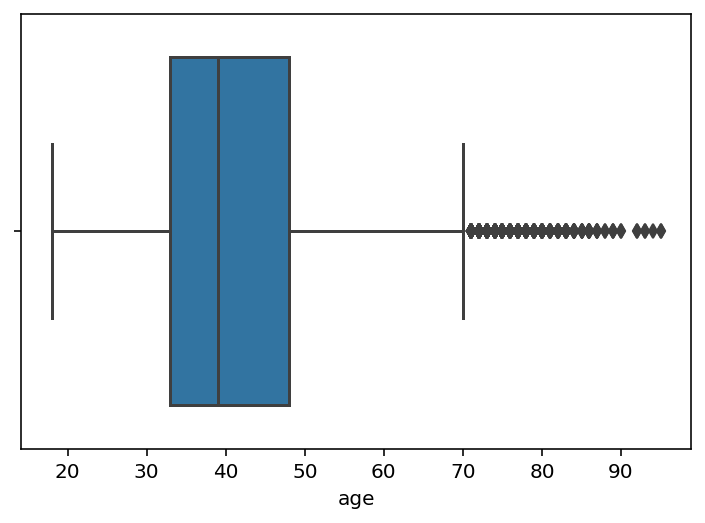

In [19]:
sns.boxplot(x=data['age'], data=data)

As seen above with the box plot, we can see our findings plotted, with median around 40 and lots of outliers with more than 70 age

###  Job

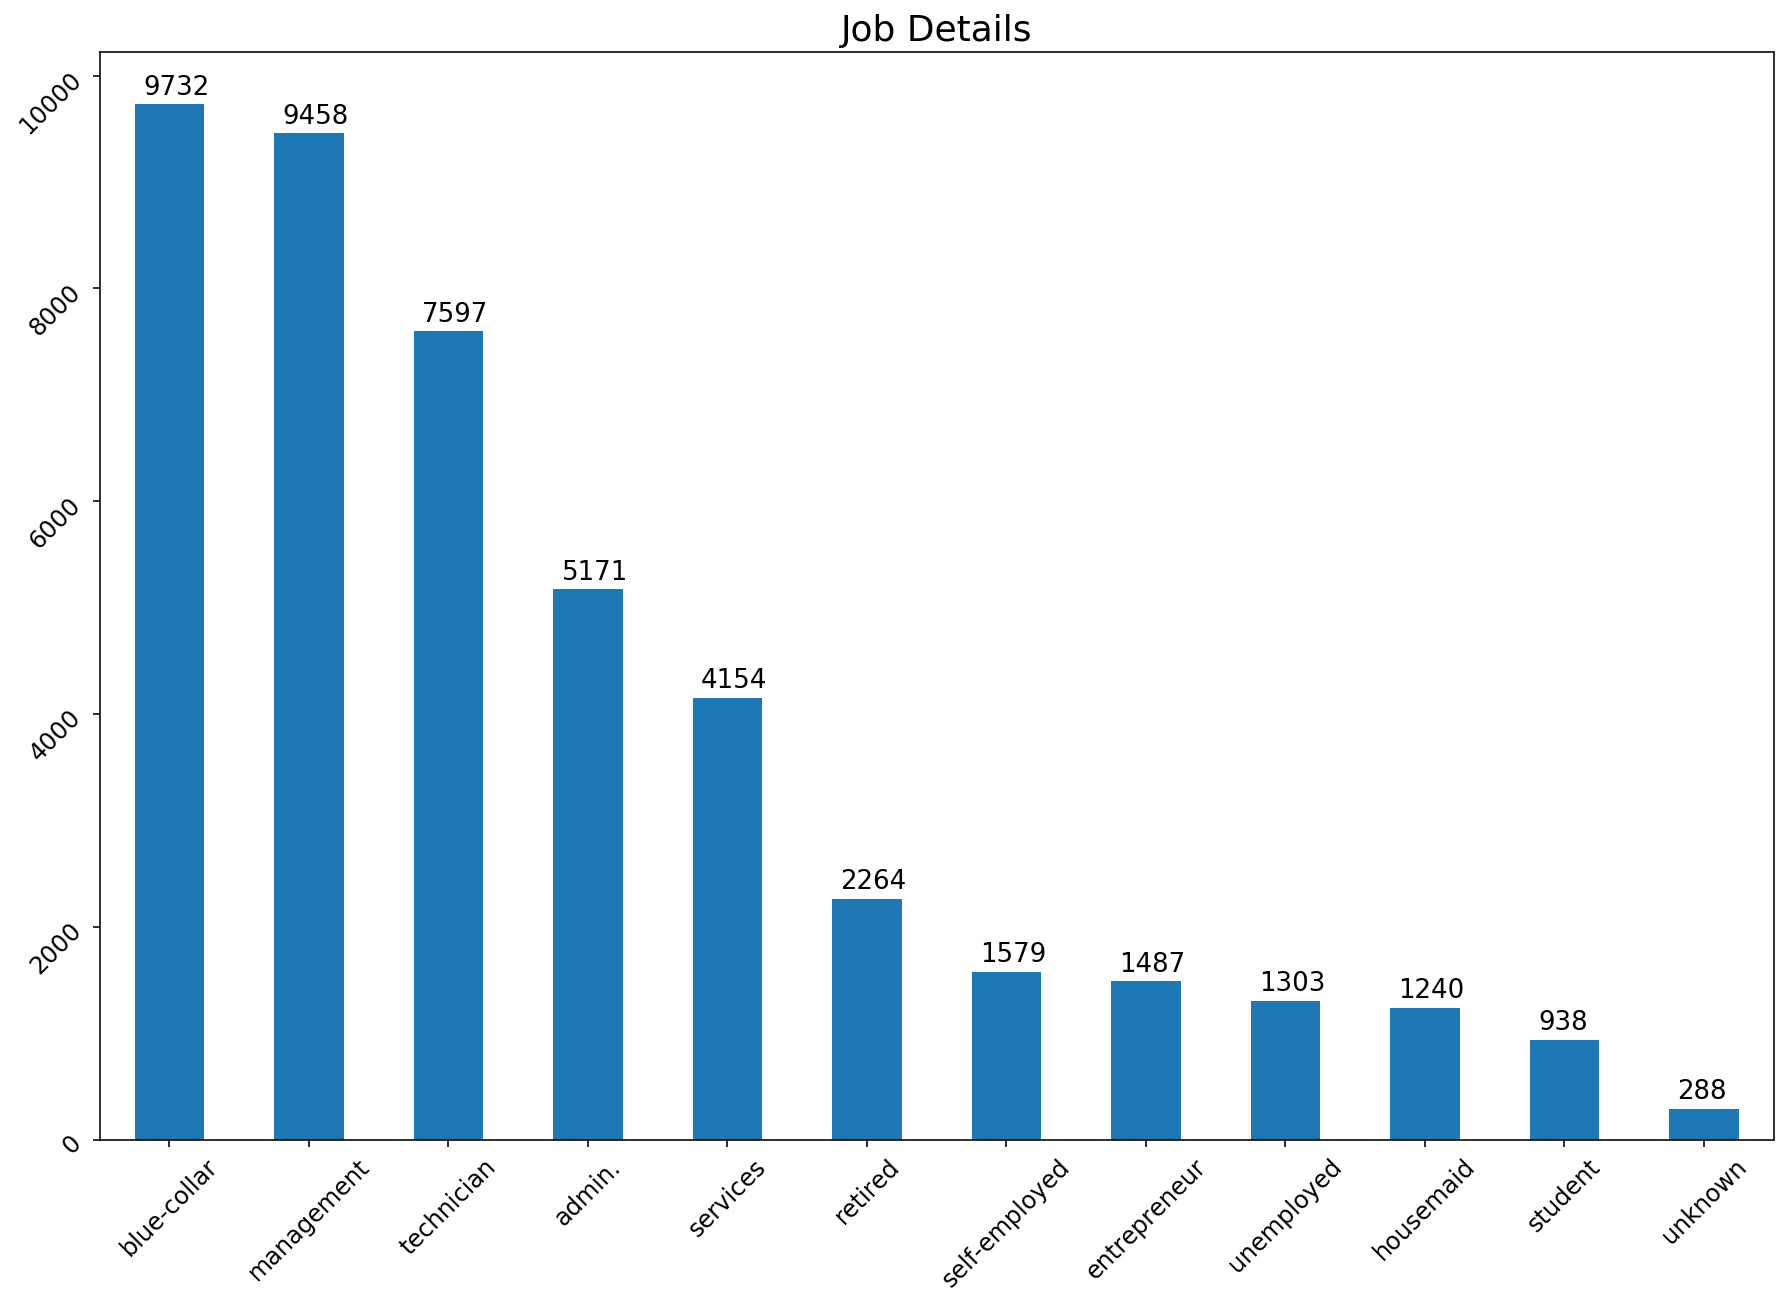

In [20]:
ax = data['job'].value_counts().plot(kind = 'bar', figsize = (15,10))

ax.set_title("Job Details", fontsize = 18)
ax.tick_params(rotation = 45, labelsize = 12)
for i in ax.patches:
    ax.text(i.get_x()+0.06, i.get_height()+100, str(round((i.get_height()), 2)), fontsize=13, color='black')

We can see from above that most jobs are of blue-collar or management type. Also, there are lots of job categories, and we can optimize it by combining similar jobs together

In [21]:
#Optimize the number of classes in job
data.job=np.where(data.job=='technician','blue collar',data.job)
data.job=np.where(data.job=='blue-collar','blue collar',data.job)
data.job=np.where(data.job=='housemaid','pink collar',data.job)
data.job=np.where(data.job=='services','pink collar',data.job)
data.job=np.where(data.job=='management','white collar',data.job)
data.job=np.where(data.job=='admin.','white collar',data.job)
data.job=np.where(data.job=='entrepreneur','white collar',data.job)
data.job=np.where(data.job=='self-employed','other',data.job)
data.job=np.where(data.job=='unknown','other',data.job)
data.job=np.where(data.job=='student','other',data.job)
data.job=np.where(data.job=='retired','other',data.job)
data.job=np.where(data.job=='unemployed','other',data.job)


data.job.unique()

array(['white collar', 'blue collar', 'other', 'pink collar'],
      dtype=object)

Now, we have optimized the categories to only 4 in total

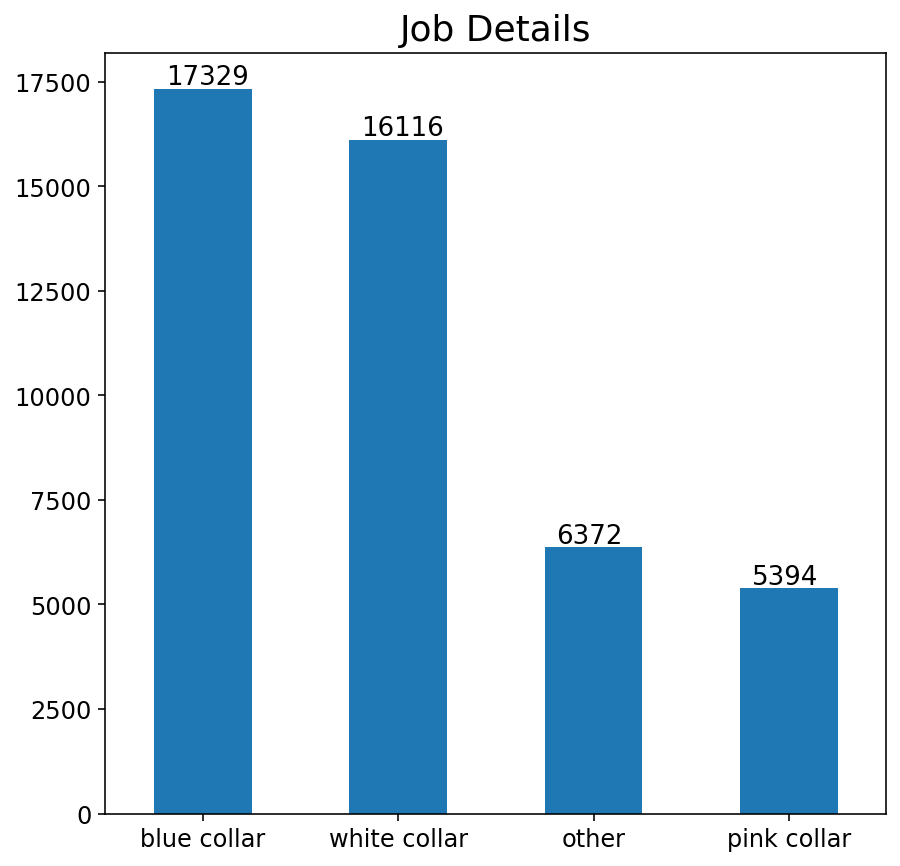

In [22]:
ax = data['job'].value_counts().plot(kind = 'bar', figsize = (7,7))

ax.set_title("Job Details", fontsize = 18)
ax.tick_params(rotation = 0, labelsize = 12)
for i in ax.patches:
    ax.text(i.get_x()+0.06, i.get_height()+100, str(round((i.get_height()), 2)), fontsize=13, color='black')

From what we see above, the blue-collar and closely followed by white-collar jobs are having the highest amount

### Marital Status 

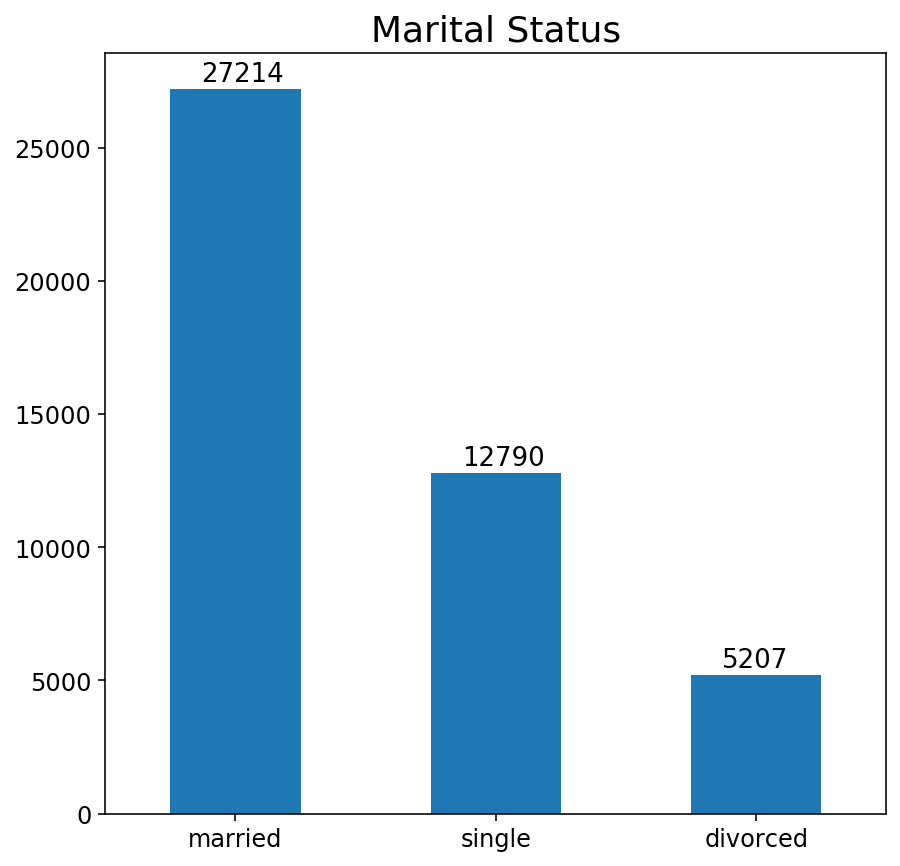

In [23]:
ax = data['marital'].value_counts().plot(kind = 'bar',figsize = (7,7))

ax.set_title("Marital Status", fontsize = 18)
ax.tick_params(rotation = 0, labelsize = 12)
for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()+300, str(round((i.get_height()), 2)), fontsize=13, color='black')

From what we see above, we find that married people are having the highest amount of occurances in our data

### Education 

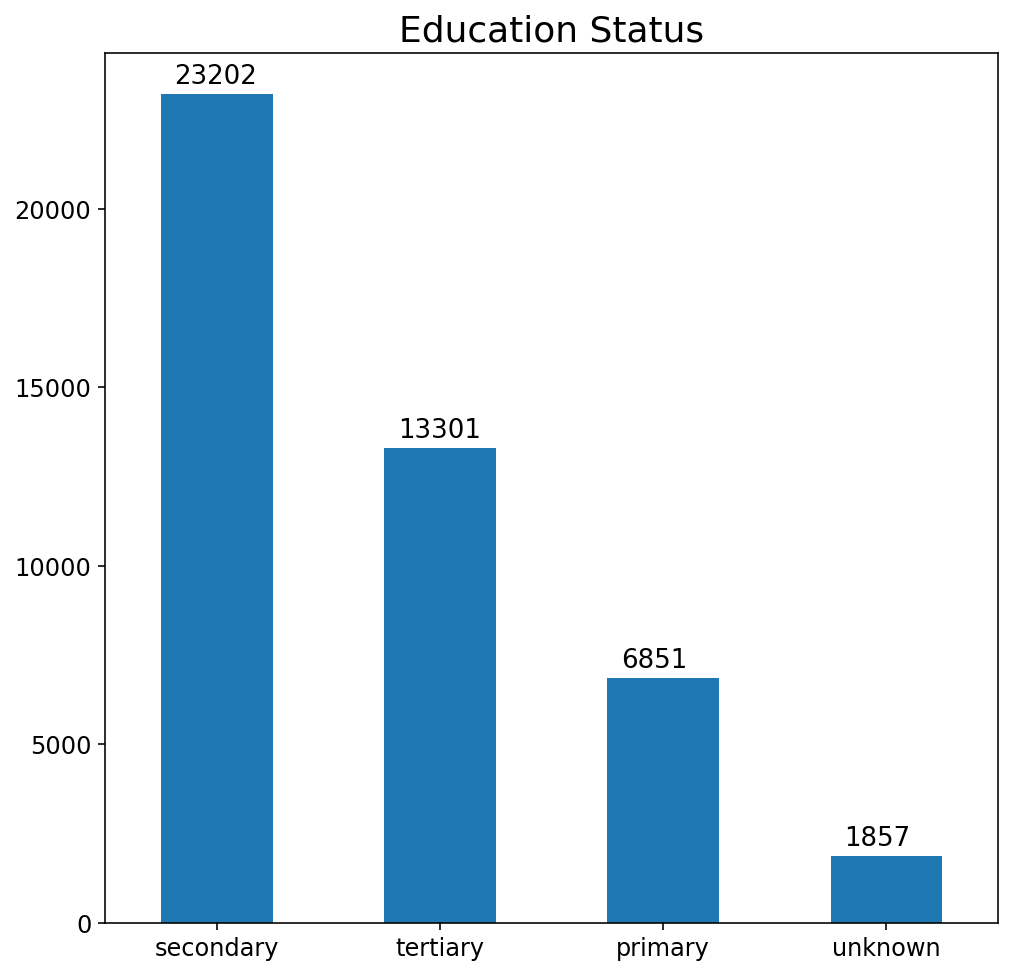

In [24]:
ax = data['education'].value_counts().plot(kind = 'bar',figsize = (8,8))

ax.set_title("Education Status", fontsize = 18)
ax.tick_params(rotation = 0, labelsize = 12)
for i in ax.patches:
    ax.text(i.get_x()+0.06, i.get_height()+300, str(round((i.get_height()), 2)), fontsize=13, color='black')

From what we see above, those having secondary education are having the highest no. of occurances. There are also 1857 occurances of unknown jobs, indicating some missing values

### Default status 

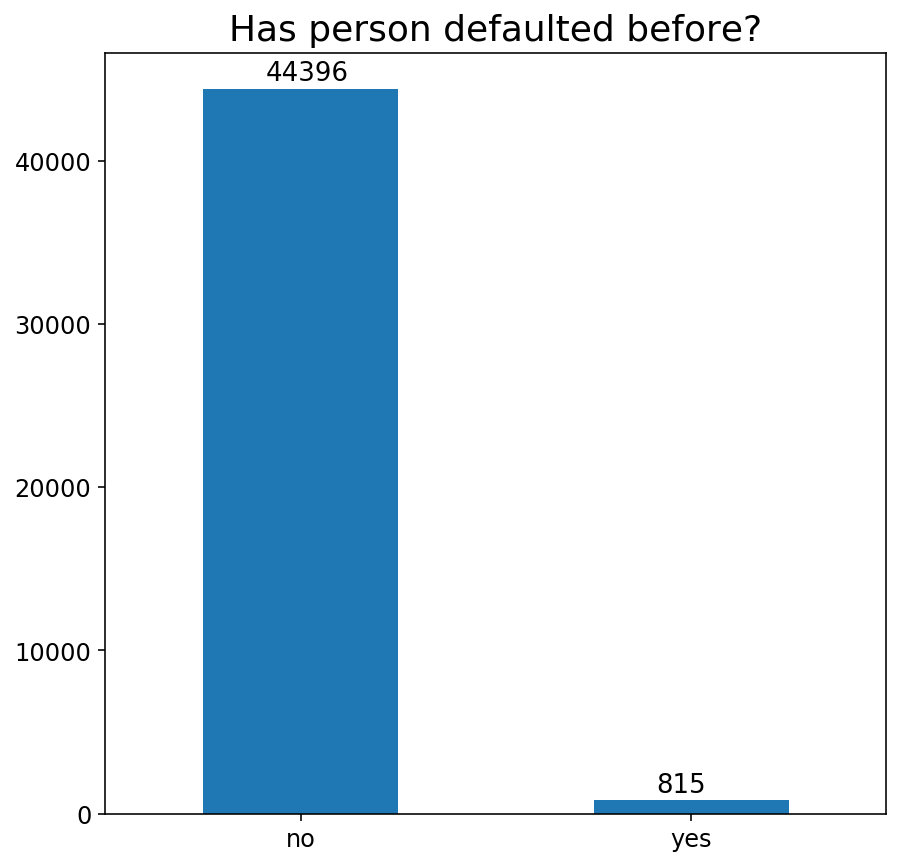

In [25]:
ax = data['default'].value_counts().plot(kind = 'bar',figsize = (7,7))

ax.set_title("Has person defaulted before?", fontsize = 18)
ax.tick_params(rotation = 0, labelsize = 12)
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+500, str(round((i.get_height()), 2)), fontsize=13, color='black')

As seen above, we have 44396 occurances of not defaulting vs. 815 of defaulting. This is an extreme imbalance which might have negative impact on our model. We should consider dropping this. To check for the same, let us analyse it against the Target value

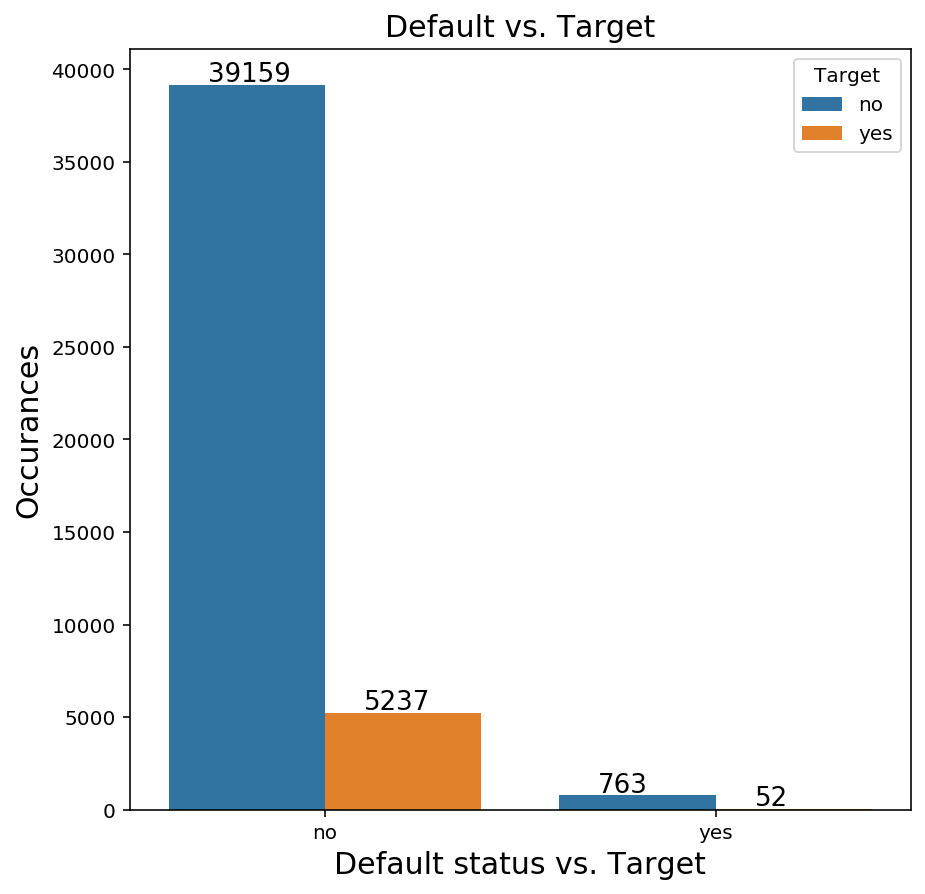

In [26]:
fig, (ax)=plt.subplots(figsize=(7,7))

#countplot
sns.countplot(data.default,ax=ax, hue = data.Target)
ax.set_xlabel('Default status vs. Target', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('Default vs. Target', fontsize=15)
ax.tick_params(labelsize=10)
for i in ax.patches:
    ax.text(i.get_x()+0.10, i.get_height()+200, str(round((i.get_height()), 2)), fontsize=13, color='black')

As seen above, the distribution of default's 'yes' and 'no' are also extremly imbalanced towards Target value's 'yes' or 'no'. We have concluded that this will negatively impact our prediction model and hence we can drop this class

In [27]:
data.drop(['default'], inplace = True, axis = 1)

In [28]:
data.head()

age           job  marital  education  balance housing loan  contact  day  \
0   58  white collar  married   tertiary     2143     yes   no  unknown    5   
1   44   blue collar   single  secondary       29     yes   no  unknown    5   
2   33  white collar  married  secondary        2     yes  yes  unknown    5   
3   47   blue collar  married    unknown     1506     yes   no  unknown    5   
4   33         other   single    unknown        1      no   no  unknown    5   

  month  campaign  pdays  previous poutcome Target  
0   may         1     -1         0  unknown     no  
1   may         1     -1         0  unknown     no  
2   may         1     -1         0  unknown     no  
3   may         1     -1         0  unknown     no  
4   may         1     -1         0  unknown     no

As seen above, we can confirm that the default class has been dropped

### Balance

In [29]:
print("Min Value = ", data.balance.quantile(0))
print("Q1 or 25% = ", data.balance.quantile(0.25))
print("Q2/Median = ", data.balance.quantile(0.5))
print("Q3 or 75% = ", data.balance.quantile(0.75))
print("Max value = ", data.balance.quantile(1))
print("Interquartile Range = ", stats.iqr(data.balance))
print("Mean value = %.3f" % np.mean(data.balance))

Min Value =  -8019.0
Q1 or 25% =  72.0
Q2/Median =  448.0
Q3 or 75% =  1428.0
Max value =  102127.0
Interquartile Range =  1356.0
Mean value = 1362.272


We can see a very wide distribution of the balance class here. We have our median of 448 and mean of 1362. Since the median is on the left side of the mean, we can say that the data is right-skewed. We can confirm the same with a plot

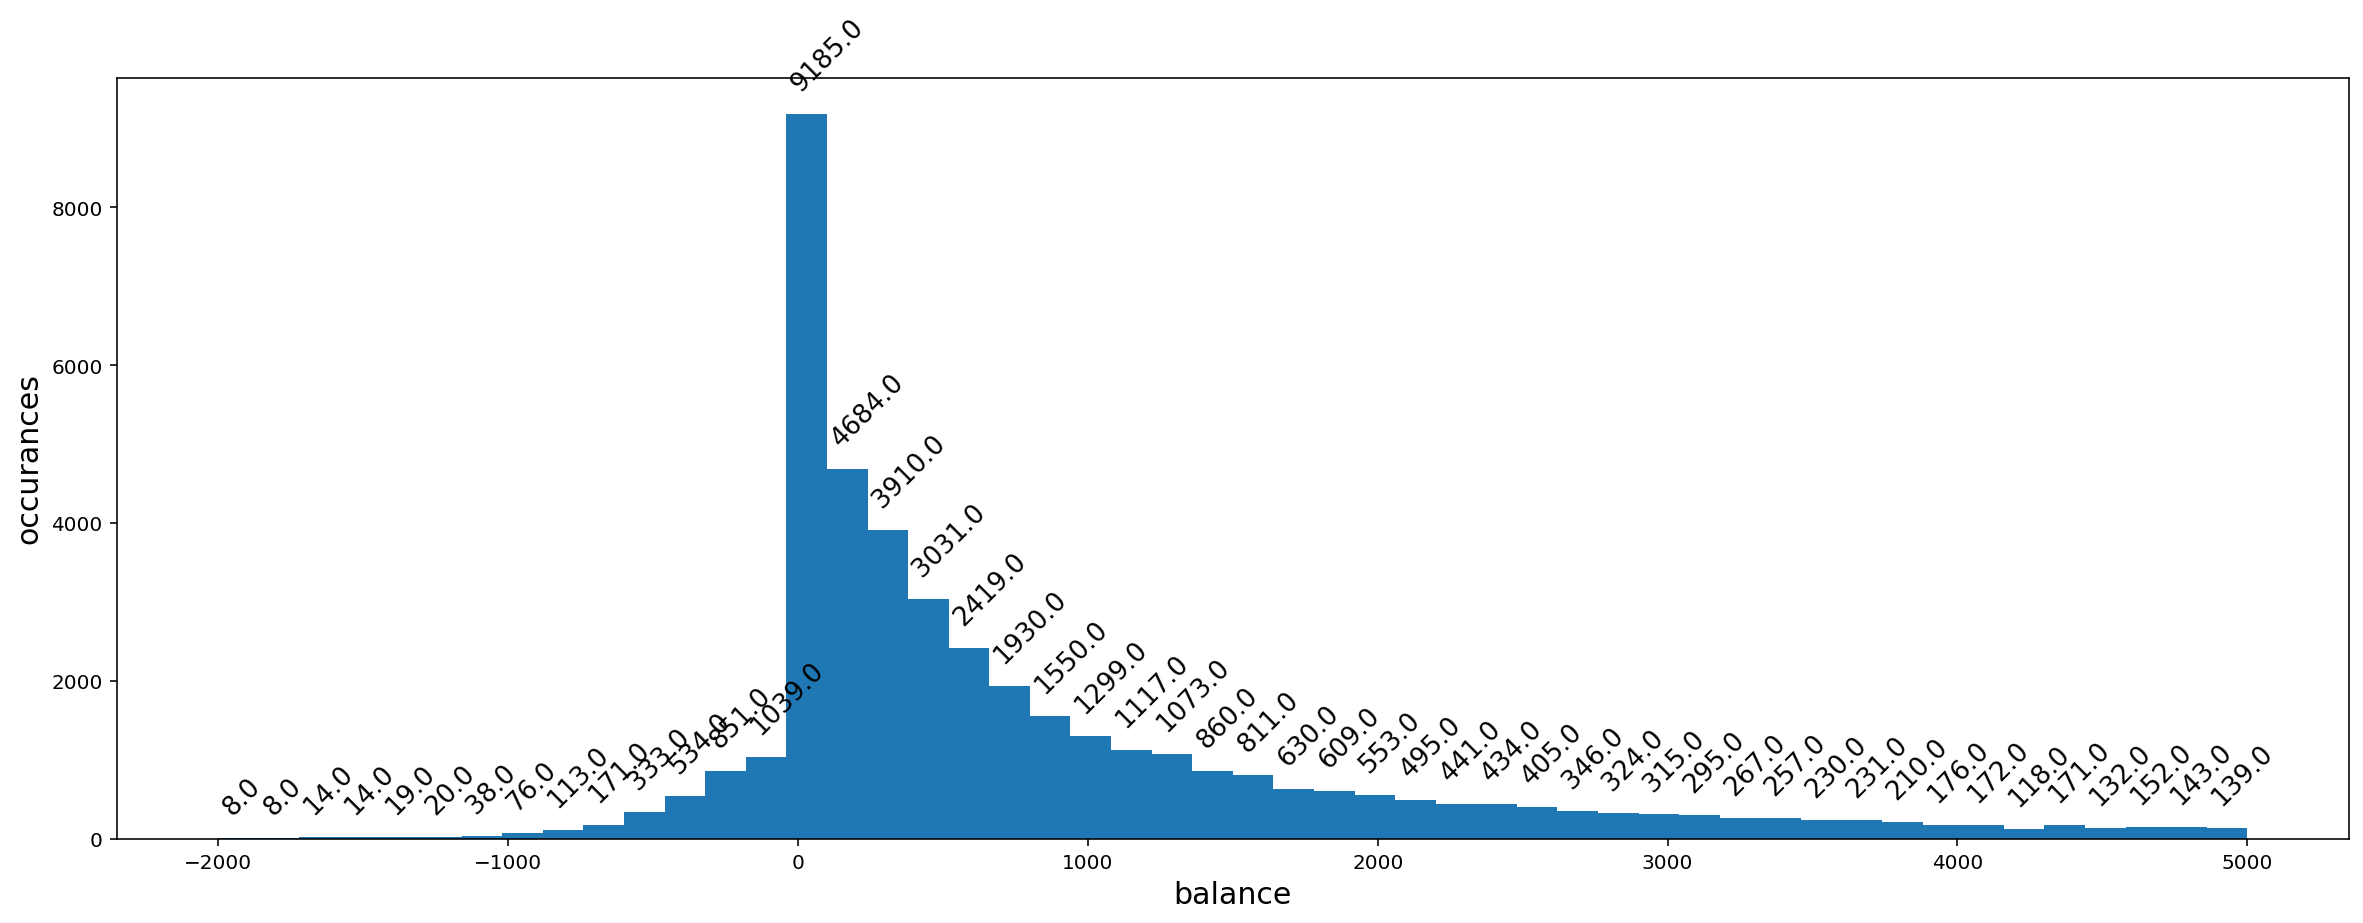

In [30]:
fig, ax = plt.subplots()

fig.set_size_inches(20,7)

ax.set_xlabel("balance", fontsize = 15)

ax.set_ylabel("occurances", fontsize = 15)

plt.hist(data.balance,bins = 50, histtype = 'bar', range = (-2000,5000));

for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()+300, str(round((i.get_height()), 2)), fontsize=13, color='black', rotation = 45)

As seen above, we can indeed see that most occurances are happening on left side of mean value of 1362 lying to the right of the median of 448

In [31]:
print("The list of outliers is: ")
outliers(data.balance)

The list of outliers is: 


0
0        83
1        75
2        75
3        83
4        75
5        76
6        83
7        85
8        90
9        82
10       73
11       74
12       75
13       78
14       85
15       80
16       78
17       73
18       75
19       94
20       83
21       79
22       78
23       83
24       73
25       76
26       83
27       77
28       73
29       74
...     ...
1096  26965
1097  11115
1098  15311
1099  12067
1100  27696
1101  12356
1102  23047
1103  29941
1104  10971
1105  29080
1106  12569
1107  31472
1108  14968
1109  10861
1110  11650
1111  12067
1112  18931
1113  27696
1114  12980
1115  14352
1116  13774
1117  26306
1118  17458
1119  12264
1120  16873
1121  11862
1122  10861
1123  11115
1124  14204
1125  16353

[1126 rows x 1 columns]

Based on the interquartile range, we have found that there are 1126 occurances of outliers.

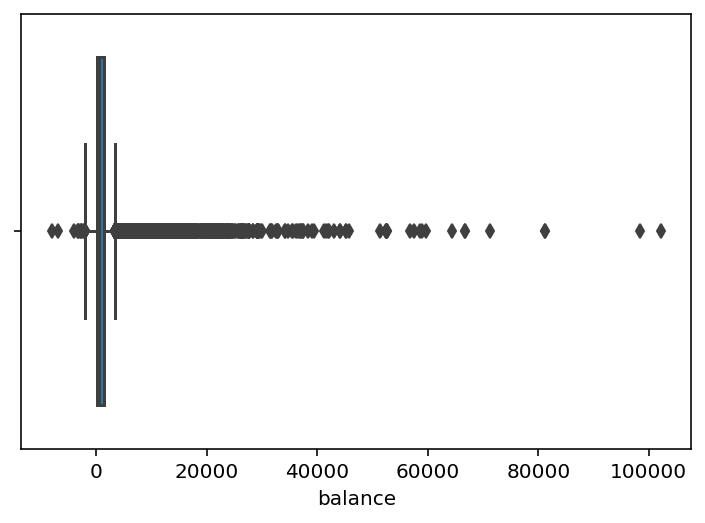

In [32]:
sns.boxplot(x=data['balance'], data=data)

As seen above and from our findings, we confirm there are a lot of outliers beyond about 2000 of balance

### Housing 

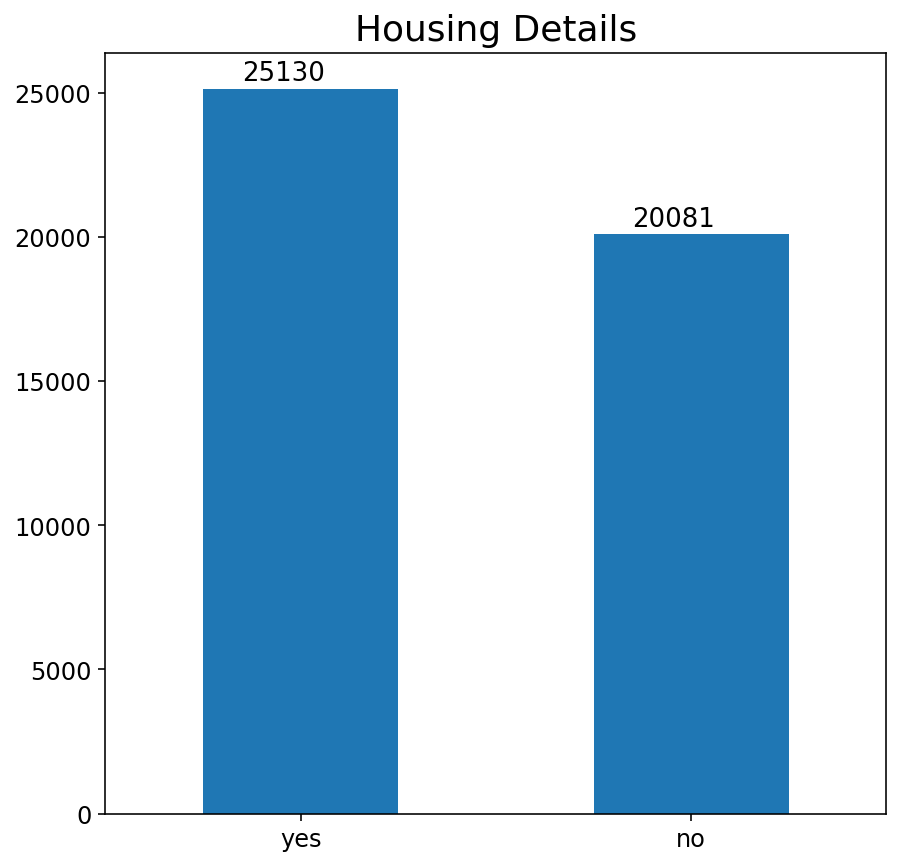

In [33]:
ax = data['housing'].value_counts().plot(kind = 'bar',figsize = (7,7))

ax.set_title("Housing Details", fontsize = 18)
ax.tick_params(rotation = 0, labelsize = 12)
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+300, str(round((i.get_height()), 2)), fontsize=13, color='black')

We can see that our distribution of Yes and No in Housing is pretty even, with 25130 in yes and 20081 in no category

### Loan 

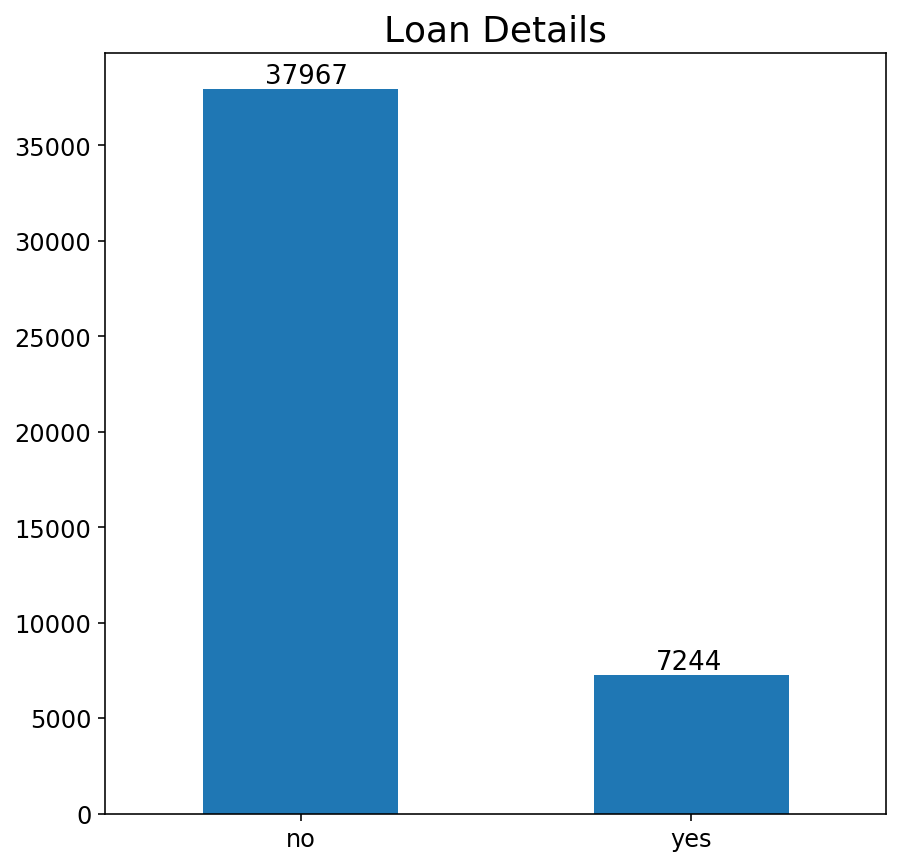

In [34]:
ax = data['loan'].value_counts().plot(kind = 'bar',figsize = (7,7))

ax.set_title("Loan Details", fontsize = 18)
ax.tick_params(rotation = 0, labelsize = 12)
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+300, str(round((i.get_height()), 2)), fontsize=13, color='black')

Above, we see that we have 37967 values of no and 7244 values of yes in having existing loan. While it seems to be imbalanced, its not bad enough for us to drop this class 

### Last Contact 

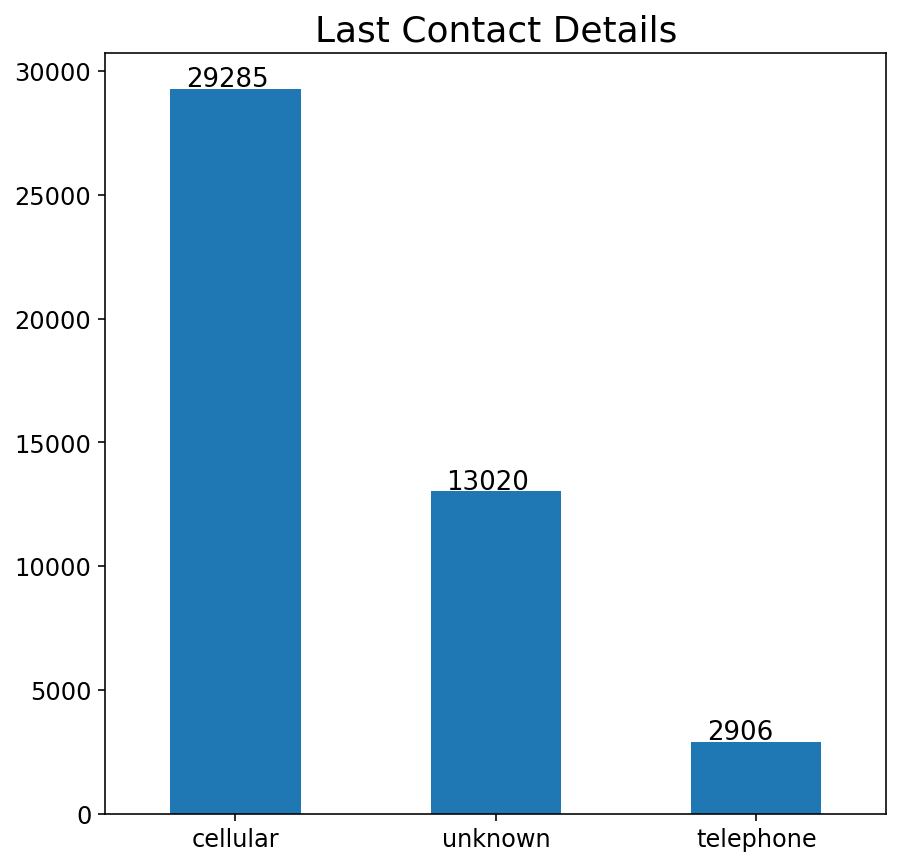

In [35]:
ax = data['contact'].value_counts().plot(kind = 'bar',figsize = (7,7))

ax.set_title("Last Contact Details", fontsize = 18)
ax.tick_params(rotation = 0, labelsize = 12)
for i in ax.patches:
    ax.text(i.get_x()+0.06, i.get_height()+100, str(round((i.get_height()), 2)), fontsize=13, color='black')

We see the highest occurances are in celluar category with 29285 occurances, follwed by unknown of 13020 and 2906 in telephone. Having 13020 in unknown shows that there are significant non-recorded values which the bank can take precaution of next time 

### Day and Month

This class is telling us about which day of the month in last year the last contact was made. Individually, it does not contribute much to our dataset. But if we combine it with month, it will have more significance. The best thing would be to combine day, month and a year value and convert it to Epoch value, or have the days of month of last contact converted to a single numerical category of days since last contact. However, we already have a class called pdays for that, and hence this might make it redudant. Therefore, i'm unsure as to what to do with these classes and am leaving it as is.

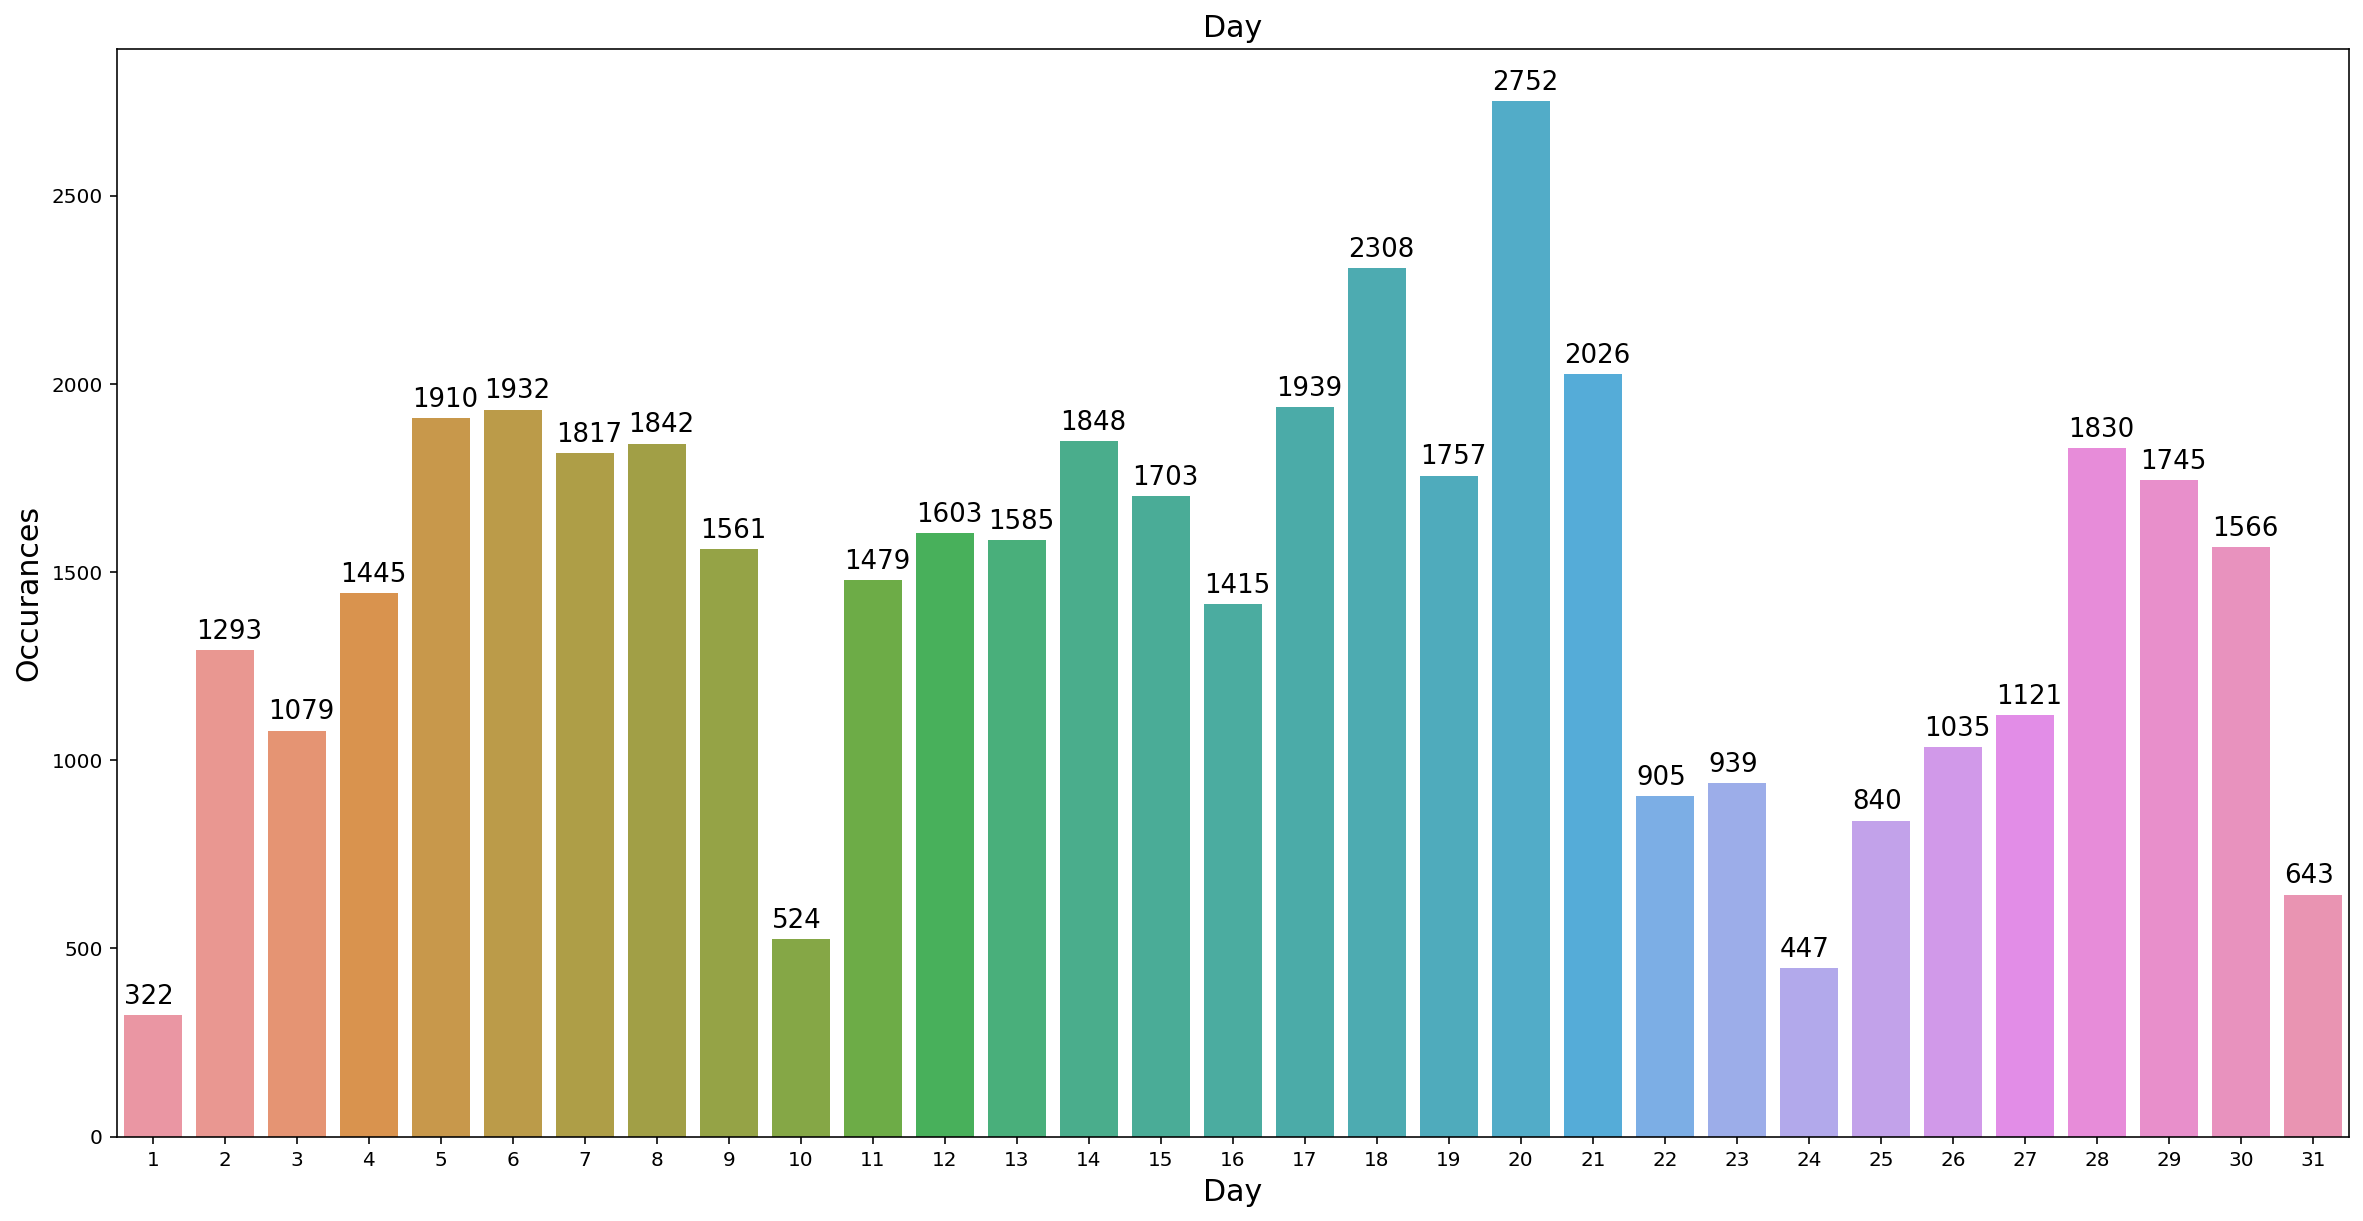

In [36]:
fig, (ax)=plt.subplots(figsize=(20,10))

sns.countplot(data.day,ax=ax)
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('Day', fontsize=15)
ax.tick_params(labelsize=10)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+30, str(round((i.get_height()), 2)), fontsize=13, color='black')

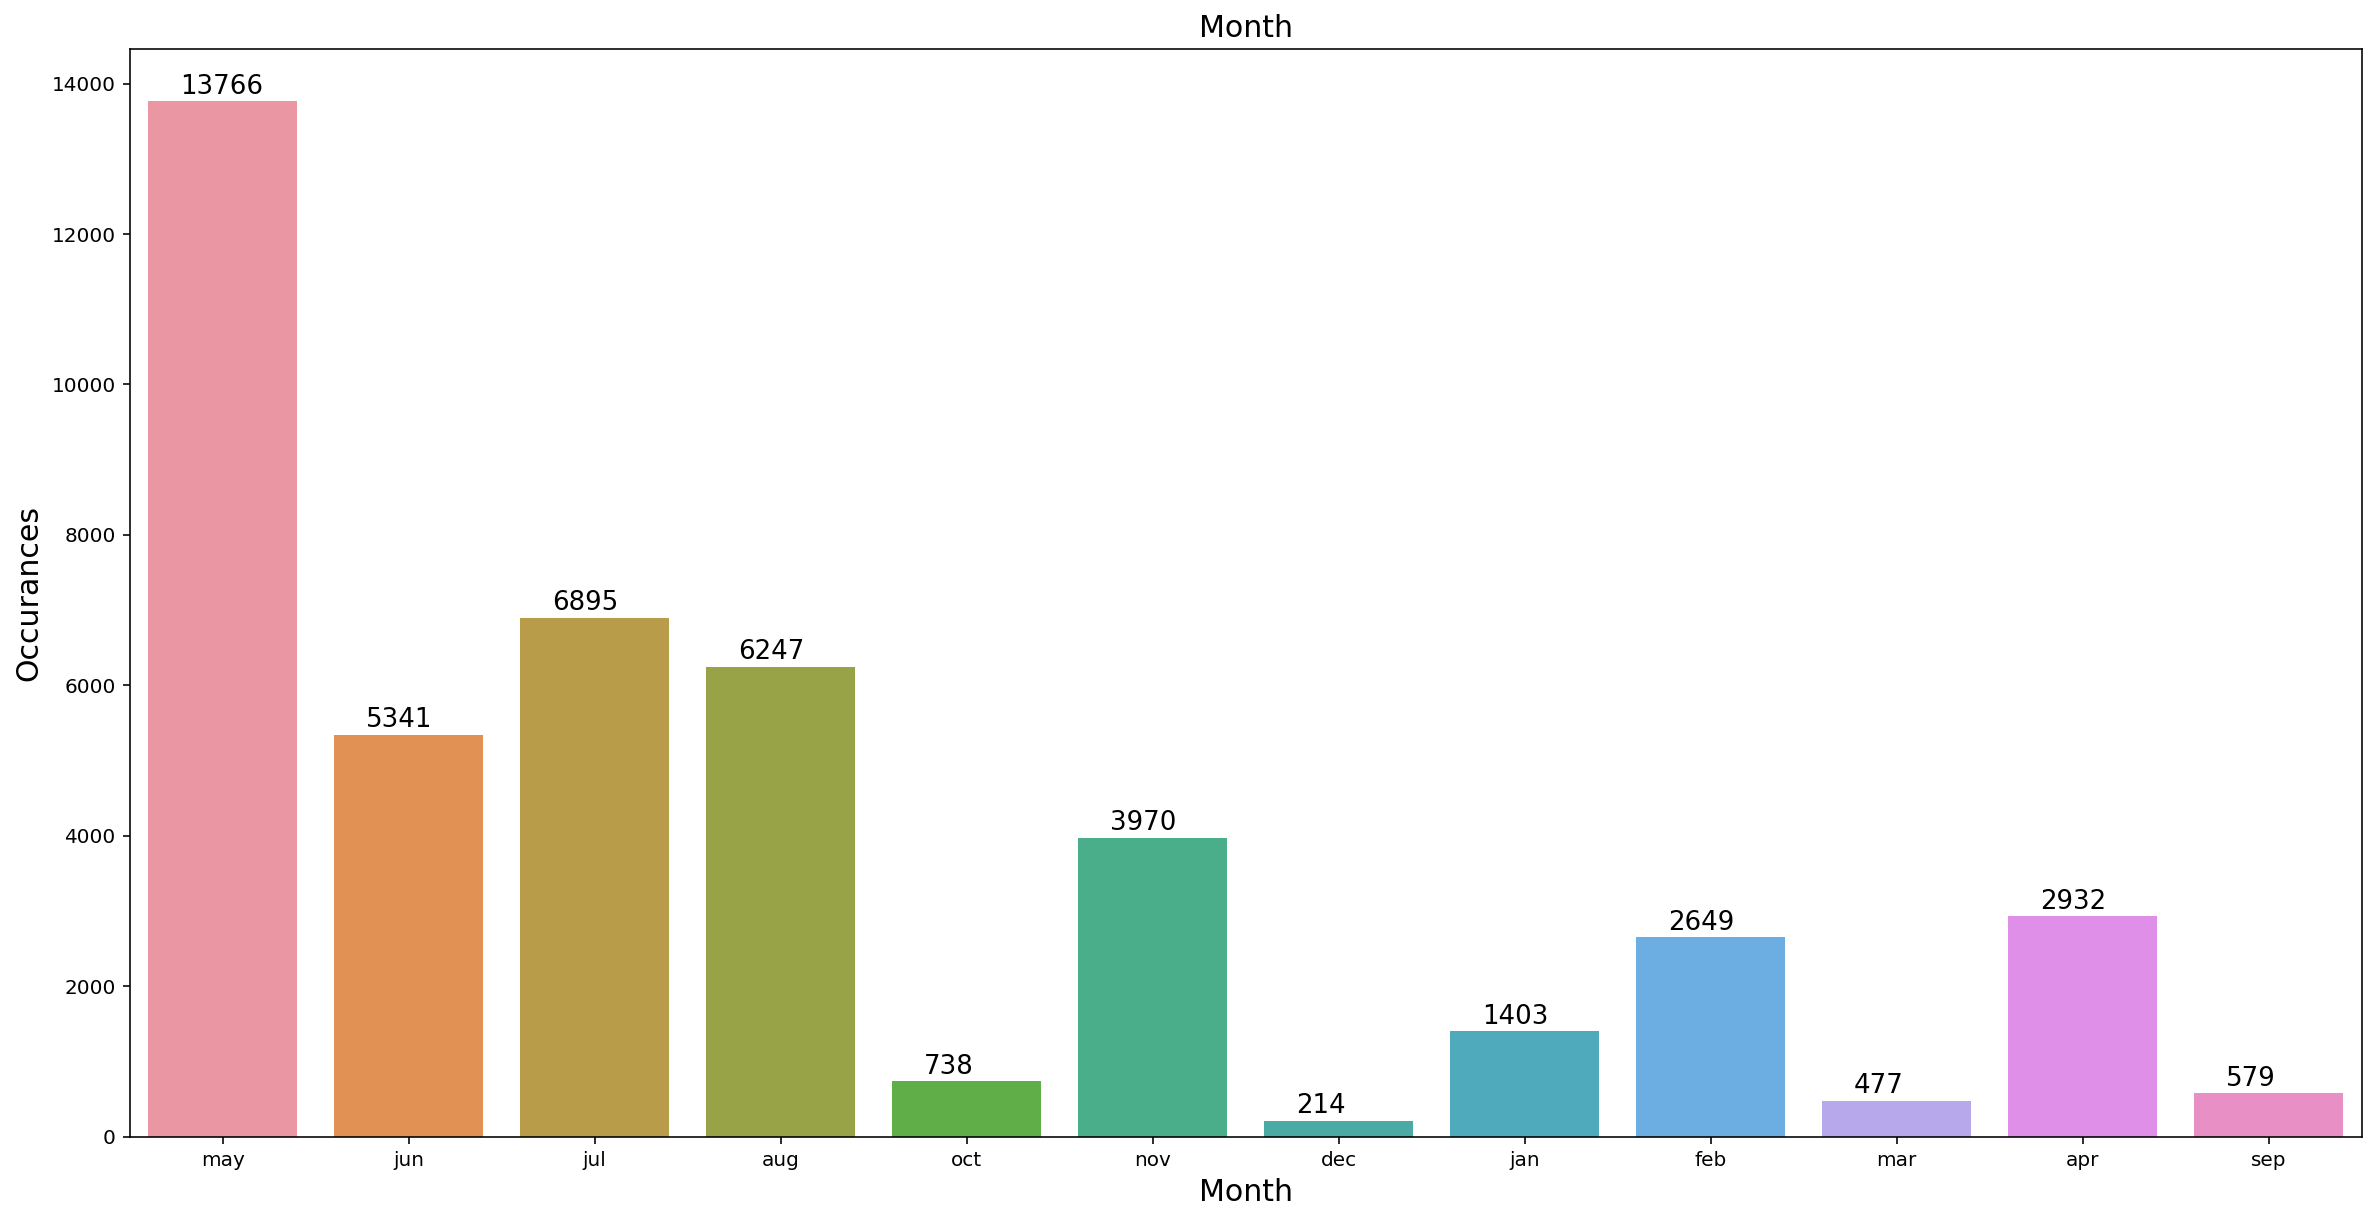

In [37]:
fig, (ax)=plt.subplots(figsize=(20,10))

#countplot
sns.countplot(data.month, ax=ax)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('Month', fontsize=15)
ax.tick_params(labelsize=10)
for i in ax.patches:
    ax.text(i.get_x()+0.17, i.get_height()+100, str(round((i.get_height()), 2)), fontsize=13, color='black')

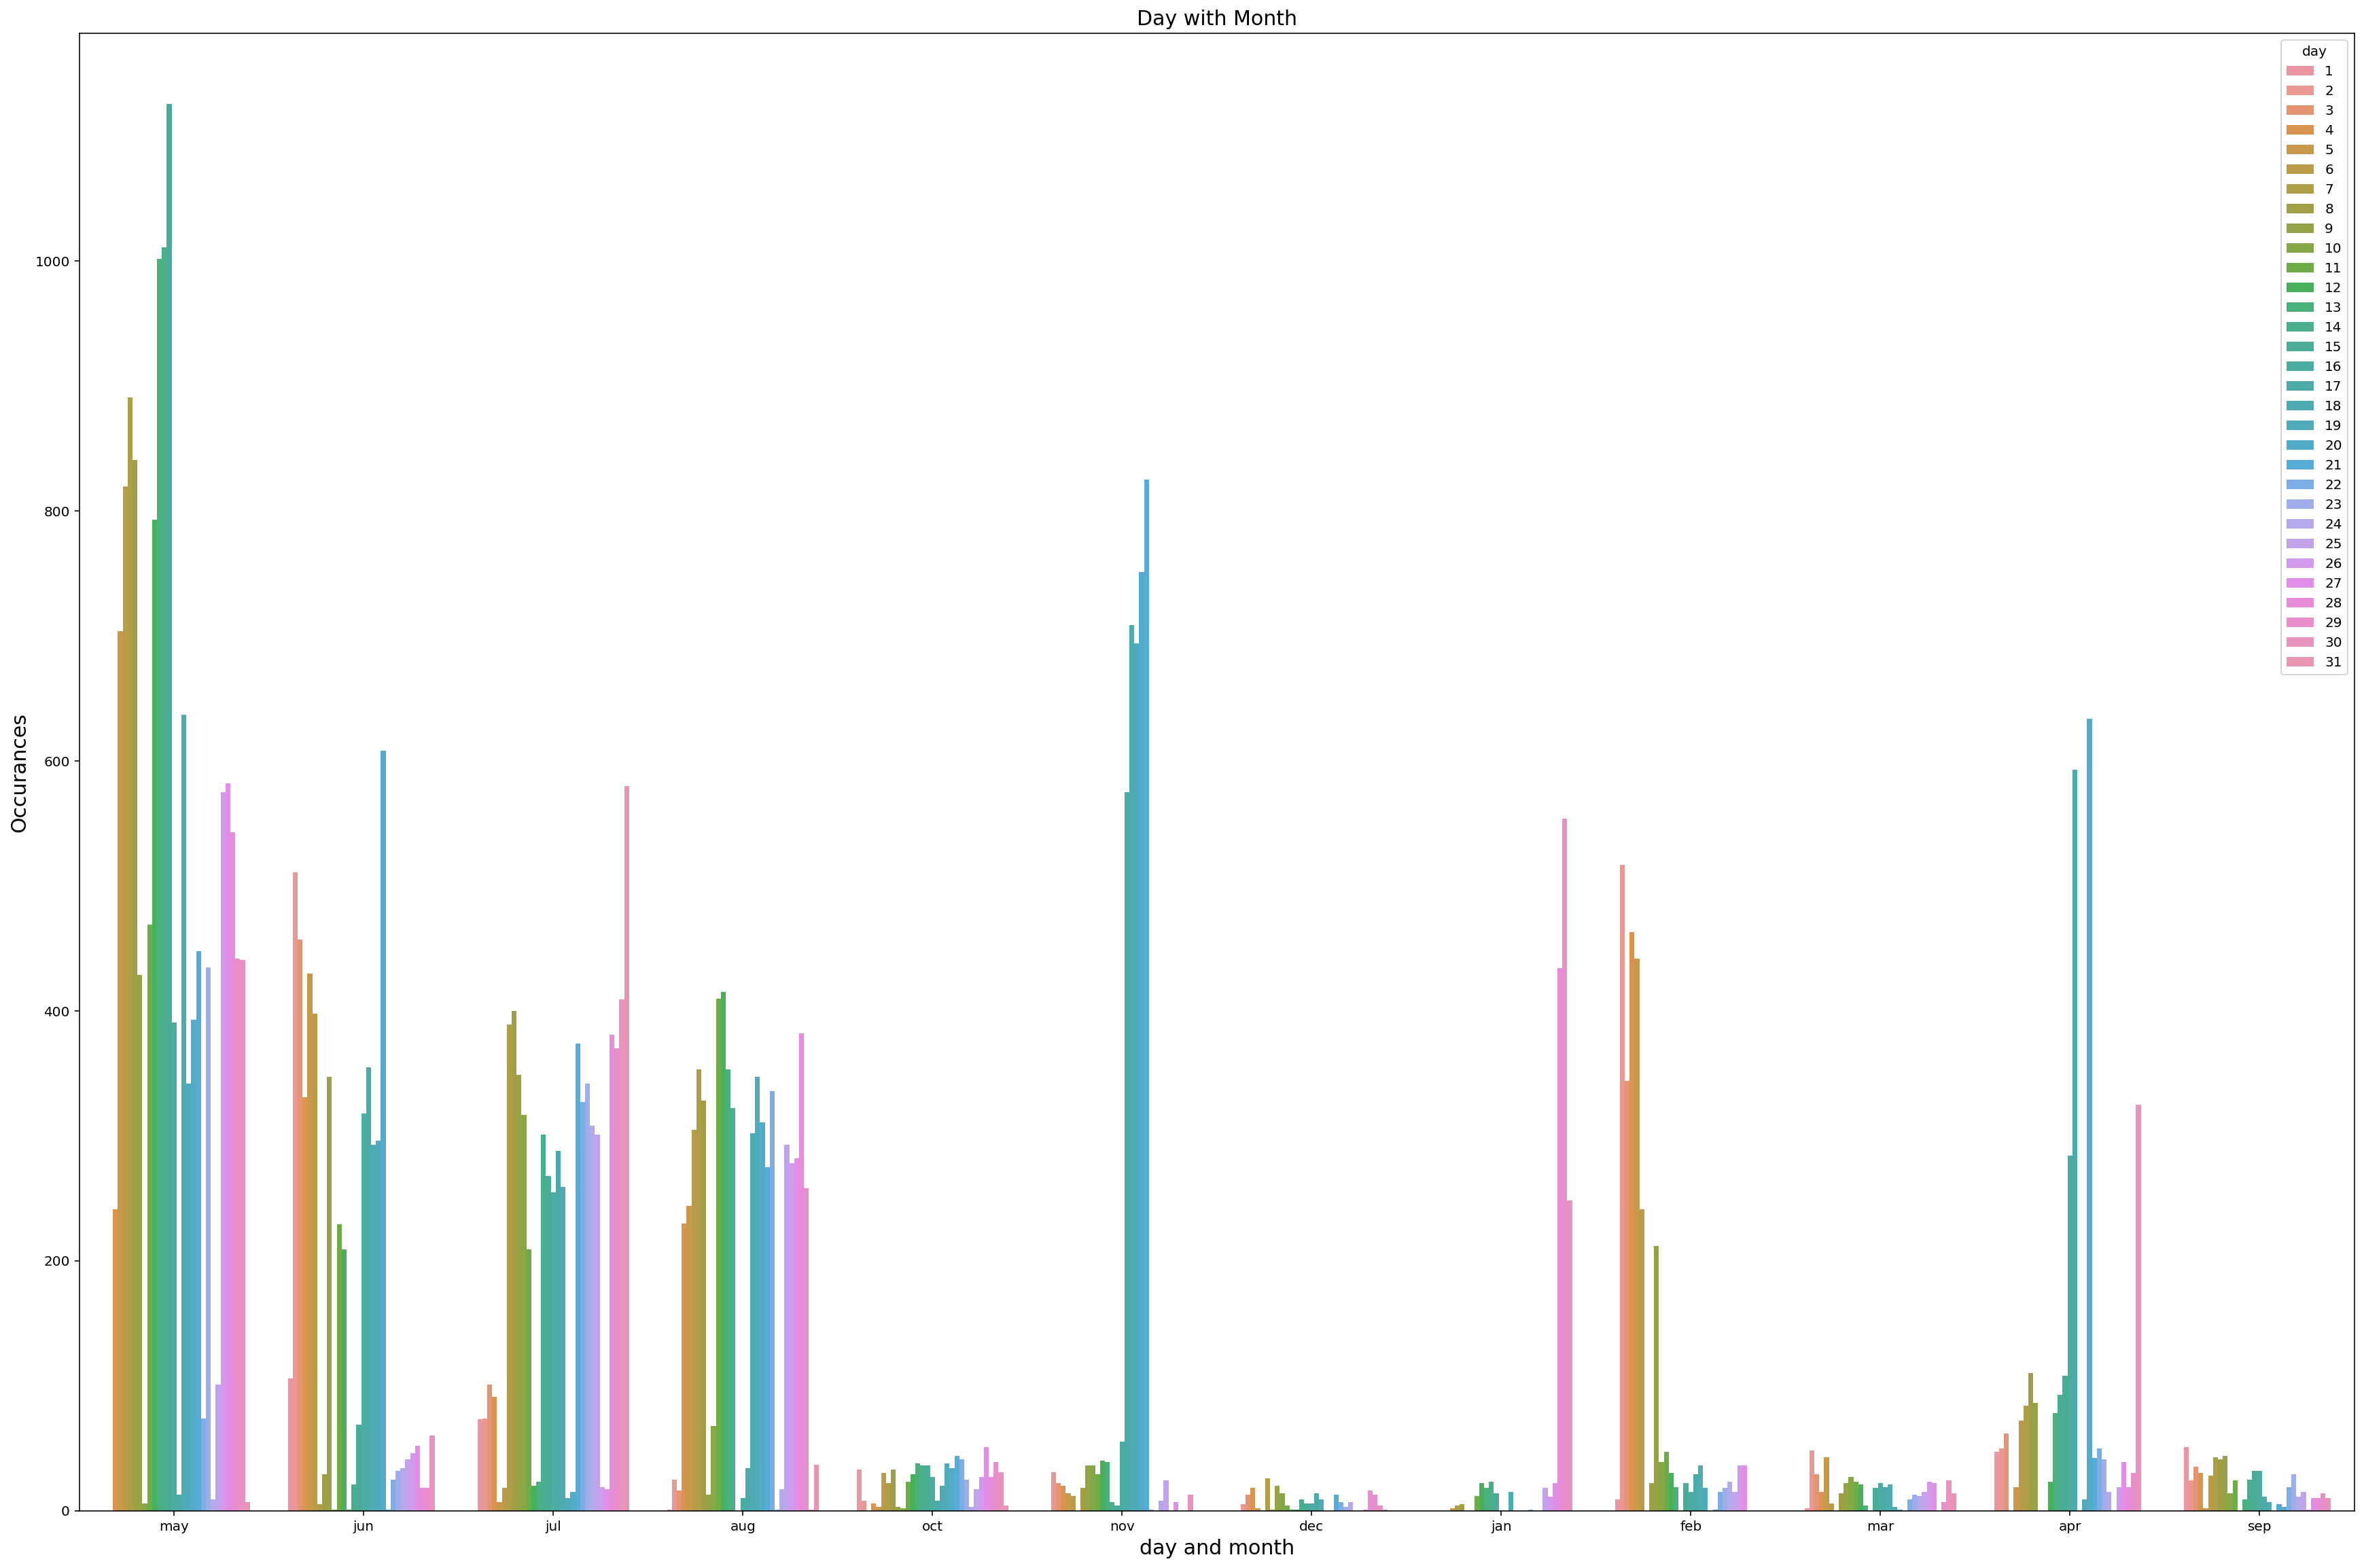

In [38]:
fig, (ax)=plt.subplots(figsize=(30,20))

#countplot
sns.countplot(data.month, ax=ax, hue = data.day)
ax.set_xlabel('day and month', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('Day with Month', fontsize=15)
ax.tick_params(labelsize=10)

This plot, when zoomed and seen, could suggest something, such as most number of contacts was done around 10-13th of May,  between 19-22nd of November and between 7th to 9th of May

### Campaign 

In [39]:
print("Min Value = ", data.campaign.quantile(0))
print("Q1 or 25% = ", data.campaign.quantile(0.25))
print("Q2/Median = ", data.campaign.quantile(0.5))
print("Q3 or 75% = ", data.campaign.quantile(0.75))
print("Max value = ", data.campaign.quantile(1))
print("Interquartile Range = ", stats.iqr(data.campaign))
print("Mean value = %.3f" % np.mean(data.campaign))

Min Value =  1.0
Q1 or 25% =  1.0
Q2/Median =  2.0
Q3 or 75% =  3.0
Max value =  63.0
Interquartile Range =  2.0
Mean value = 2.764


From above, we see that the median value is 2, that is the number of contact performed was 2, with max value of 63. we have mean of 2.764, which means the that the mean value is on the right of the median value, thus making this left-skewed. Let us look at the plot for the same.

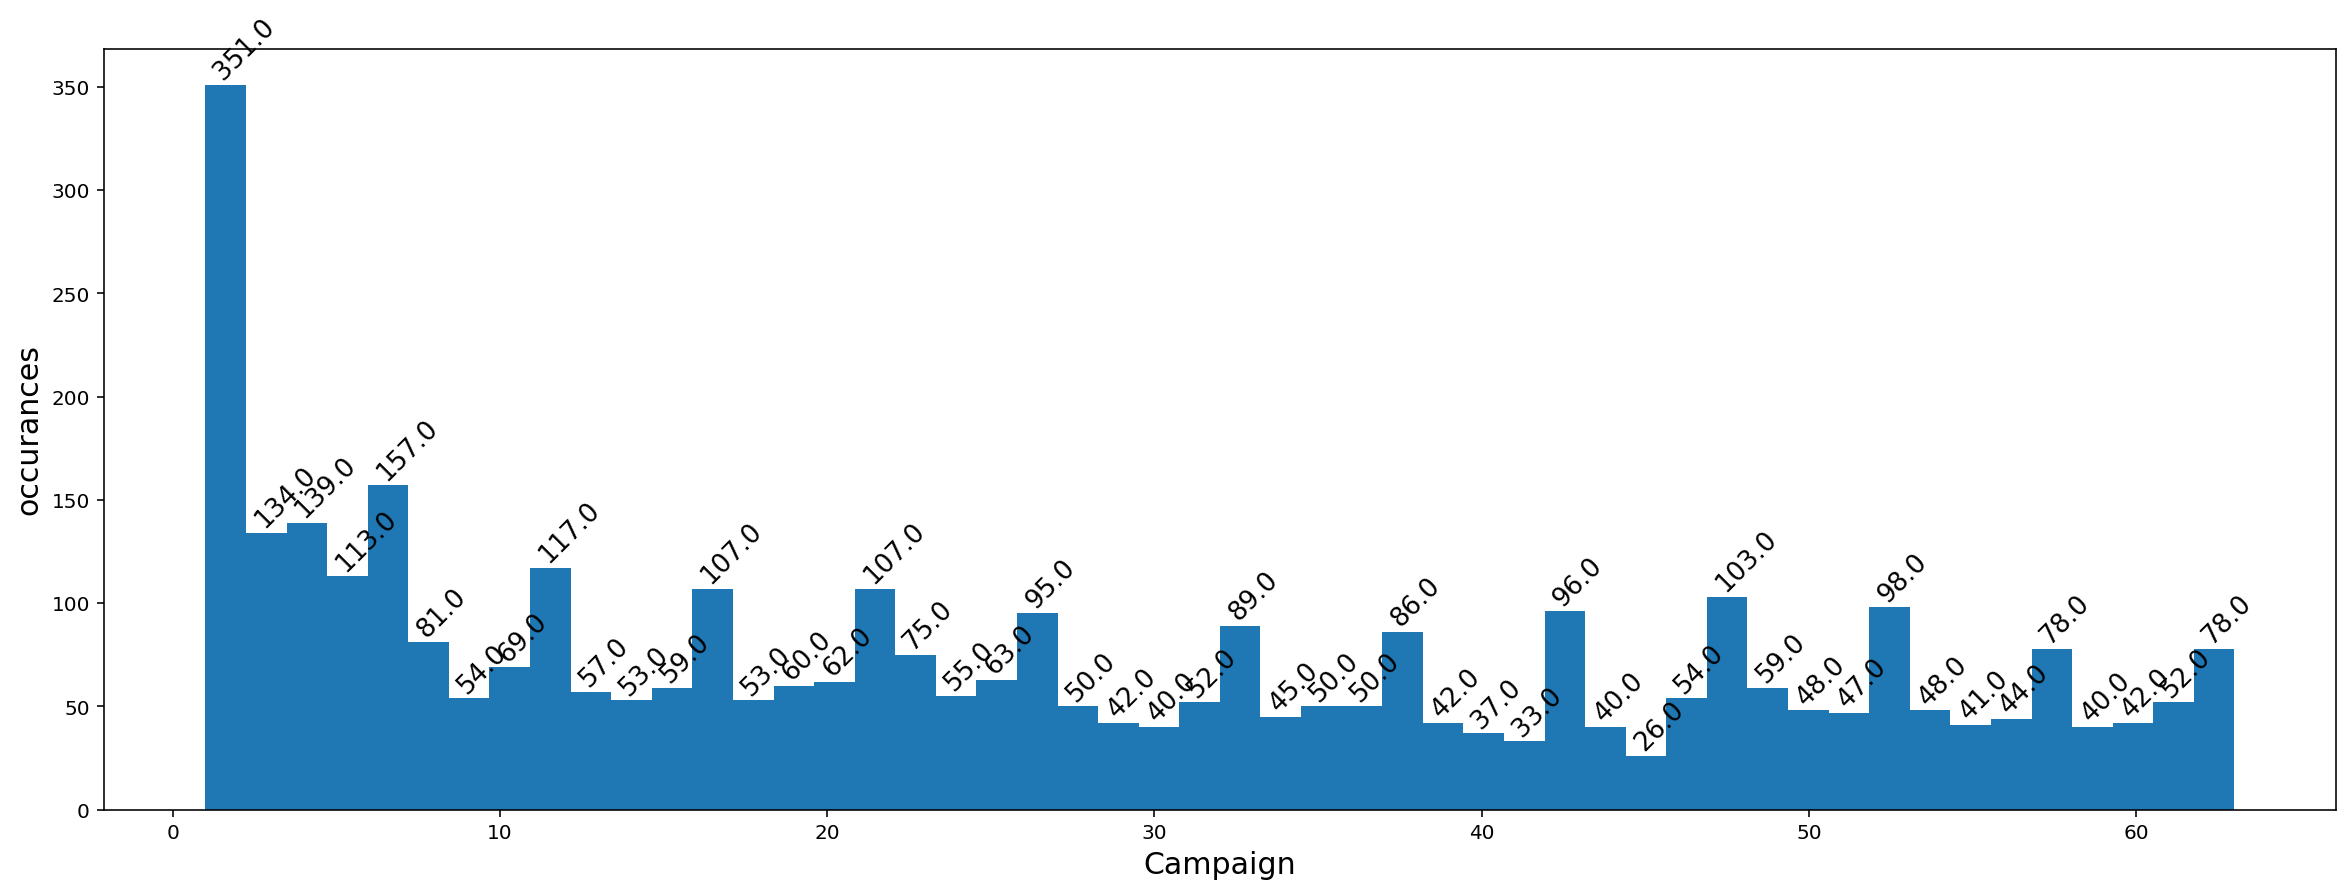

In [40]:
fig, ax = plt.subplots()

fig.set_size_inches(20,7)

ax.set_xlabel("Campaign", fontsize = 15)

ax.set_ylabel("occurances", fontsize = 15)

plt.hist(data.balance,bins = 50, histtype = 'bar', range = (1,63));

for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()+3, str(round((i.get_height()), 2)), fontsize=13, color='black', rotation = 45)

It is hard to see the skew in the plot, but with our previous finding, we can indeed see it is slightly right skewed.

In [41]:
print("The list of outliers is: ")
outliers(data.campaign)

The list of outliers is: 


0
0     83
1     75
2     75
3     83
4     75
5     76
6     83
7     85
8     90
9     82
10    73
11    74
12    75
13    78
14    85
15    80
16    78
17    73
18    75
19    94
20    83
21    79
22    78
23    83
24    73
25    76
26    83
27    77
28    73
29    74
...   ..
1936  16
1937  17
1938  15
1939  14
1940  15
1941  16
1942  18
1943  13
1944  14
1945  21
1946  18
1947  21
1948  20
1949  13
1950  13
1951  19
1952  15
1953  14
1954  17
1955  14
1956  16
1957  23
1958  15
1959  15
1960  15
1961  14
1962  15
1963  13
1964  13
1965  16

[1966 rows x 1 columns]

We have a fair amount of outliers here at 1966 in total.

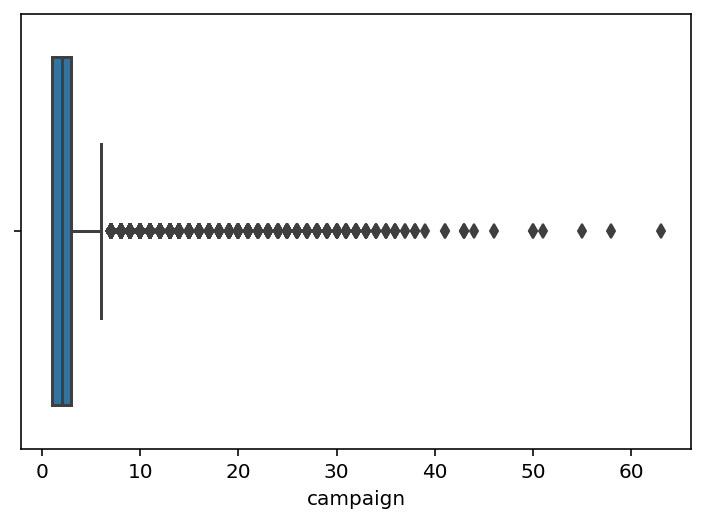

In [42]:
sns.boxplot(x=data['campaign'], data=data)

As seen from our outputs, we find that the campaign values are outliers beyond about 8 and there are lots of it

### Pdays 

In [43]:
print("Min Value = ", data.pdays.quantile(0))
print("Q1 or 25% = ", data.pdays.quantile(0.25))
print("Q2/Median = ", data.pdays.quantile(0.5))
print("Q3 or 75% = ", data.pdays.quantile(0.75))
print("Max value = ", data.pdays.quantile(1))
print("Interquartile Range = ", stats.iqr(data.pdays))
print("Mean value = %.3f" % np.mean(data.pdays))

Min Value =  -1.0
Q1 or 25% =  -1.0
Q2/Median =  -1.0
Q3 or 75% =  -1.0
Max value =  871.0
Interquartile Range =  0.0
Mean value = 40.198


We see from above that most people have not been contacted before, as indicated by the Q3 being -1, therefore our interquartile range and mean values do not indicate anything useful. We shall see the plot for the same

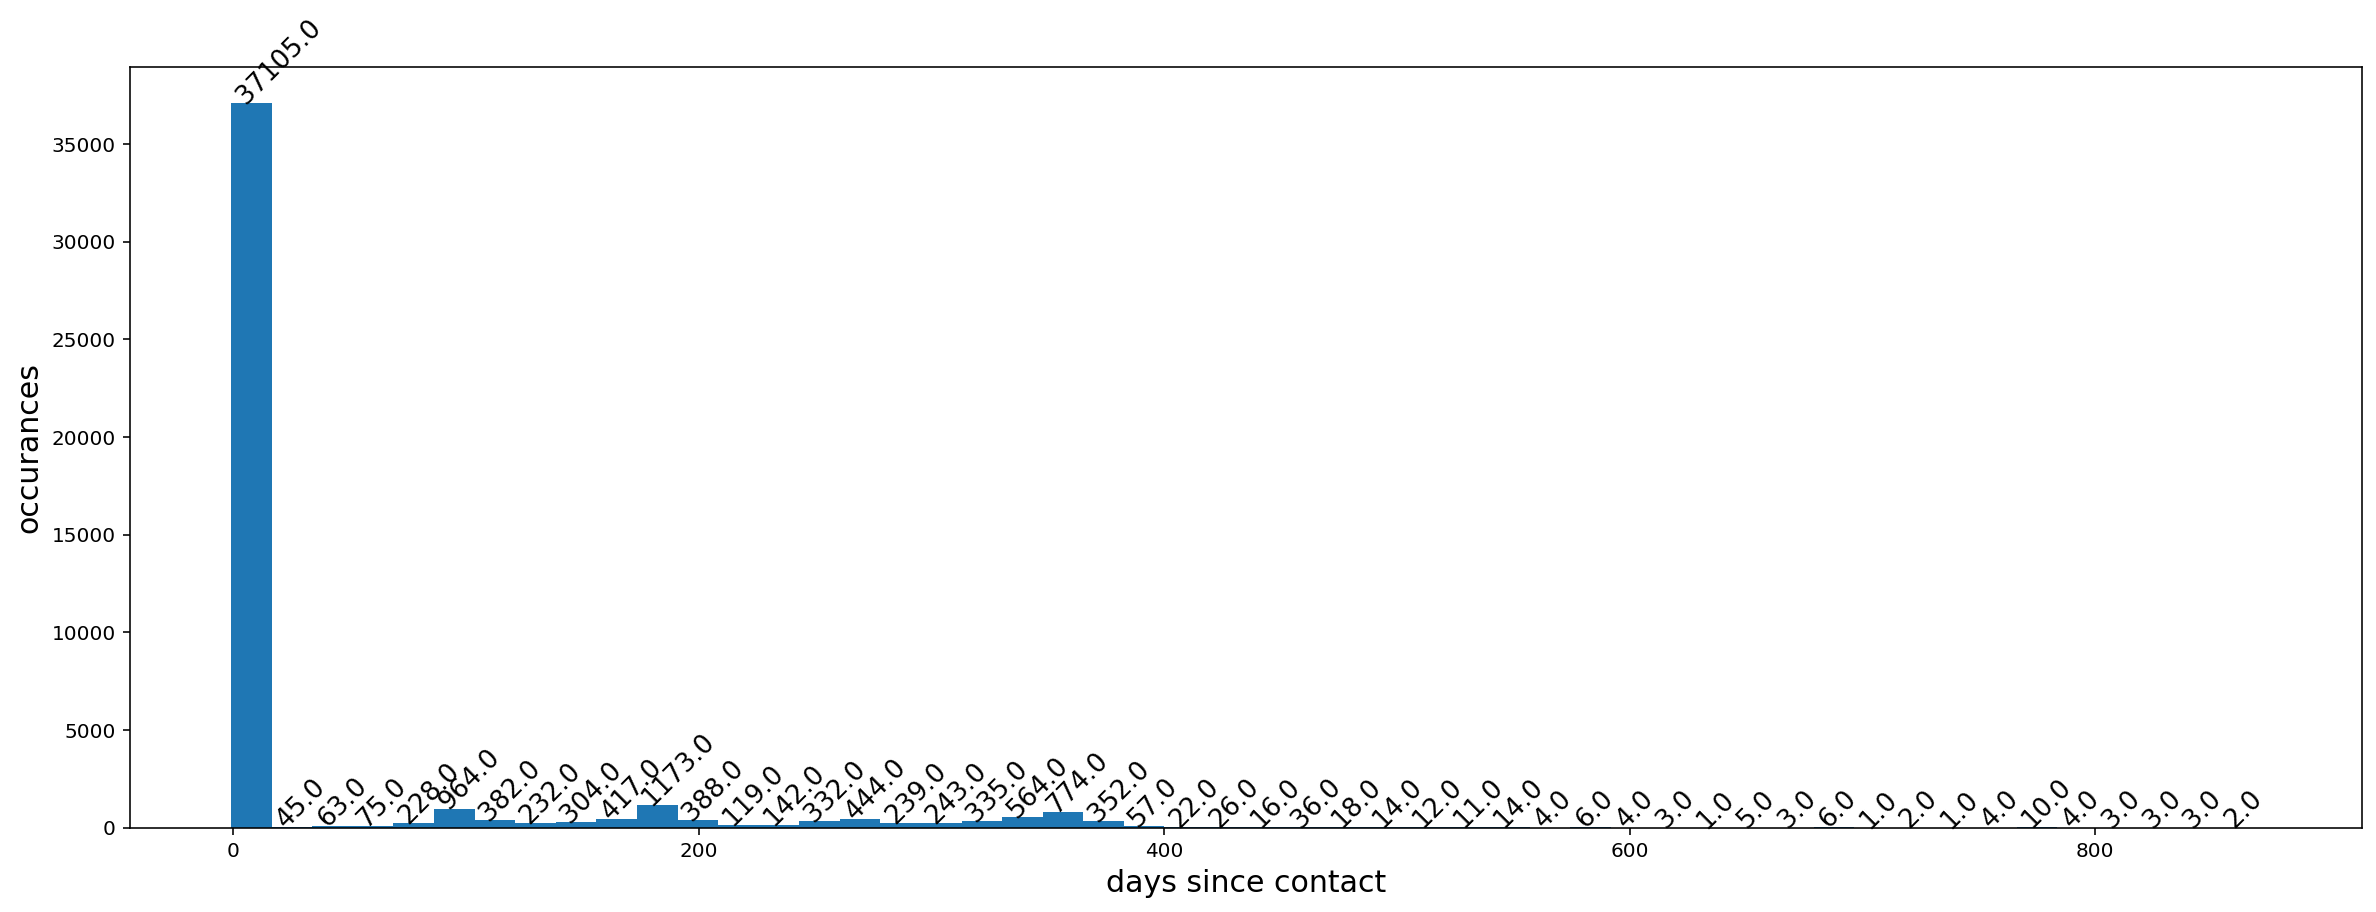

In [44]:
fig, ax = plt.subplots()

fig.set_size_inches(20,7)

ax.set_xlabel("days since contact", fontsize = 15)

ax.set_ylabel("occurances", fontsize = 15)

plt.hist(data.pdays,bins = 50, histtype = 'bar', range = (-1,data.pdays.max()));

for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()+3, str(round((i.get_height()), 2)), fontsize=13, color='black', rotation = 45)

Here, we see that the data is highly right-skewed, however, it doesn't indicate anything useful to us beyond that since most are not contacted previously

### previous 

In [45]:
print("Min Value = ", data.previous.quantile(0))
print("Q1 or 25% = ", data.previous.quantile(0.25))
print("Q2/Median = ", data.previous.quantile(0.5))
print("Q3 or 75% = ", data.previous.quantile(0.75))
print("Max value = ", data.previous.quantile(1))
print("Interquartile Range = ", stats.iqr(data.previous))
print("Mean value = %.3f" % np.mean(data.previous))

Min Value =  0.0
Q1 or 25% =  0.0
Q2/Median =  0.0
Q3 or 75% =  0.0
Max value =  275.0
Interquartile Range =  0.0
Mean value = 0.580


As seen above, most of our clients were never contact previously. Hence, there is also nothing useful which can be determined from this analysis

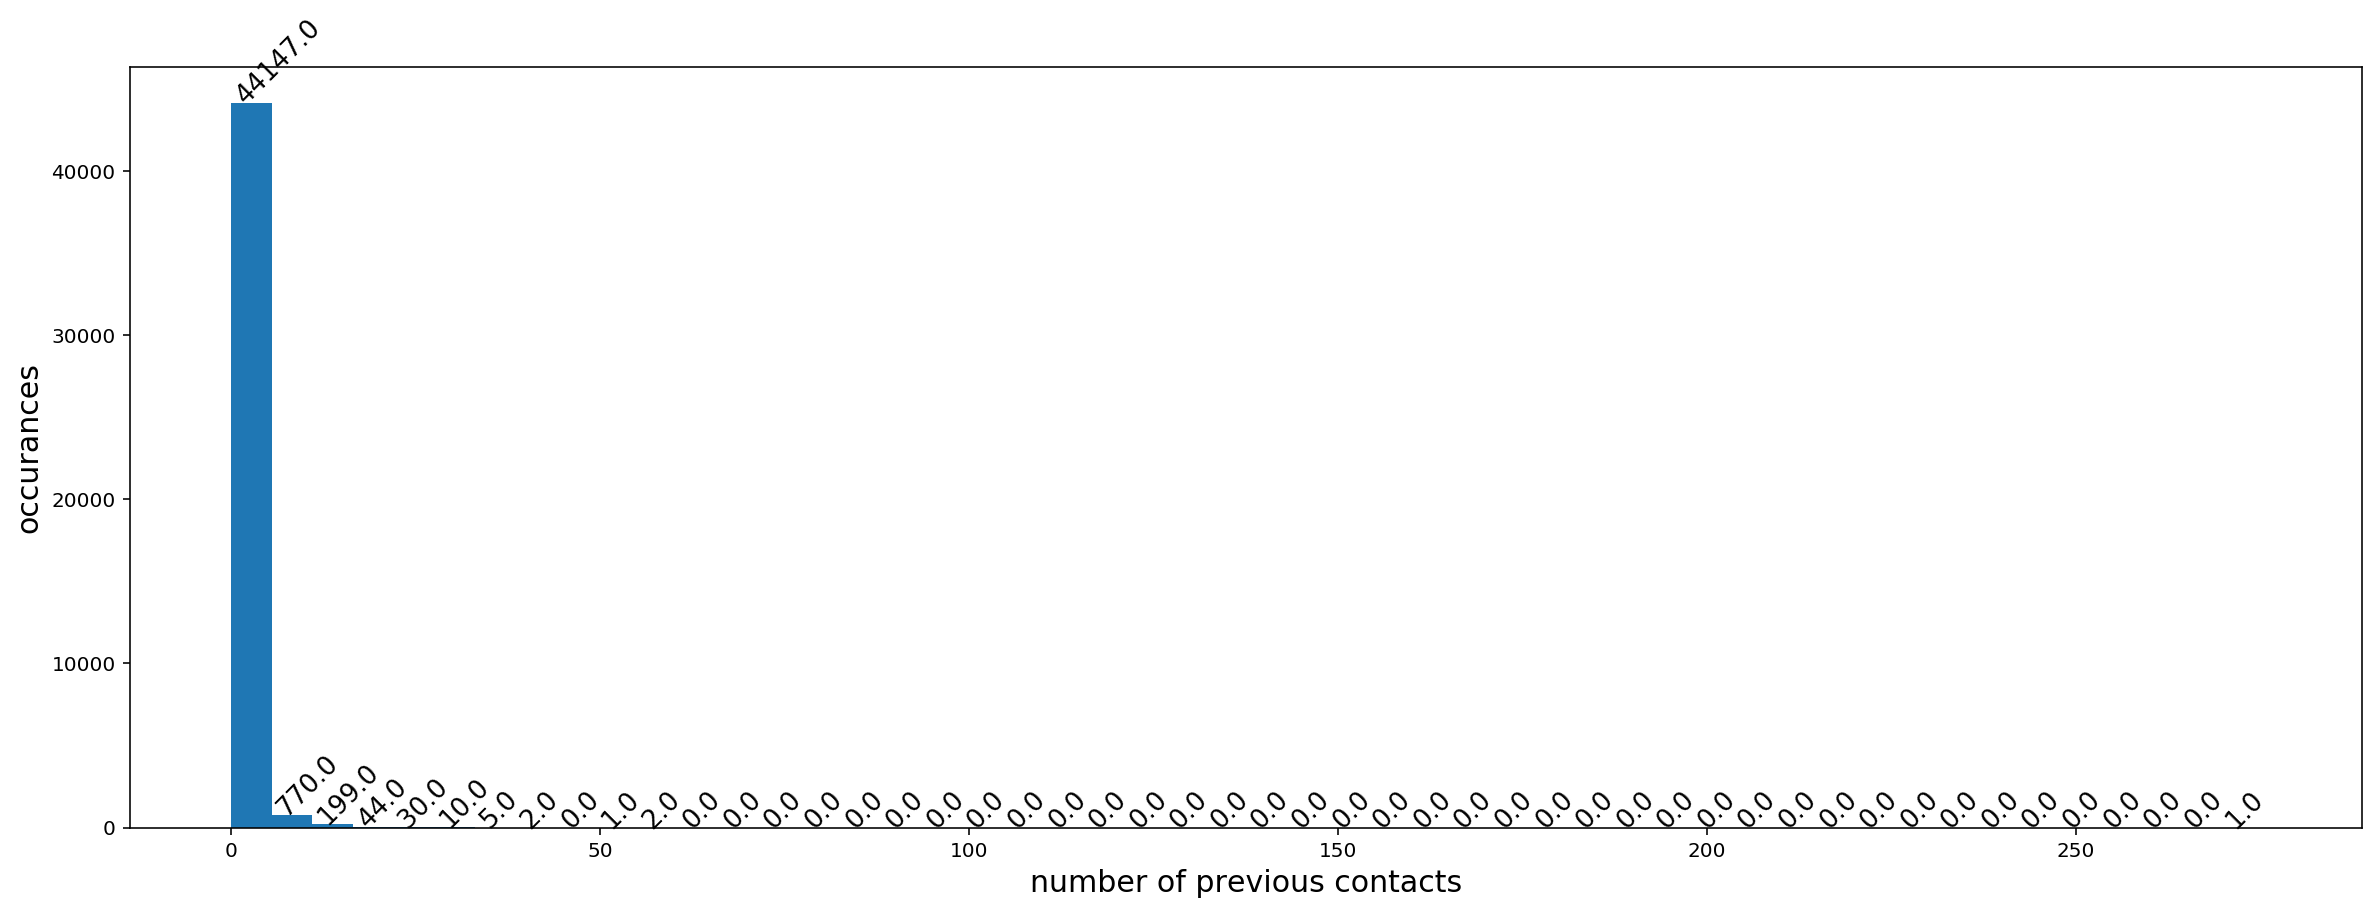

In [46]:
fig, ax = plt.subplots()

fig.set_size_inches(20,7)

ax.set_xlabel("number of previous contacts", fontsize = 15)

ax.set_ylabel("occurances", fontsize = 15)

plt.hist(data.previous,bins = 50, histtype = 'bar', range = (0,data.previous.max()));

for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()+3, str(round((i.get_height()), 2)), fontsize=13, color='black', rotation = 45)

As seen above, 44147 people were never contacted previously, thus this value is highly imbalanced and of little use. We may consider dropping this value.

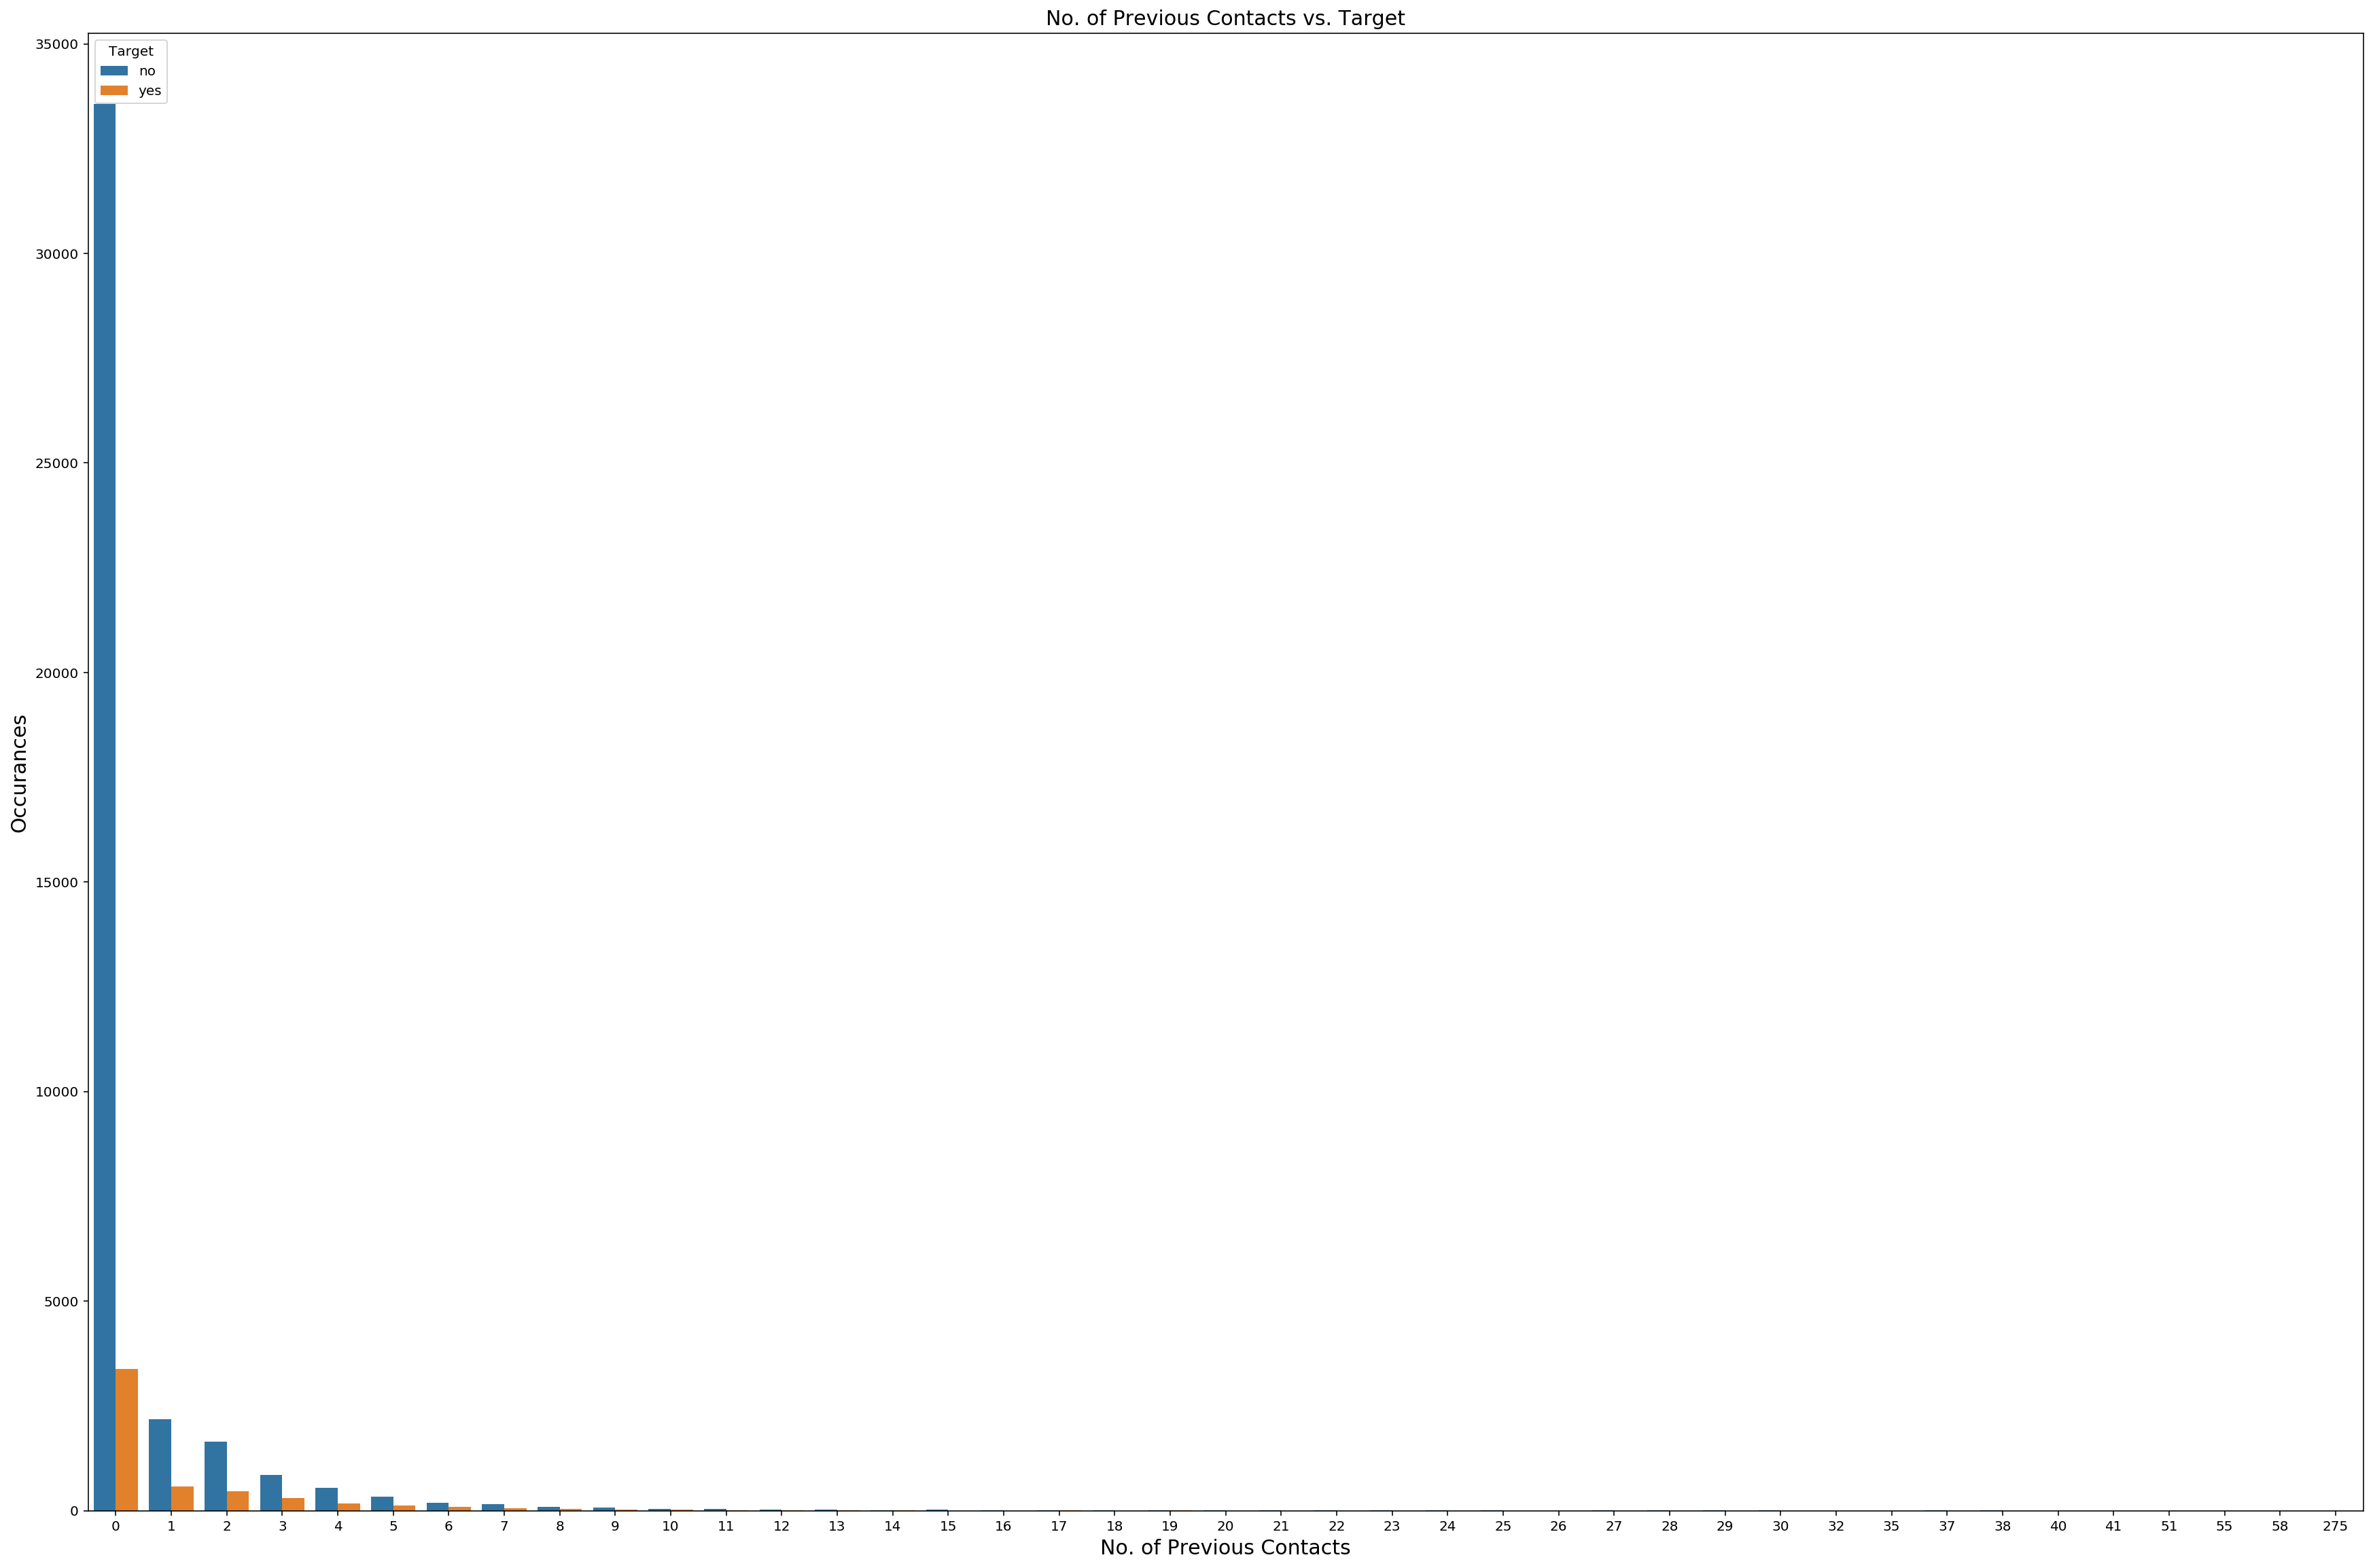

In [47]:
fig, (ax)=plt.subplots(figsize=(30,20))

sns.countplot(data.previous, ax=ax, hue = data.Target)
ax.set_xlabel('No. of Previous Contacts', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('No. of Previous Contacts vs. Target', fontsize=15)
ax.tick_params(labelsize=10)

As seen here, we are seeing an extreme imbalance of previous class with respect to the Target. Hence, as this will negatively impact our model, we can drop this data

In [48]:
data.drop('previous', inplace = True, axis = 1)

In [49]:
data.head()

age           job  marital  education  balance housing loan  contact  day  \
0   58  white collar  married   tertiary     2143     yes   no  unknown    5   
1   44   blue collar   single  secondary       29     yes   no  unknown    5   
2   33  white collar  married  secondary        2     yes  yes  unknown    5   
3   47   blue collar  married    unknown     1506     yes   no  unknown    5   
4   33         other   single    unknown        1      no   no  unknown    5   

  month  campaign  pdays poutcome Target  
0   may         1     -1  unknown     no  
1   may         1     -1  unknown     no  
2   may         1     -1  unknown     no  
3   may         1     -1  unknown     no  
4   may         1     -1  unknown     no

As seen above, we have successfully dropped the previous class

### poutcome 

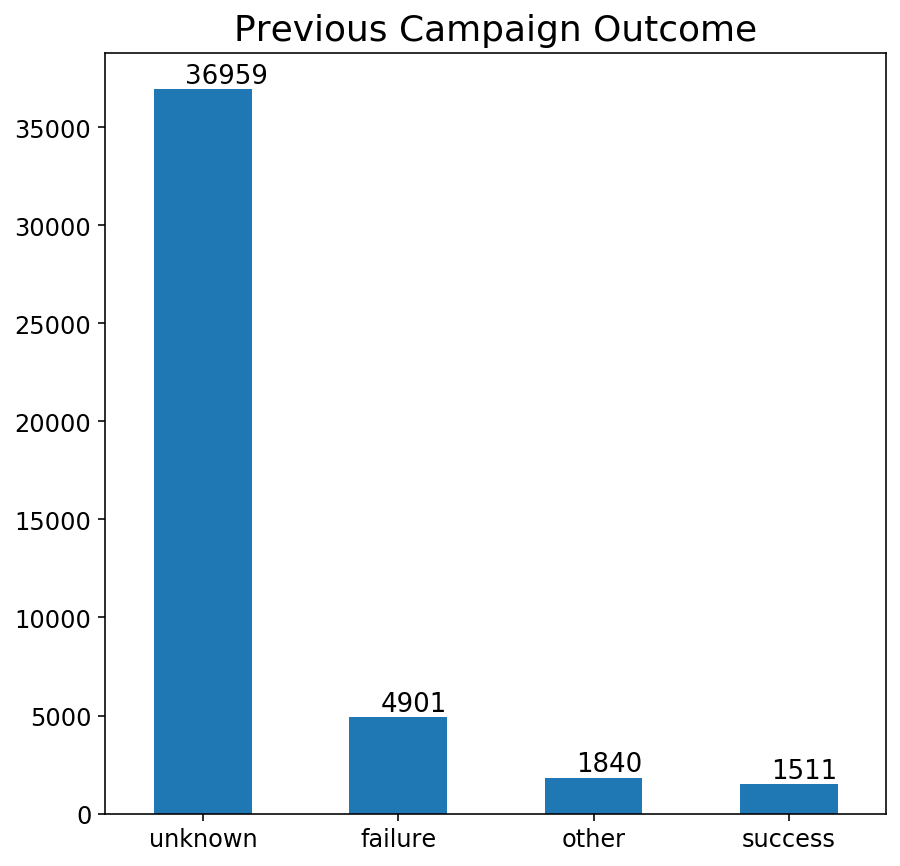

In [50]:
ax = data['poutcome'].value_counts().plot(kind = 'bar',figsize = (7,7))

ax.set_title("Previous Campaign Outcome", fontsize = 18)
ax.tick_params(rotation = 0, labelsize = 12)
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+300, str(round((i.get_height()), 2)), fontsize=13, color='black')

From what we see, most of the outcome of previous campaign is unknown, thus telling us that the data is not complete. Also, "other and unknown" both are categories which we do not understand. Hence, to reduce complexity, we can combine these two into single category "other"

In [51]:
data.poutcome=np.where(data.poutcome=='unknown','other',data.poutcome)

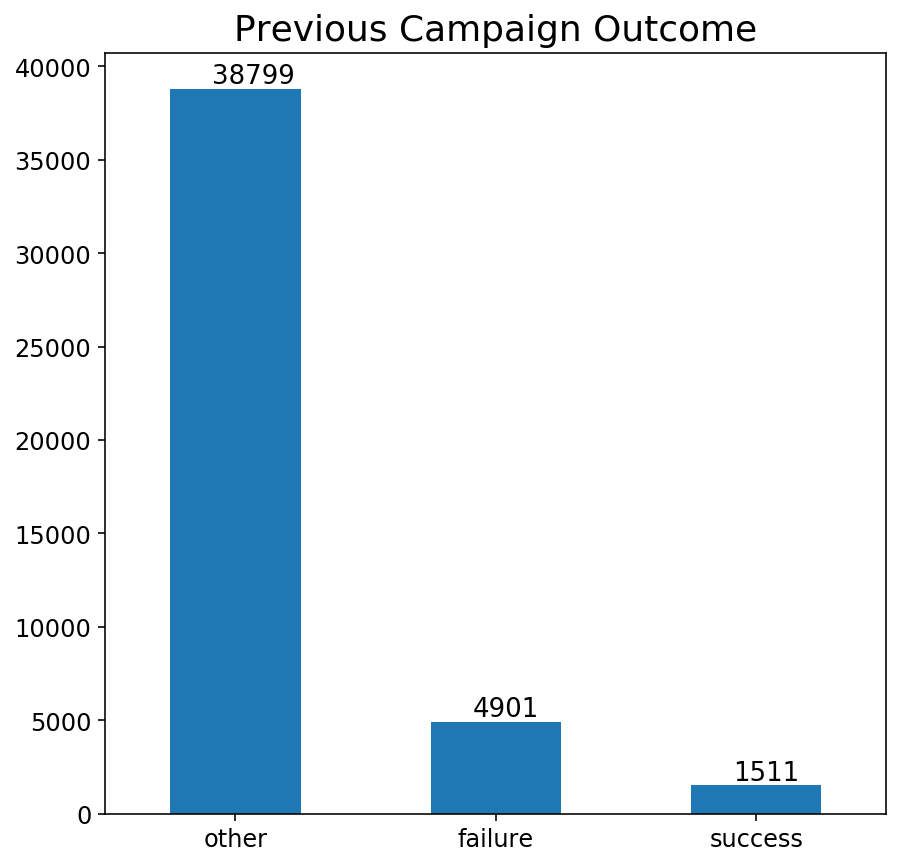

In [52]:
ax = data['poutcome'].value_counts().plot(kind = 'bar',figsize = (7,7))

ax.set_title("Previous Campaign Outcome", fontsize = 18)
ax.tick_params(rotation = 0, labelsize = 12)
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+300, str(round((i.get_height()), 2)), fontsize=13, color='black')

We have successfully combined the other and unknown categories into single category of 'other

**We have finished our univariate analysis. We can move on to bivariate analysis of each variable against the target value**

## Bivariate Data Analytics 

In this portion, we will use cross tab and countplots for the categorical variable w.r.t. Target value, and count mean of numerical variables w.r.t. Target Value

### Age

In [53]:
age = np.round(data['age'].groupby([data.Target]).mean() ,1)
print(age)

Target
no     40.8
yes    41.7
Name: age, dtype: float64


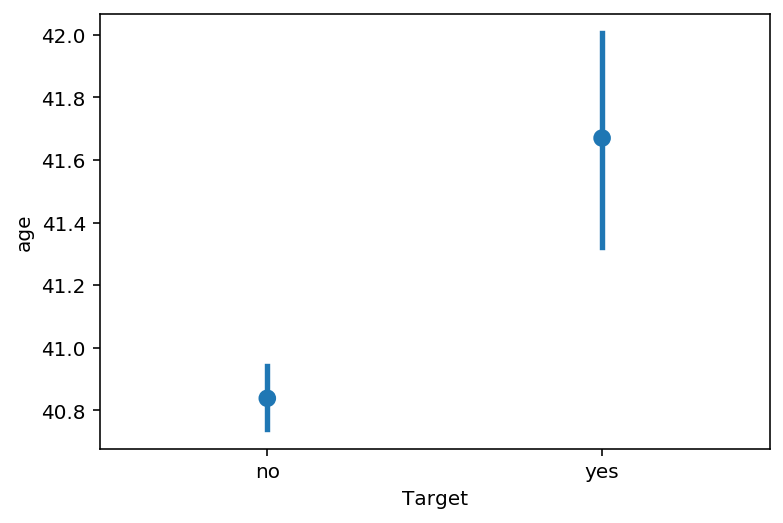

In [54]:
sns.pointplot(x=data.Target,y=data.age, join = False)

As seen from our output above, those who have subscribed to the term deposit are on average 41.7 years of age, higher than those who didnt, with 40.8 years of age. Also, the distribution of those who have subscribed to term deposit is more widely distributed than those who did not

### Job

In [55]:
pd.crosstab(data['job'],data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target              no       yes
job                             
other         0.810421  0.189579
white collar  0.872487  0.127513
blue collar   0.910670  0.089330
pink collar   0.911383  0.088617

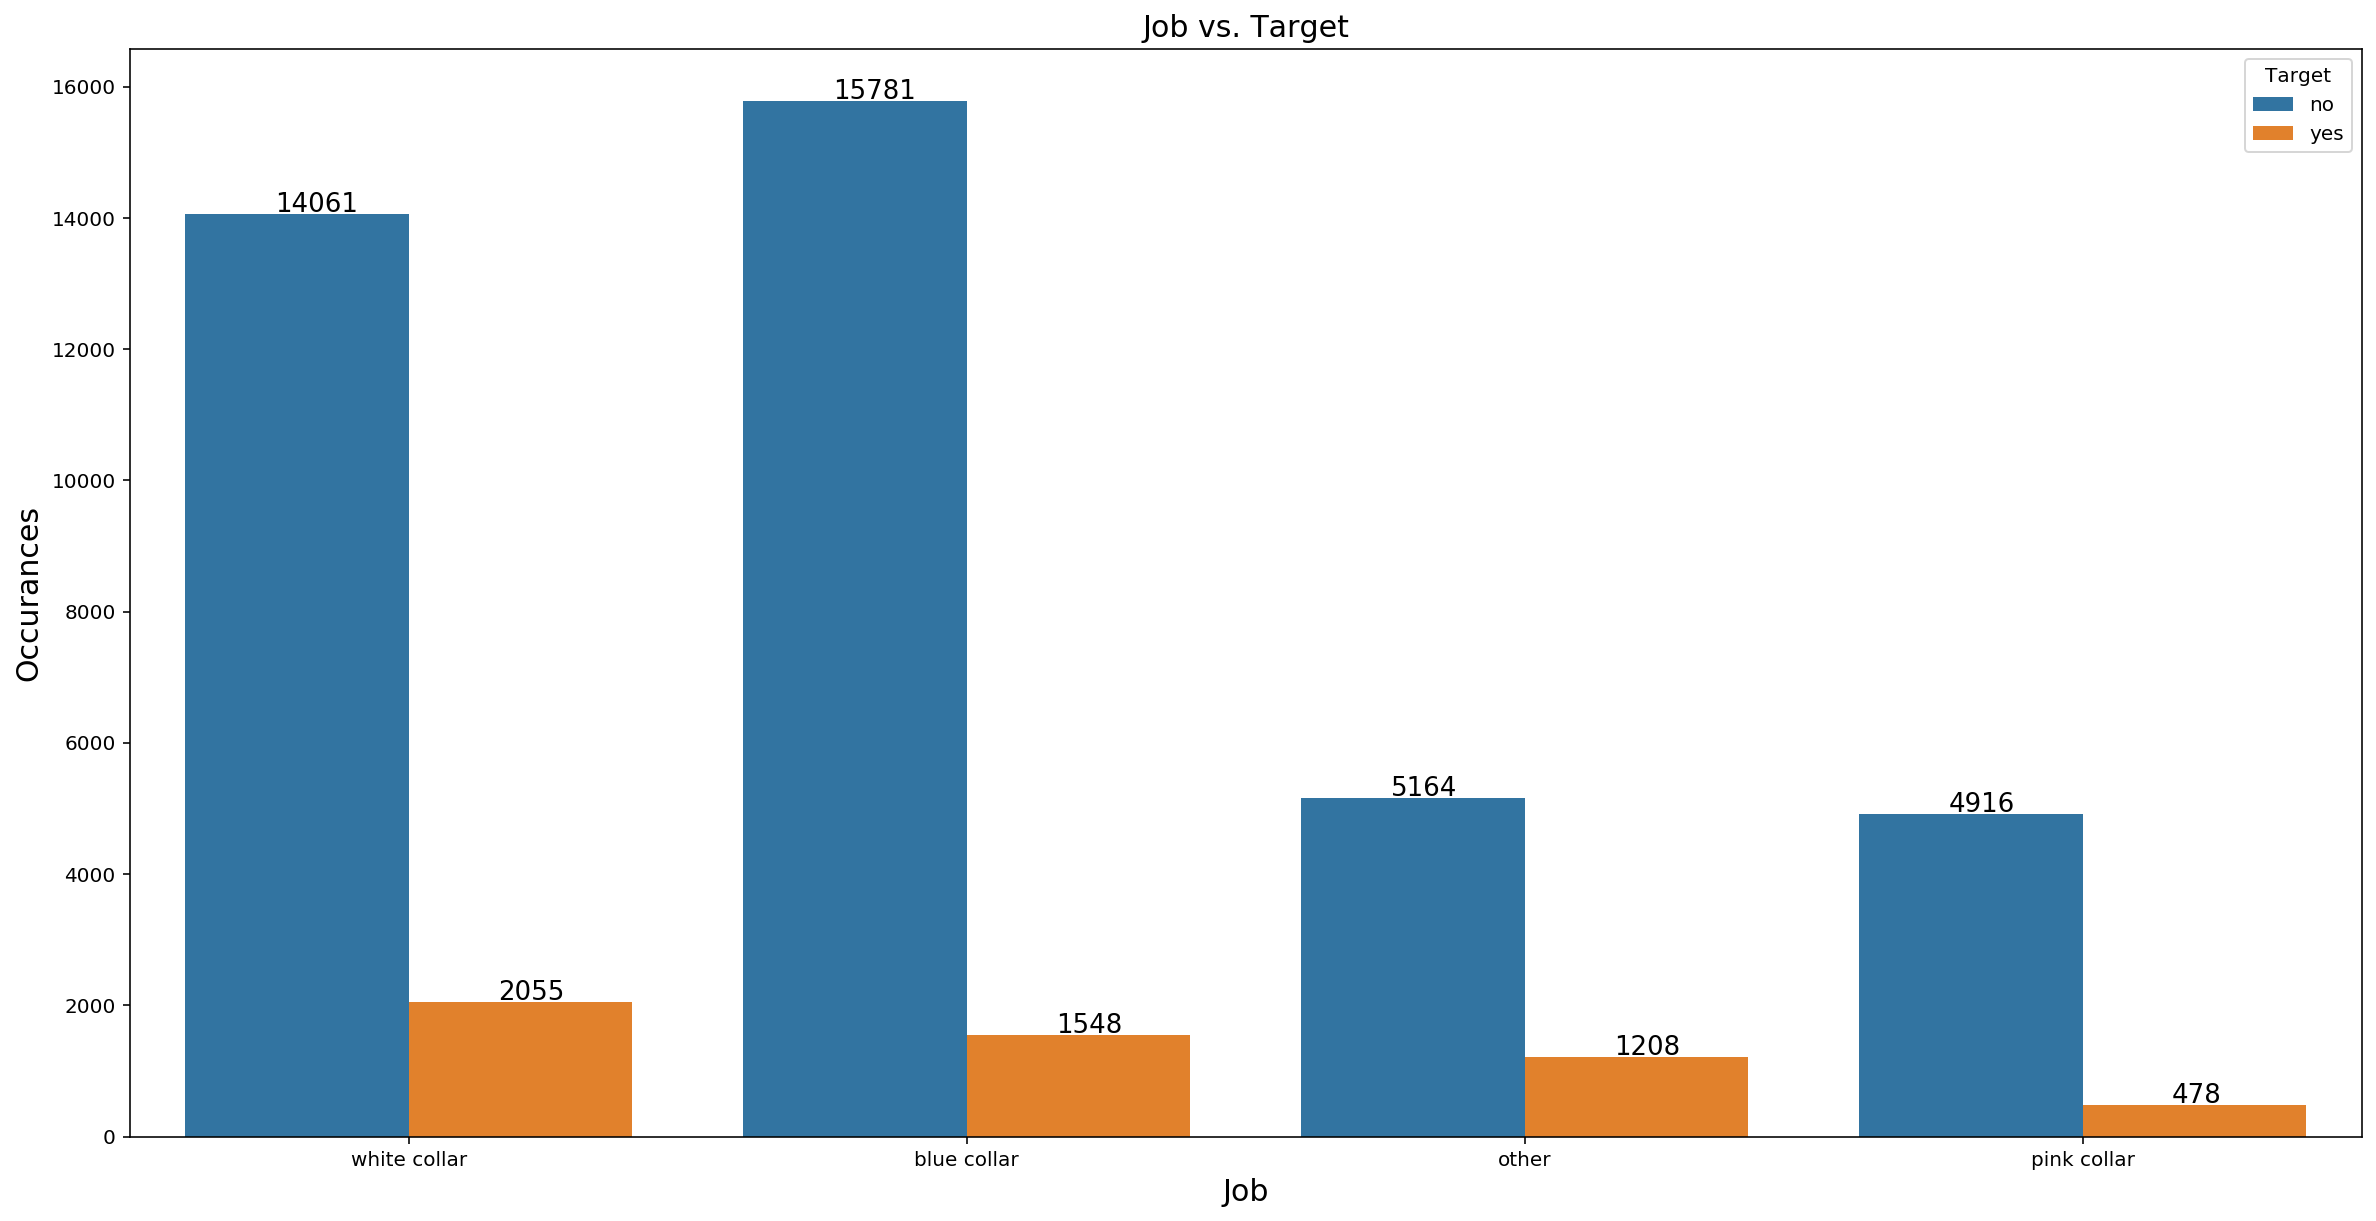

In [56]:
fig, (ax)=plt.subplots(figsize=(20,10))

sns.countplot(data.job,ax=ax, hue = data.Target)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('Job vs. Target', fontsize=15)
ax.tick_params(labelsize=10)
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+30, str(round((i.get_height()), 2)), fontsize=13, color='black')

From what we see above, the highest percentage of conversion is the white collar people, with 2055 of them and at 18% conversion rate. The lowest percentage of those who subscribe is the pink collar people, with 478 of them at 8% conversion rate. The highest percentage of those who do not subscribe are the blue-collar people, with 15781 of them at 87% non-conversion rate and lowest number of people who do no subscribe is the pink collar job people with 4916 of them. However, the most % of people contact who do not subscribe are the 'other' category with 81%  of them not converting

### Martial Status 

In [57]:
pd.crosstab(data['marital'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target          no       yes
marital                     
single    0.850508  0.149492
divorced  0.880545  0.119455
married   0.898765  0.101235

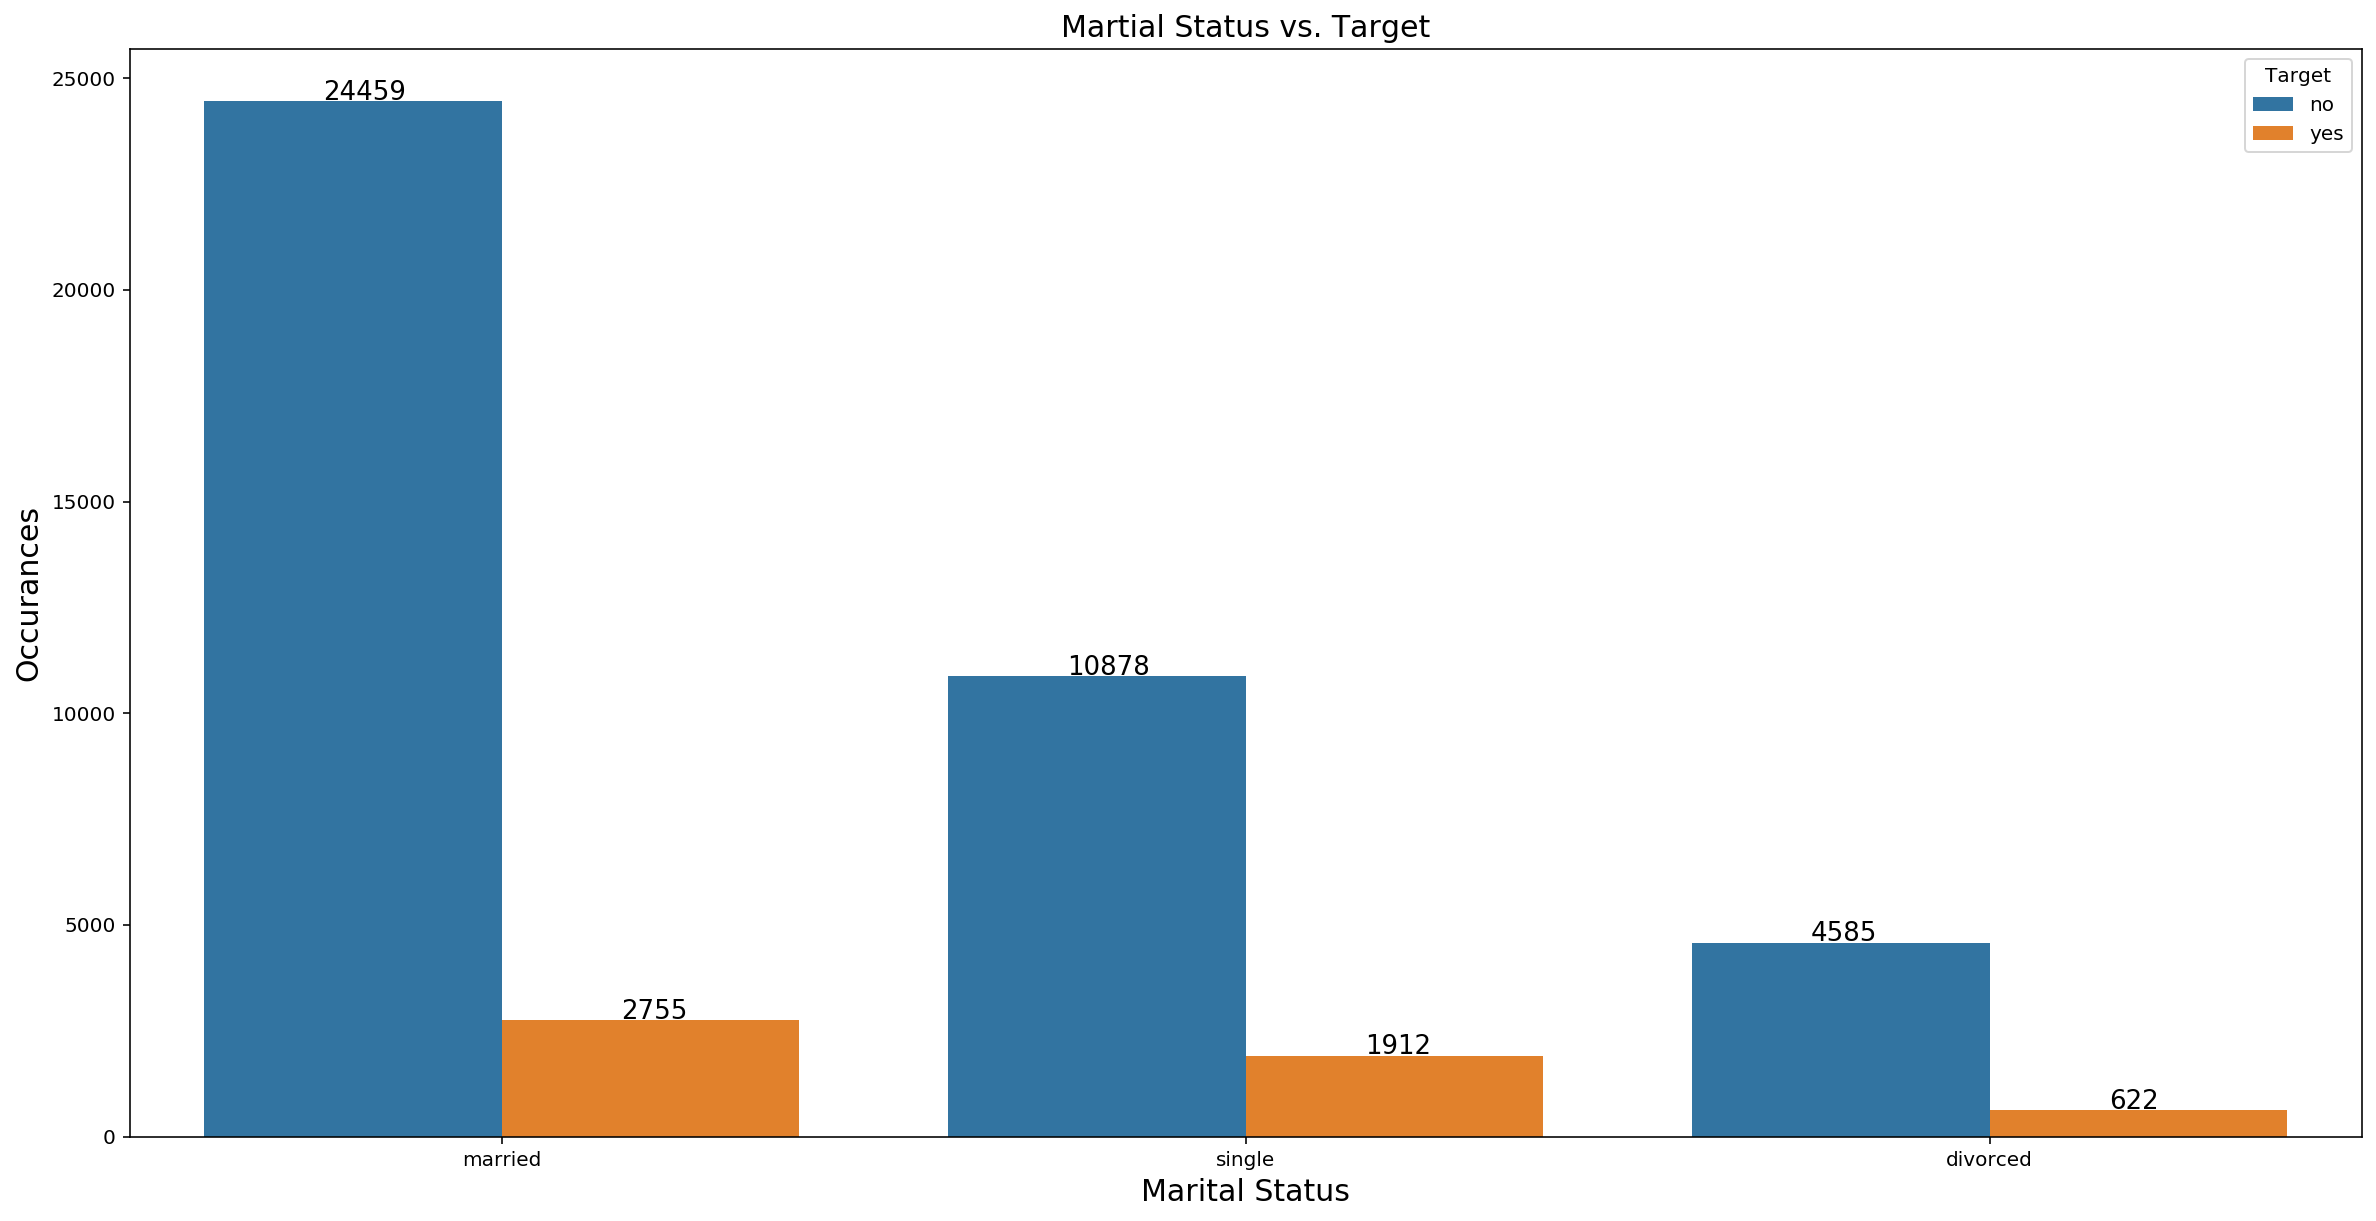

In [58]:
fig, (ax)=plt.subplots(figsize=(20,10))

sns.countplot(data.marital,ax=ax, hue = data.Target)
ax.set_xlabel('Marital Status', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('Martial Status vs. Target', fontsize=15)
ax.tick_params(labelsize=10)
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+30, str(round((i.get_height()), 2)), fontsize=13, color='black')

As seen above, highest percentage of people contacted who subscribed were the married and the lowest is the divorced people

### Education 

In [59]:
pd.crosstab(data['education'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target           no       yes
education                    
tertiary   0.849936  0.150064
unknown    0.864297  0.135703
secondary  0.894406  0.105594
primary    0.913735  0.086265

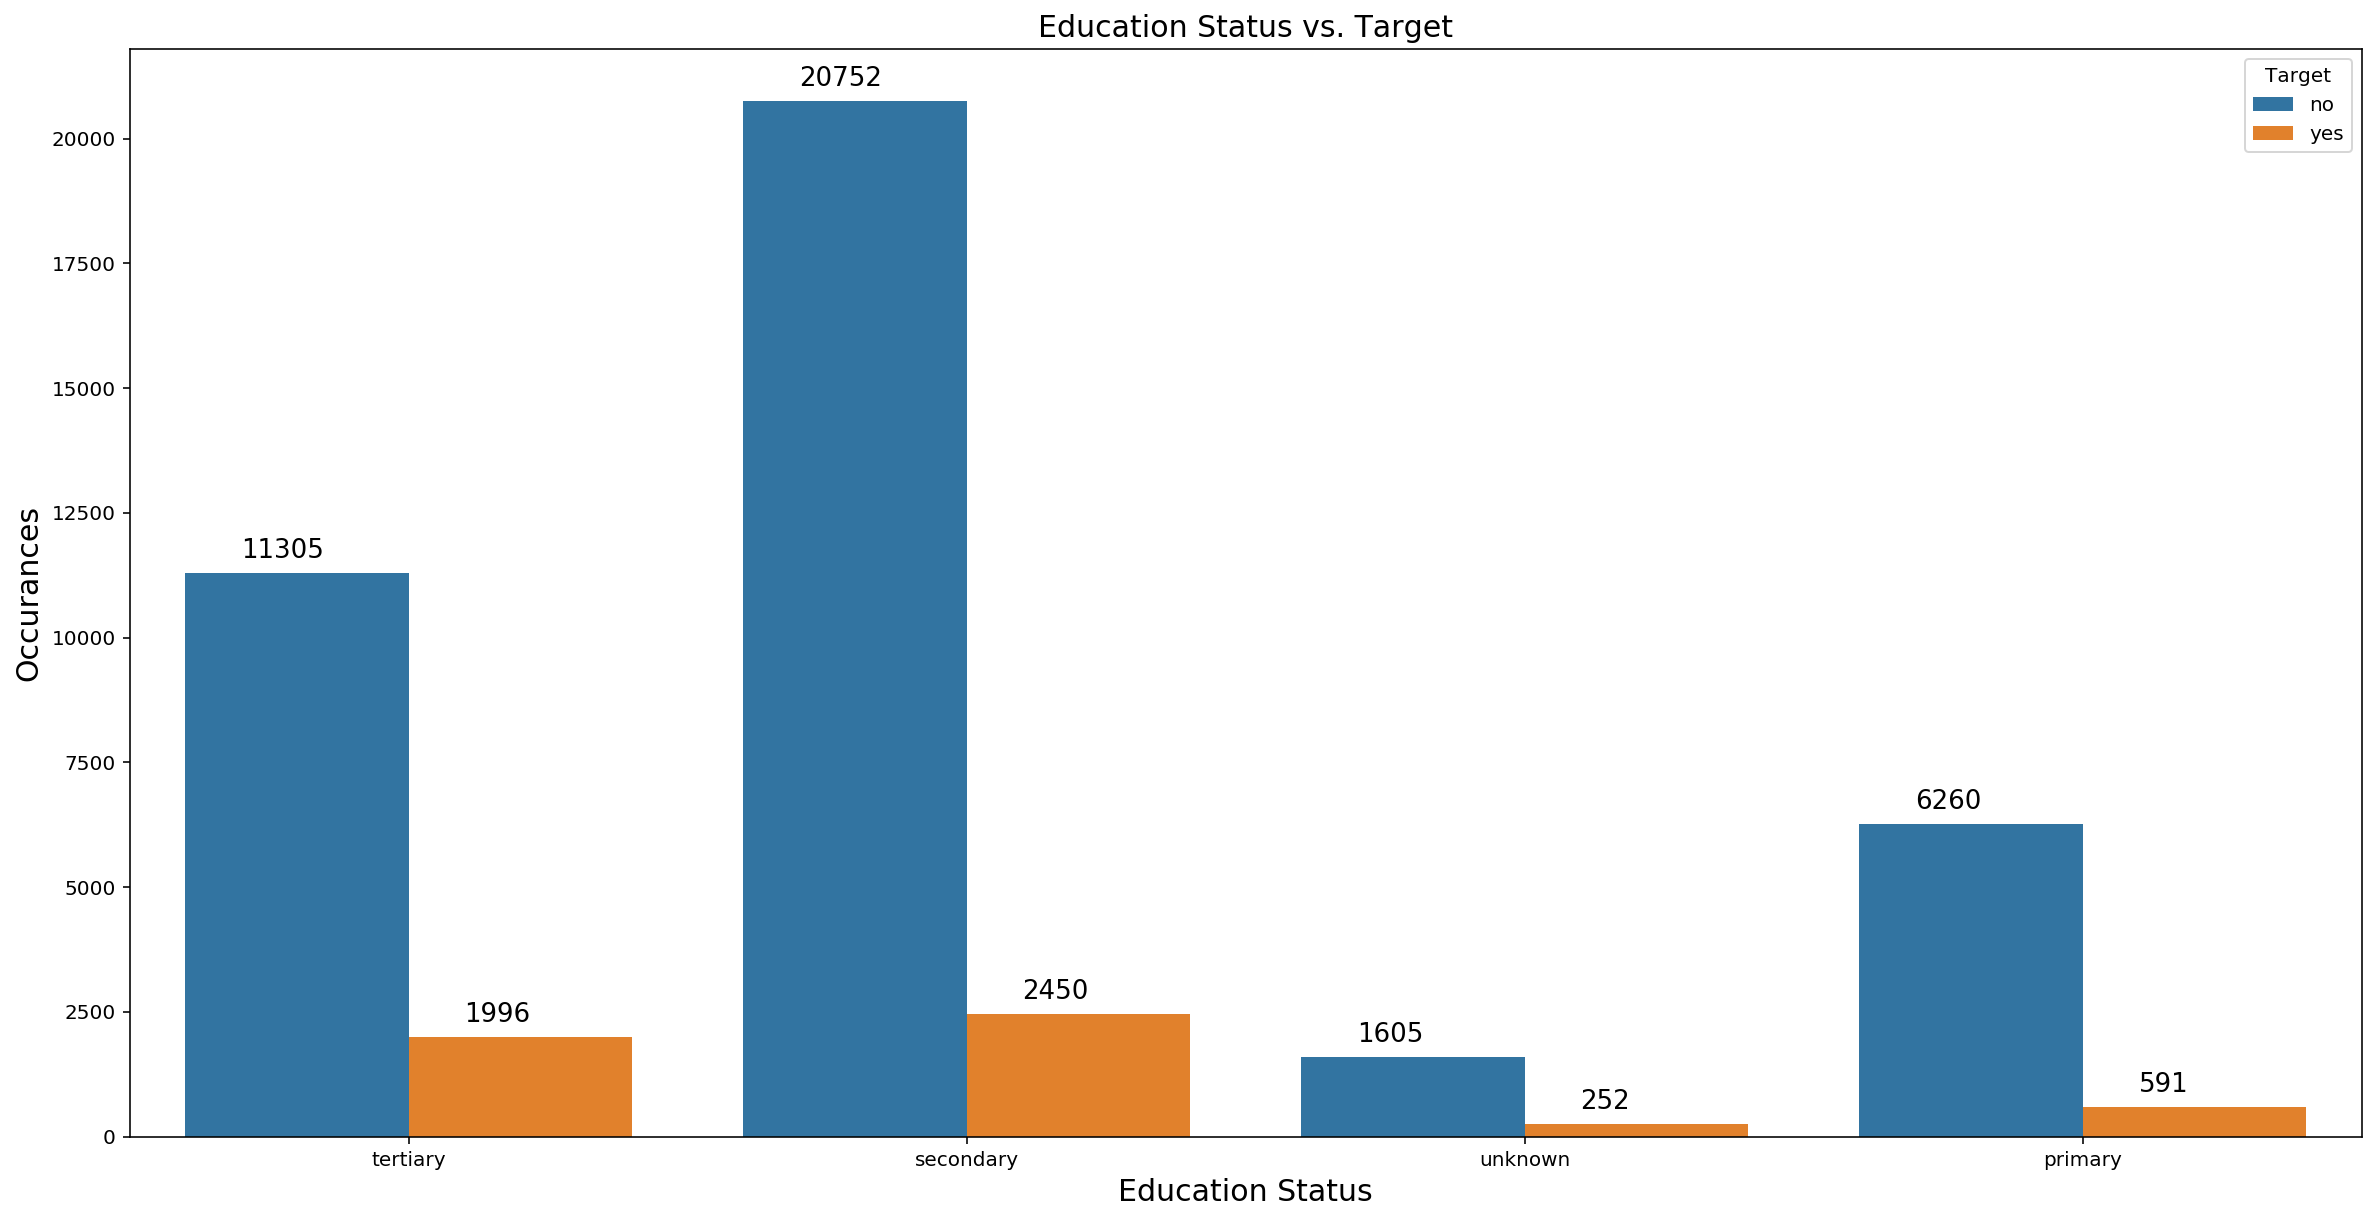

In [60]:
fig, (ax)=plt.subplots(figsize=(20,10))

sns.countplot(data.education,ax=ax, hue = data.Target)
ax.set_xlabel('Education Status', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('Education Status vs. Target', fontsize=15)
ax.tick_params(labelsize=10)
for i in ax.patches:
    ax.text(i.get_x()+0.10, i.get_height()+300, str(round((i.get_height()), 2)), fontsize=13, color='black')

As seen above, people with secondary education are the highest number of subscribers with only 252 unknown education people subscribing. The highest number of non subscribers are also secondary education people and lowest is also the unknown people. Highest conversion rate belongs to the tertiary educated people, with lowest conversion rate belonging to the primary education people 

### Balance 

In [61]:
balance = np.round(data['balance'].groupby([data.Target]).mean() ,1)
print(balance)

Target
no     1303.7
yes    1804.3
Name: balance, dtype: float64


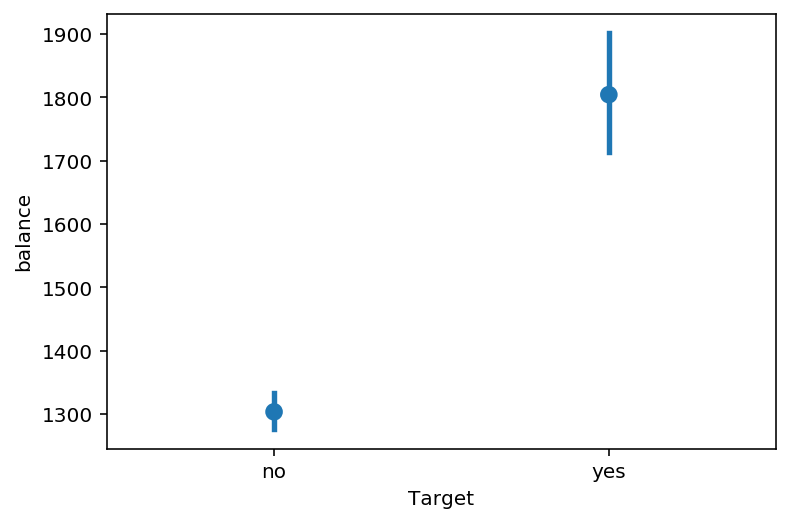

In [62]:
sns.pointplot(x=data.Target,y=data.balance, join = False)

Here, we see that those having higher average balance generally tend to subscribe as opposed to those having lower balance

###  Loan 

In [63]:
pd.crosstab(data['loan'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target        no       yes
loan                      
no      0.873443  0.126557
yes     0.933186  0.066814

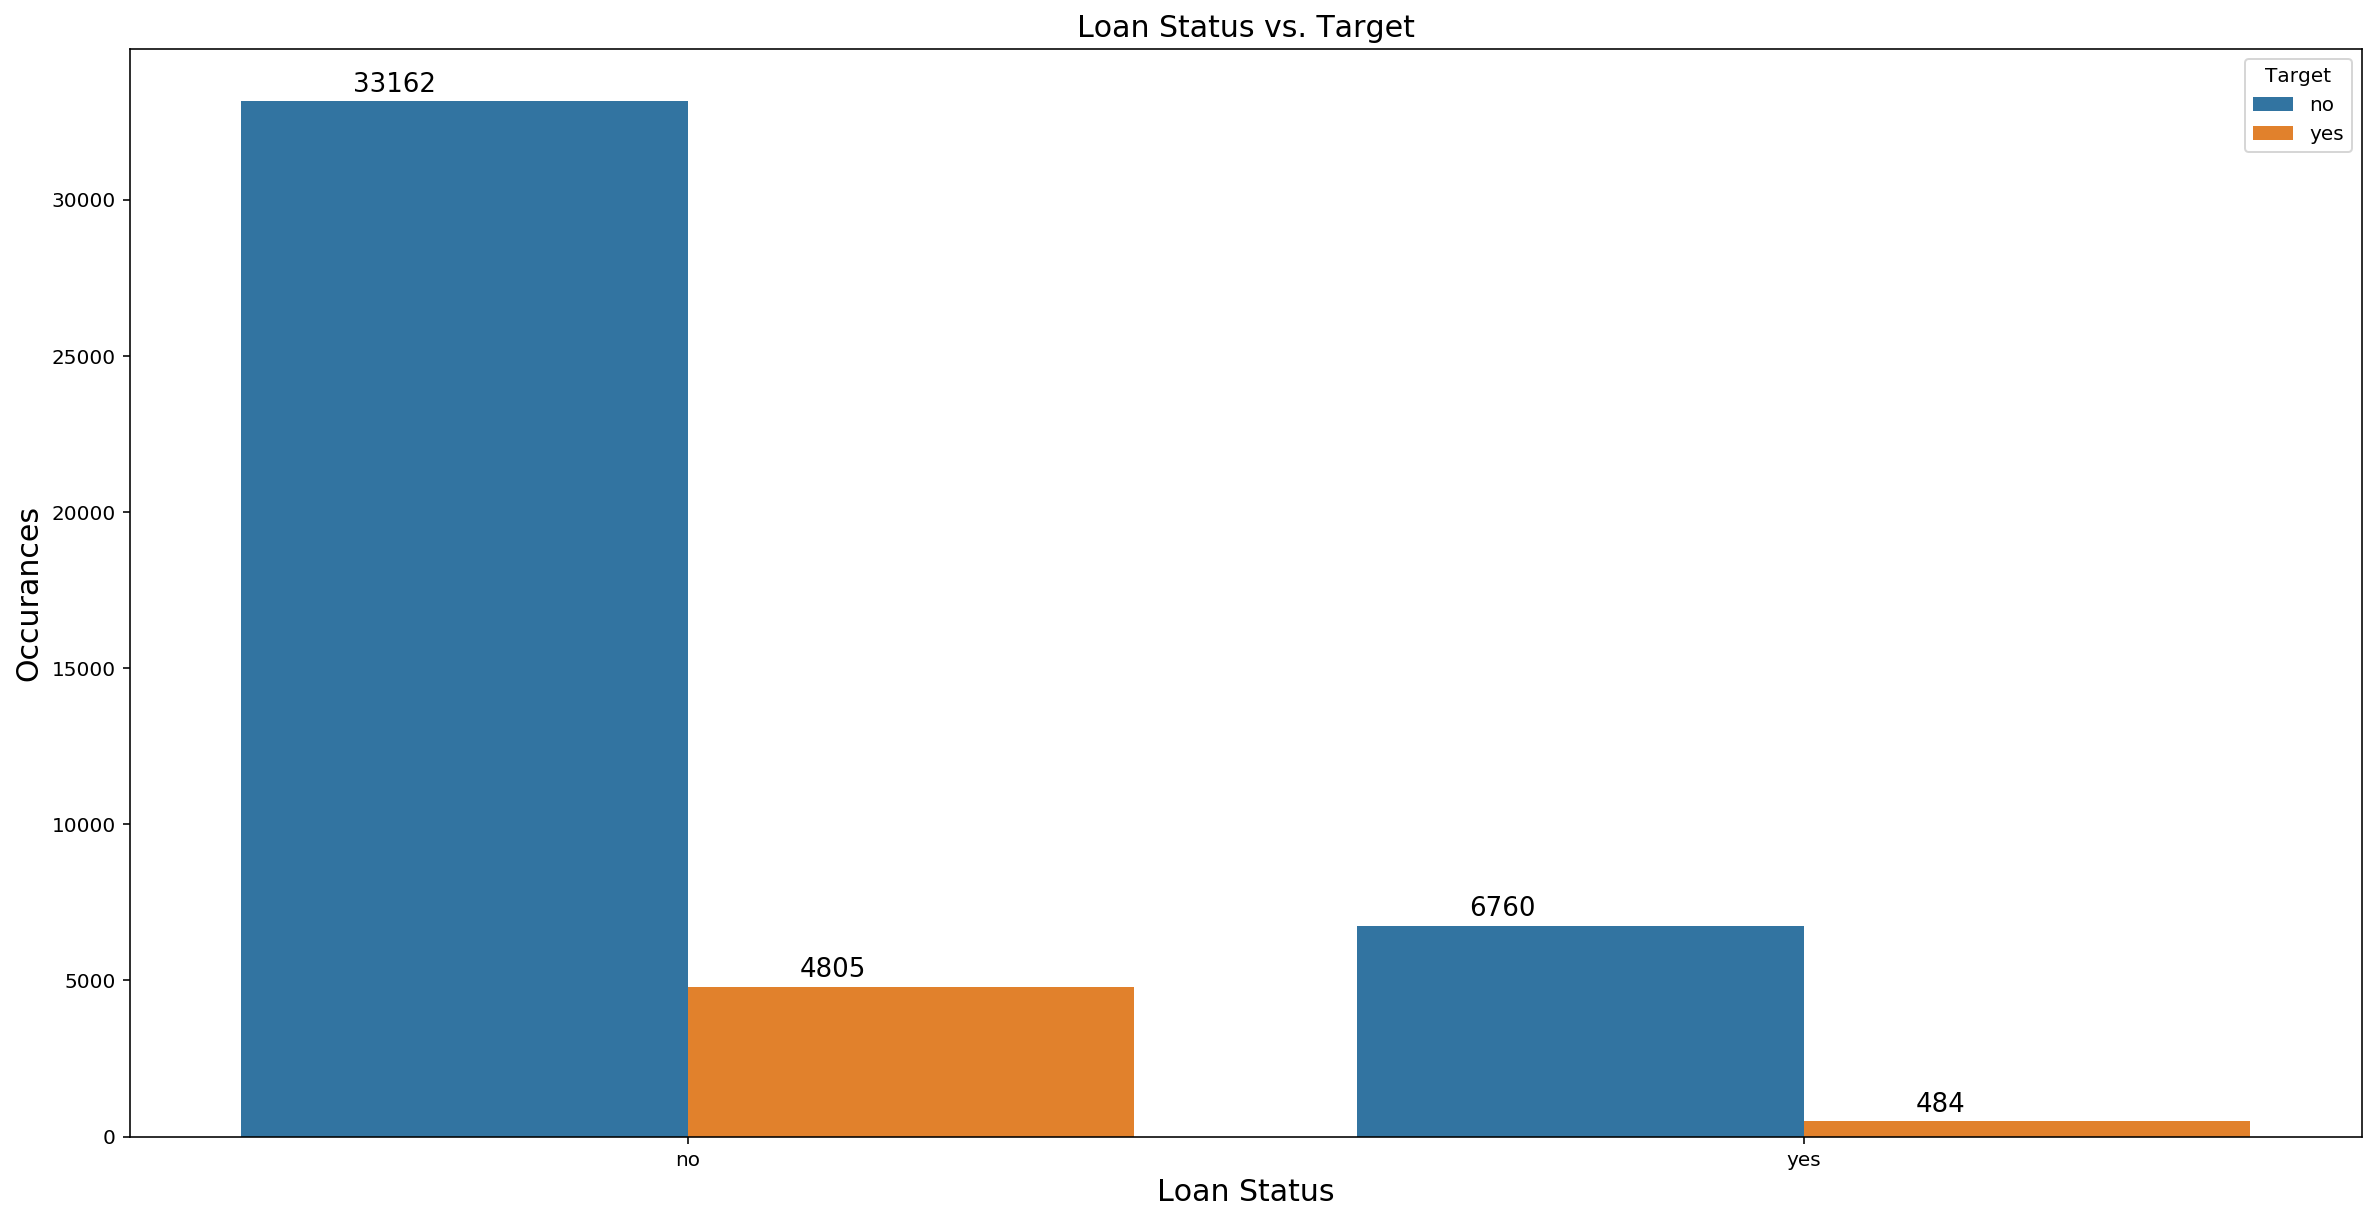

In [64]:
fig, (ax)=plt.subplots(figsize=(20,10))

sns.countplot(data.loan,ax=ax, hue = data.Target)
ax.set_xlabel('Loan Status', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('Loan Status vs. Target', fontsize=15)
ax.tick_params(labelsize=10)
for i in ax.patches:
    ax.text(i.get_x()+0.10, i.get_height()+300, str(round((i.get_height()), 2)), fontsize=13, color='black')

We see that those having no loan are the highest amount of subscribers and non-subscribers. The conversion rate is also higher for those having no loan at 12.7%

### Contact 

In [65]:
pd.crosstab(data['contact'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target           no       yes
contact                      
cellular   0.850811  0.149189
telephone  0.865795  0.134205
unknown    0.959293  0.040707

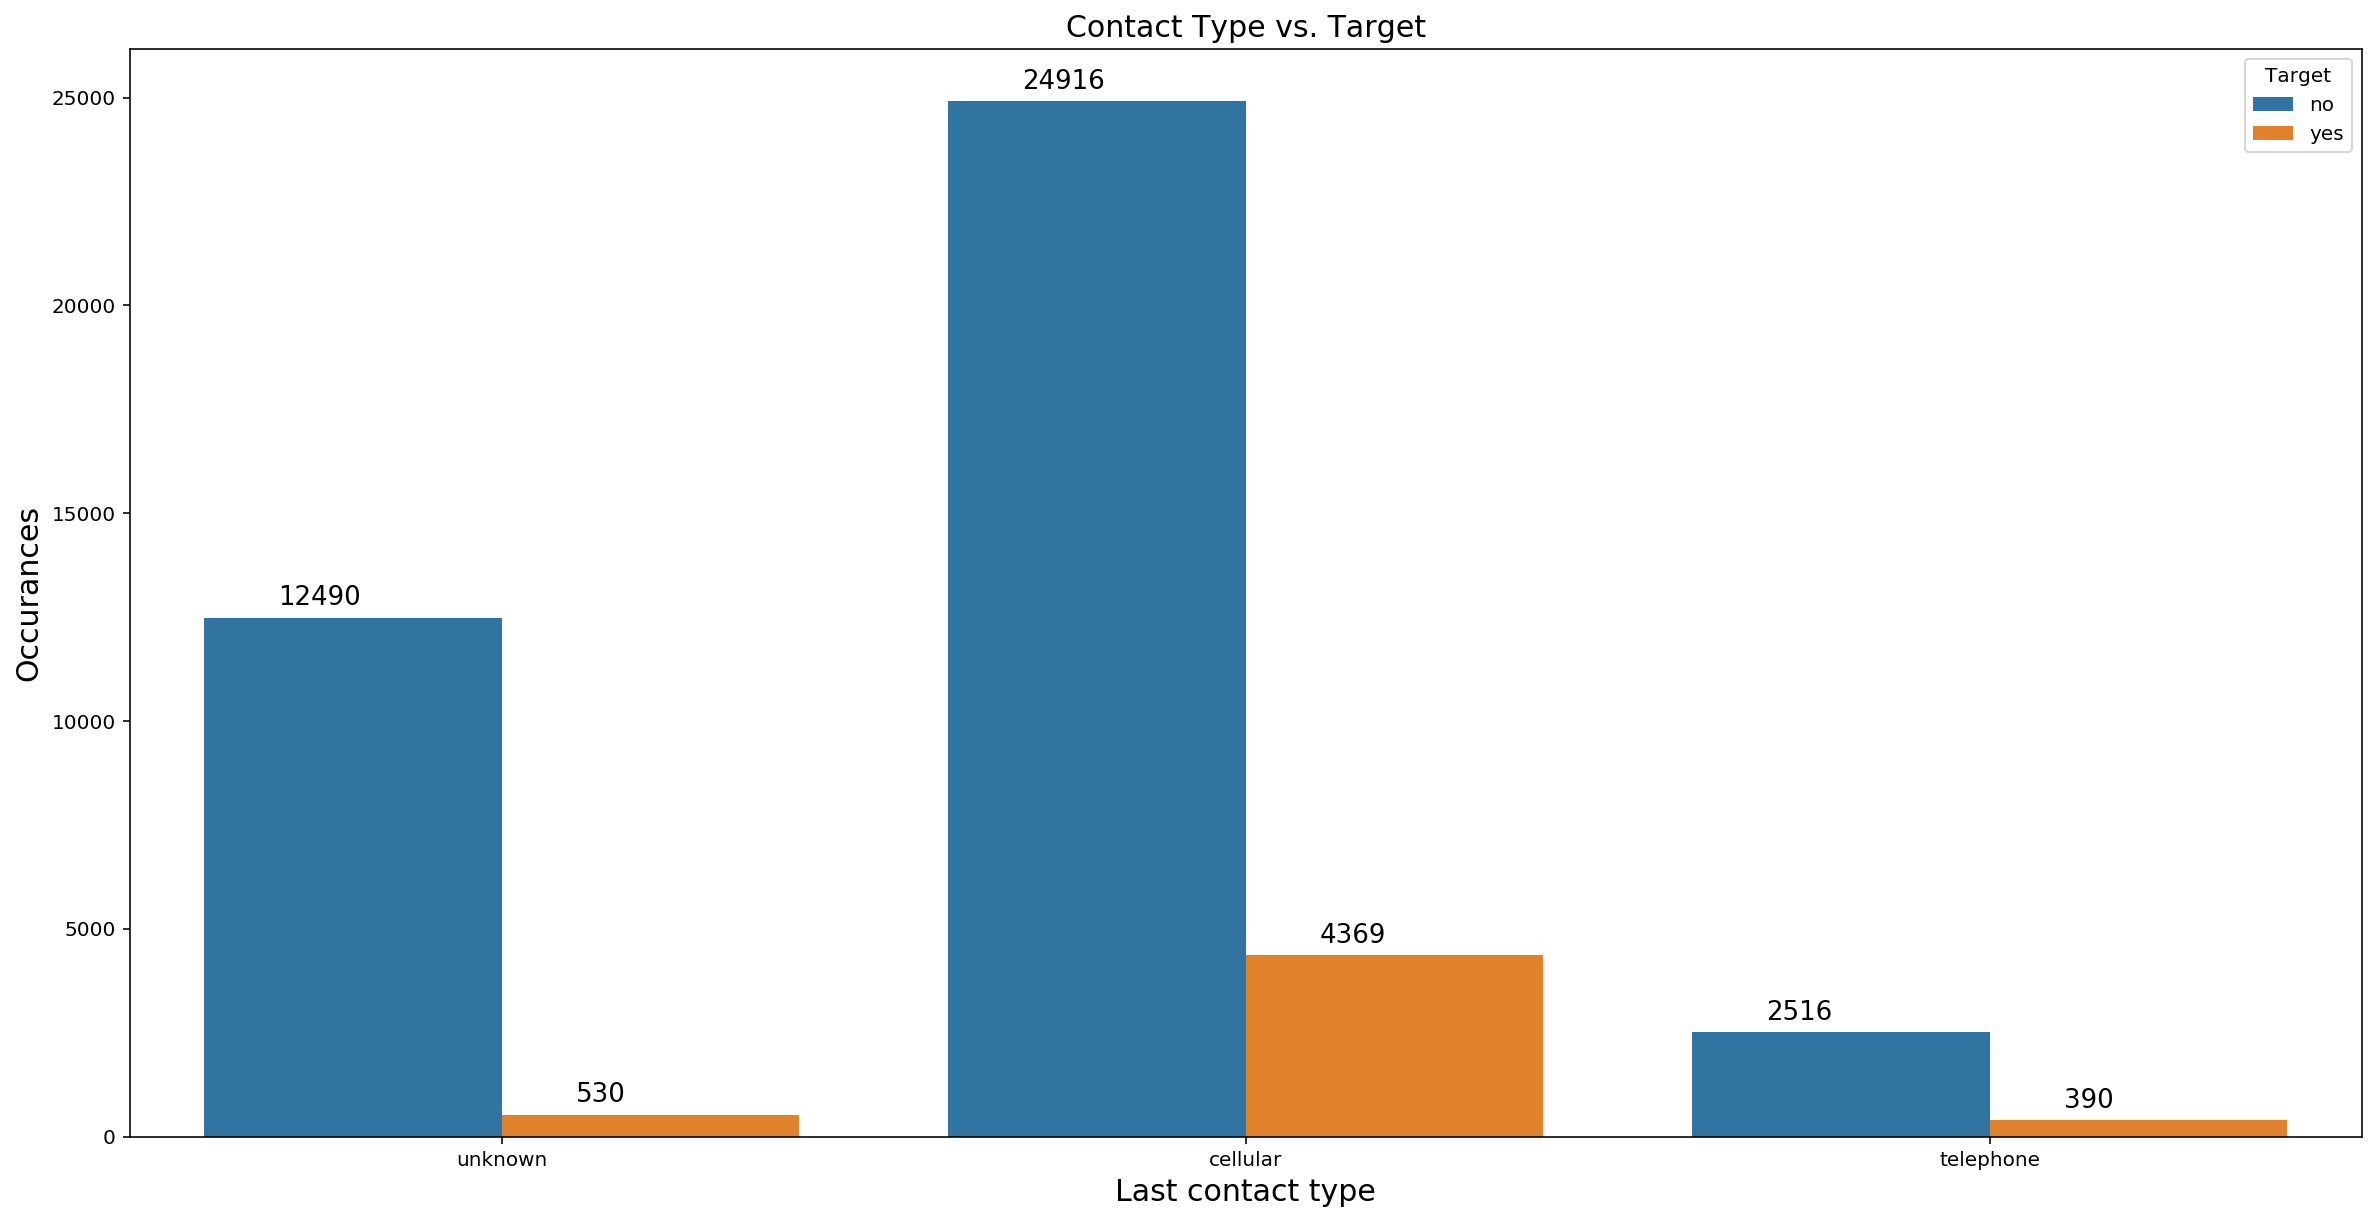

In [66]:
fig, (ax)=plt.subplots(figsize=(20,10))

sns.countplot(data.contact,ax=ax, hue = data.Target)
ax.set_xlabel('Last contact type', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('Contact Type vs. Target', fontsize=15)
ax.tick_params(labelsize=10)
for i in ax.patches:
    ax.text(i.get_x()+0.10, i.get_height()+300, str(round((i.get_height()), 2)), fontsize=13, color='black')

We see that those contact by celluar means are the highest amount of subscribers, with those contacted by telephone being the lowest. The highest conversion rate is for those contacted by celluar means and lowest conversion rate is for those contacted by unknown means.

### Day 

In [67]:
pd.crosstab(data['day'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target        no       yes
day                       
1       0.720497  0.279503
10      0.769084  0.230916
30      0.826948  0.173052
22      0.829834  0.170166
3       0.835032  0.164968
4       0.840830  0.159170
25      0.841667  0.158333
12      0.847785  0.152215
13      0.847950  0.152050
2       0.859242  0.140758
15      0.860247  0.139753
24      0.861298  0.138702
16      0.864311  0.135689
23      0.865815  0.134185
27      0.866191  0.133809
11      0.877620  0.122380
9       0.885330  0.114670
14      0.886364  0.113636
5       0.887435  0.112565
26      0.887923  0.112077
8       0.890879  0.109121
21      0.900790  0.099210
18      0.901213  0.098787
6       0.906315  0.093685
17      0.909232  0.090768
7       0.913594  0.086406
28      0.921858  0.078142
29      0.926074  0.073926
31      0.928460  0.071540
20      0.930233  0.069767
19      0.930563  0.069437

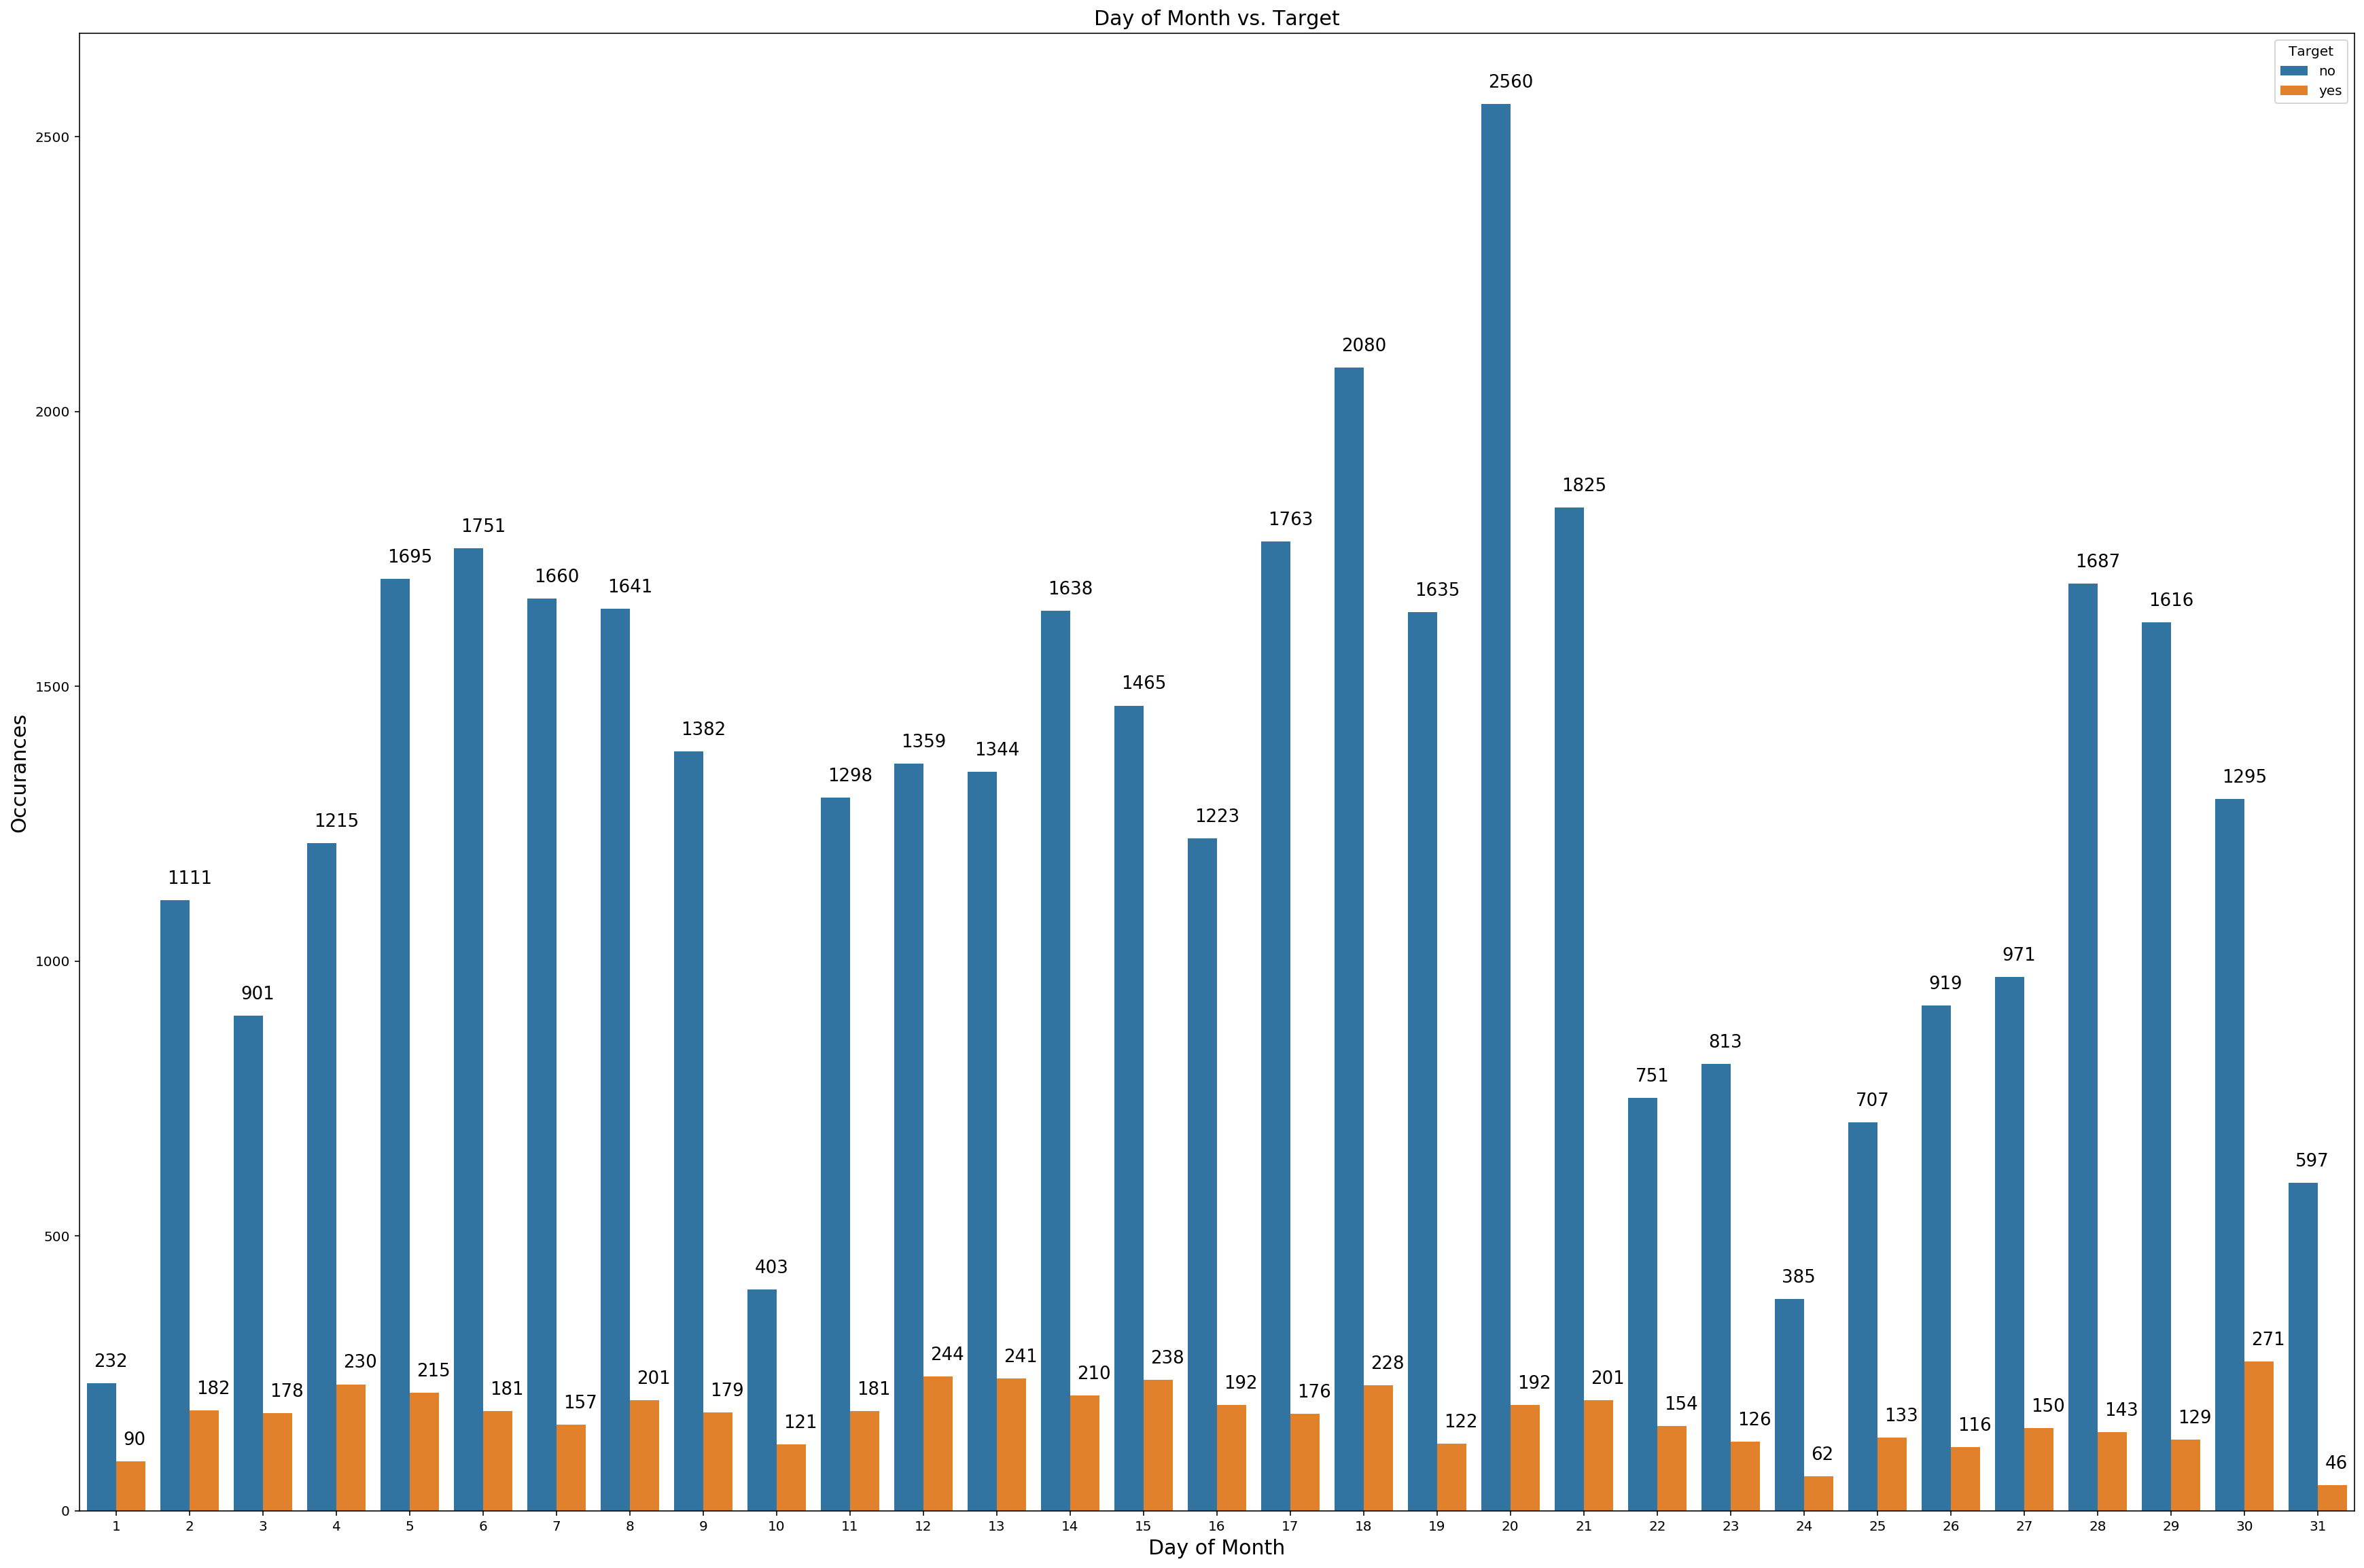

In [68]:
fig, (ax)=plt.subplots(figsize=(30,20))

sns.countplot(data.day,ax=ax, hue = data.Target)
ax.set_xlabel('Day of Month', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('Day of Month vs. Target', fontsize=15)
ax.tick_params(labelsize=10)
for i in ax.patches:
    ax.text(i.get_x()+0.10, i.get_height()+30, str(round((i.get_height()), 2)), fontsize=13, color='black')

As said earlier, this data does not make sense to me, however, from what we see, those contact during the start (4-6th days) and the middle (11-15th days) are having the highest number of subscribers. The highest conversion rates belong to the 1st, 10th and 30th days of the month

### Month 

In [69]:
pd.crosstab(data['month'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target        no       yes
month                     
mar     0.480084  0.519916
dec     0.532710  0.467290
sep     0.535406  0.464594
oct     0.562331  0.437669
apr     0.803206  0.196794
feb     0.833522  0.166478
aug     0.889867  0.110133
jun     0.897772  0.102228
nov     0.898489  0.101511
jan     0.898788  0.101212
jul     0.909065  0.090935
may     0.932805  0.067195

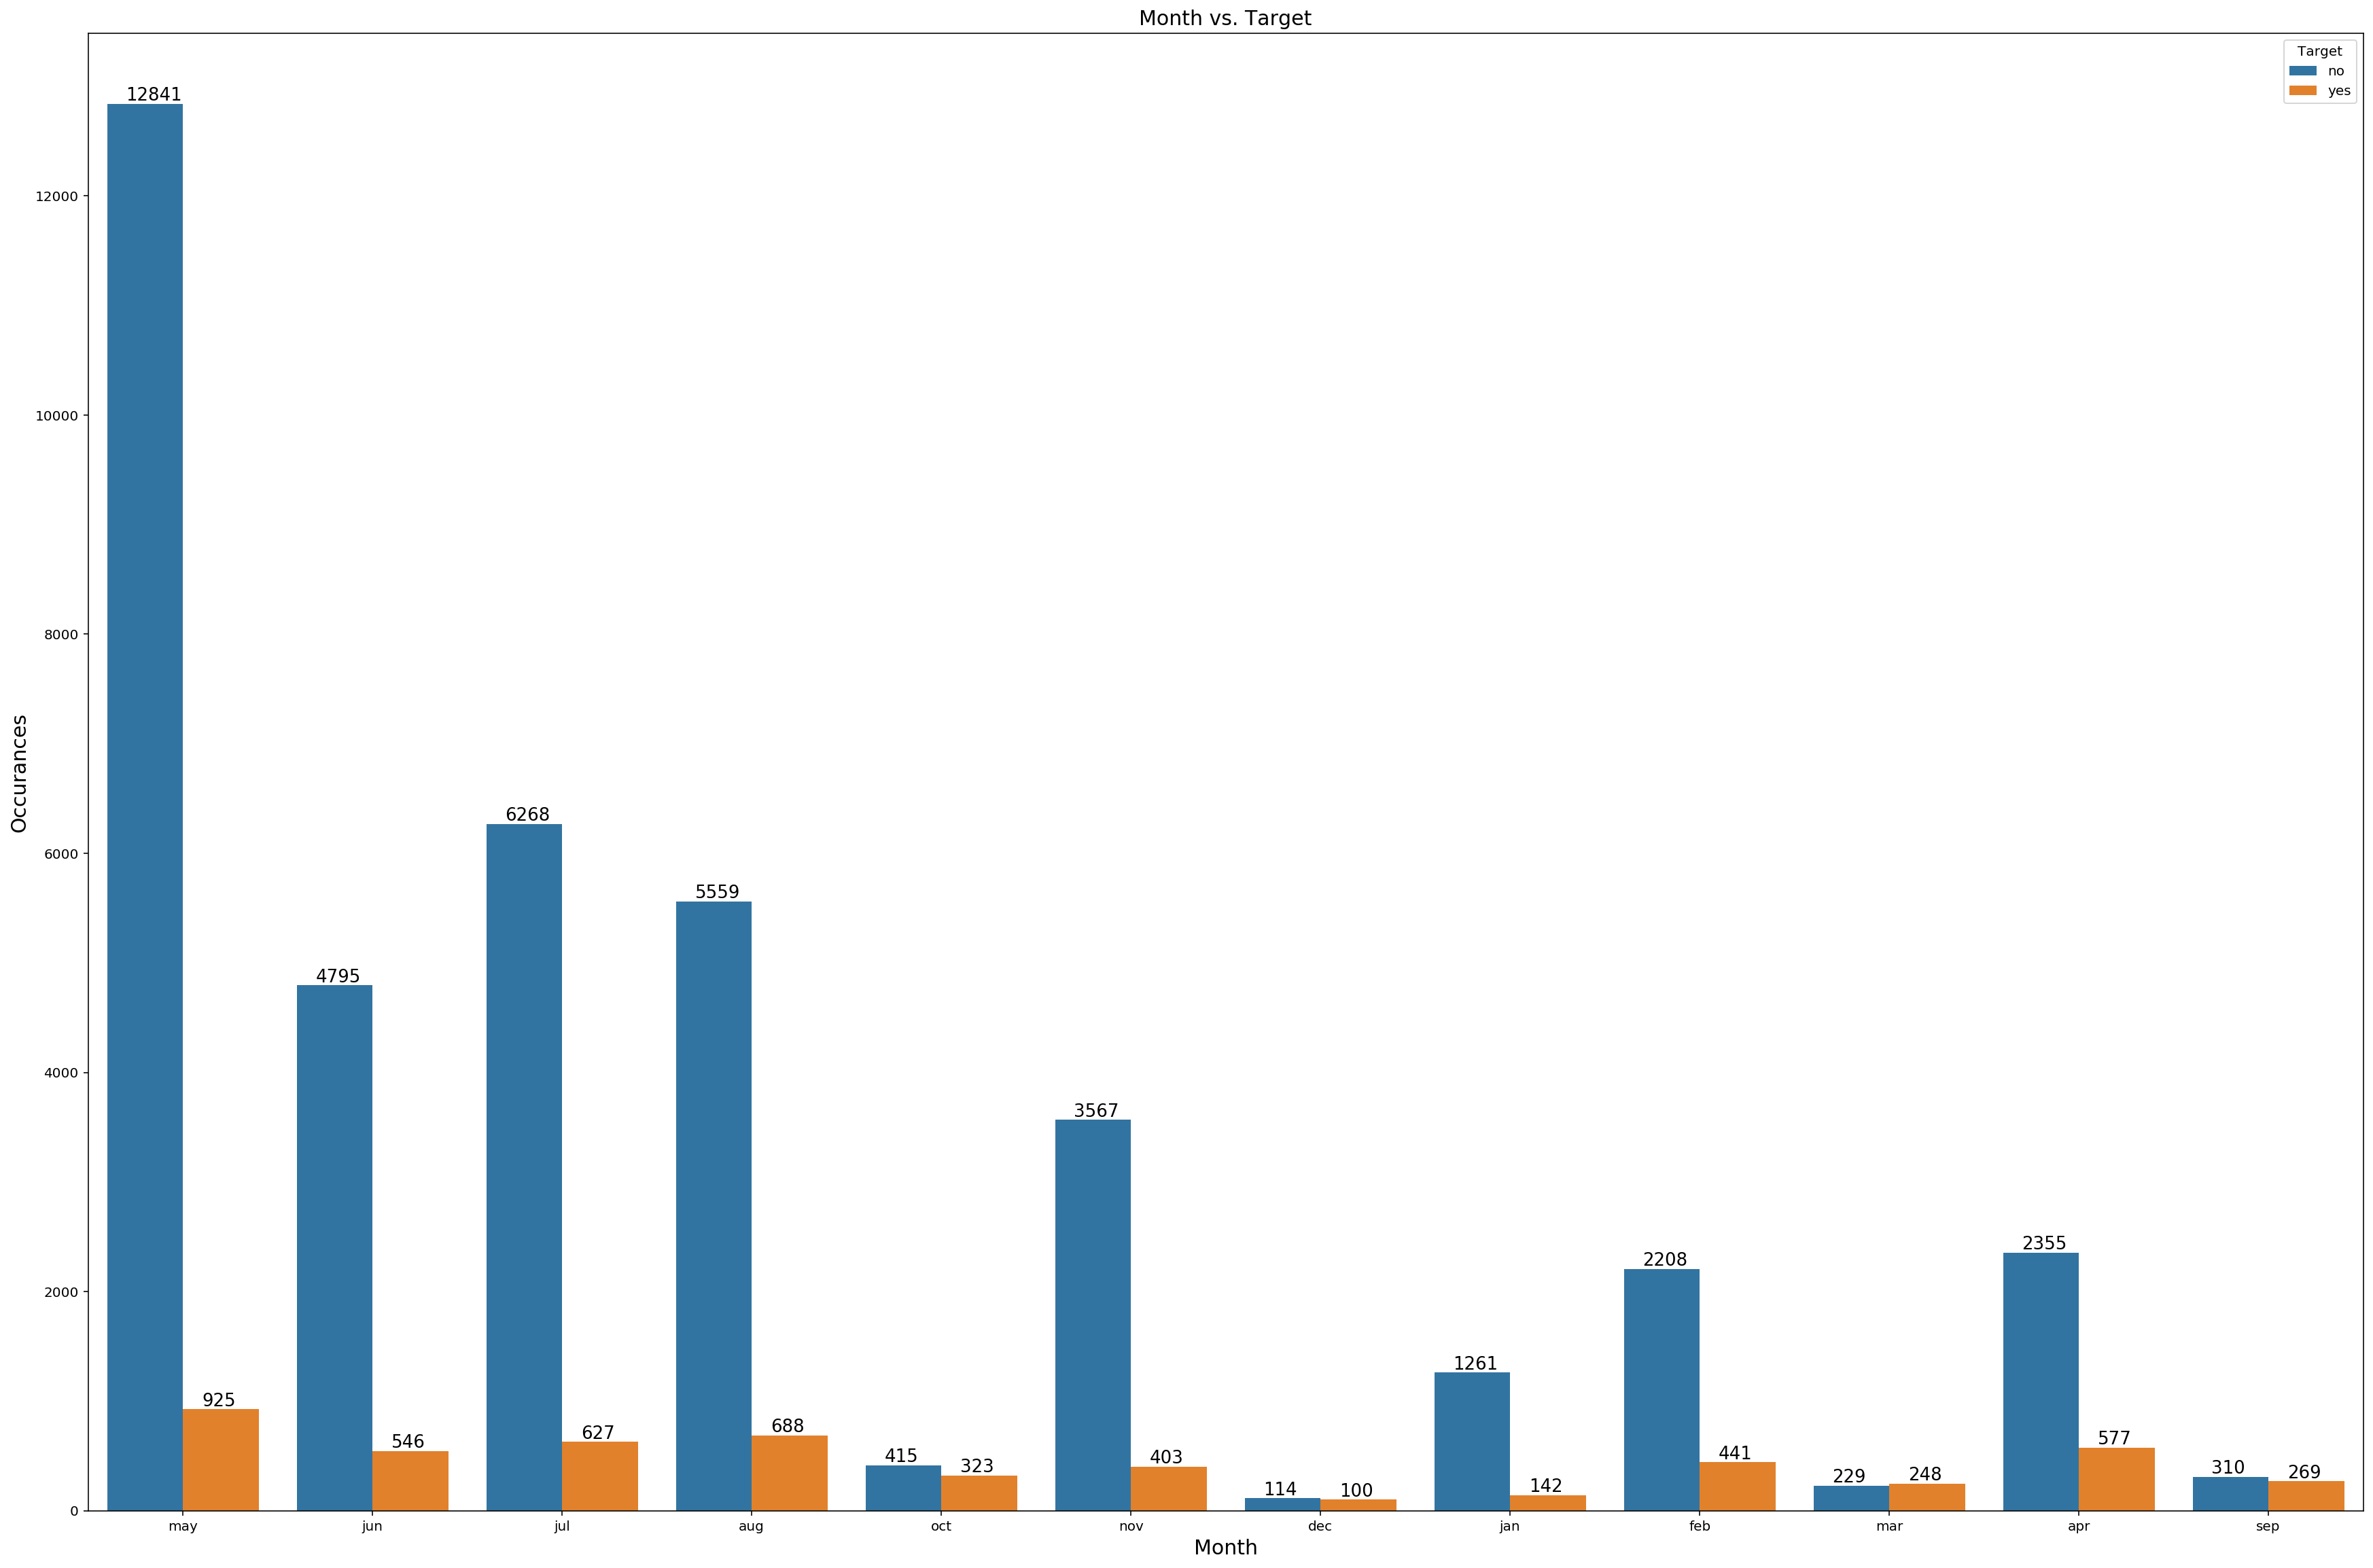

In [70]:
fig, (ax)=plt.subplots(figsize=(30,20))

sns.countplot(data.month,ax=ax, hue = data.Target)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('Month vs. Target', fontsize=15)
ax.tick_params(labelsize=10)
for i in ax.patches:
    ax.text(i.get_x()+0.10, i.get_height()+30, str(round((i.get_height()), 2)), fontsize=13, color='black')

Here, we see that the highest subscribers are from the months of may, withaug and jul closely behind. The highest conversion rates are for the months of march, december, september and and october, which shows that those should be the months the campaign should go at full throttle

###  Campaign

In [71]:
campaign = np.round(data['campaign'].groupby([data.Target]).mean() ,1)
print(campaign)

Target
no     2.8
yes    2.1
Name: campaign, dtype: float64


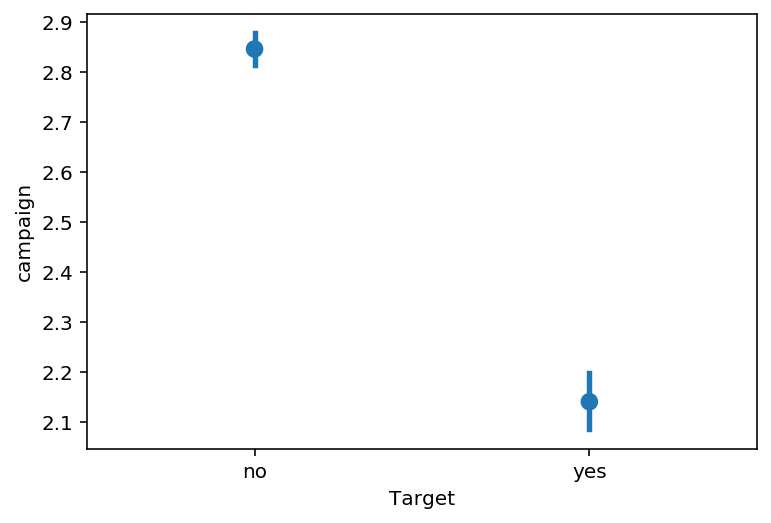

In [72]:
sns.pointplot(x=data.Target,y=data.campaign, join = False)

Here we see that those who were contacted more number of times on average tend not to subscribe vs. those were contacted marginally lesser. A fun point to note is that the persons who were contacted more than 33 times all didn't subscribe. Due to skewness of data and imbalance of this class, we shall drop the campaign data.

In [73]:
data.drop('campaign', inplace = True, axis = 1)

In [74]:
data.head()

age           job  marital  education  balance housing loan  contact  day  \
0   58  white collar  married   tertiary     2143     yes   no  unknown    5   
1   44   blue collar   single  secondary       29     yes   no  unknown    5   
2   33  white collar  married  secondary        2     yes  yes  unknown    5   
3   47   blue collar  married    unknown     1506     yes   no  unknown    5   
4   33         other   single    unknown        1      no   no  unknown    5   

  month  pdays poutcome Target  
0   may     -1    other     no  
1   may     -1    other     no  
2   may     -1    other     no  
3   may     -1    other     no  
4   may     -1    other     no

We have successfully dropped the campaign data

### pdays

In [75]:
pdays = np.round(data['pdays'].groupby([data.Target]).mean() ,1)
print(pdays)

Target
no     36.4
yes    68.7
Name: pdays, dtype: float64


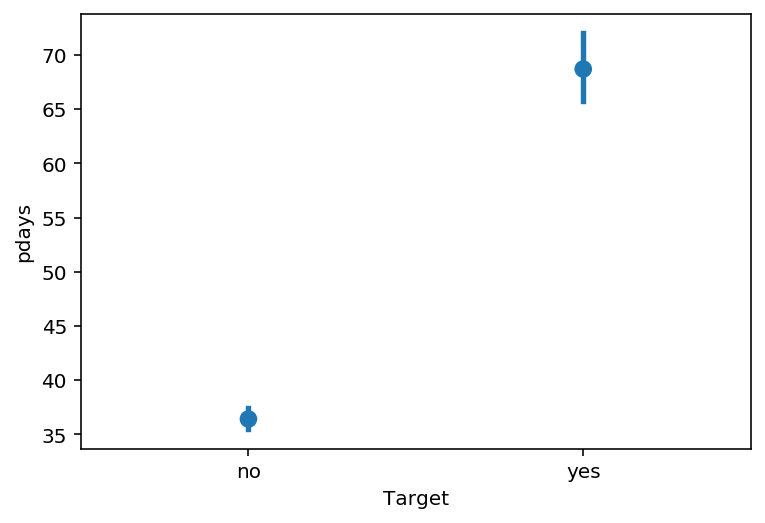

In [76]:
sns.pointplot(x=data.Target,y=data.pdays, join = False)

We see that when more number of days on average passes by before last contact, the person tends to subscribe for the term deposite

### poutcome 

In [77]:
pd.crosstab(data['poutcome'], data['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target          no       yes
poutcome                    
success   0.352747  0.647253
failure   0.873903  0.126097
other     0.904817  0.095183

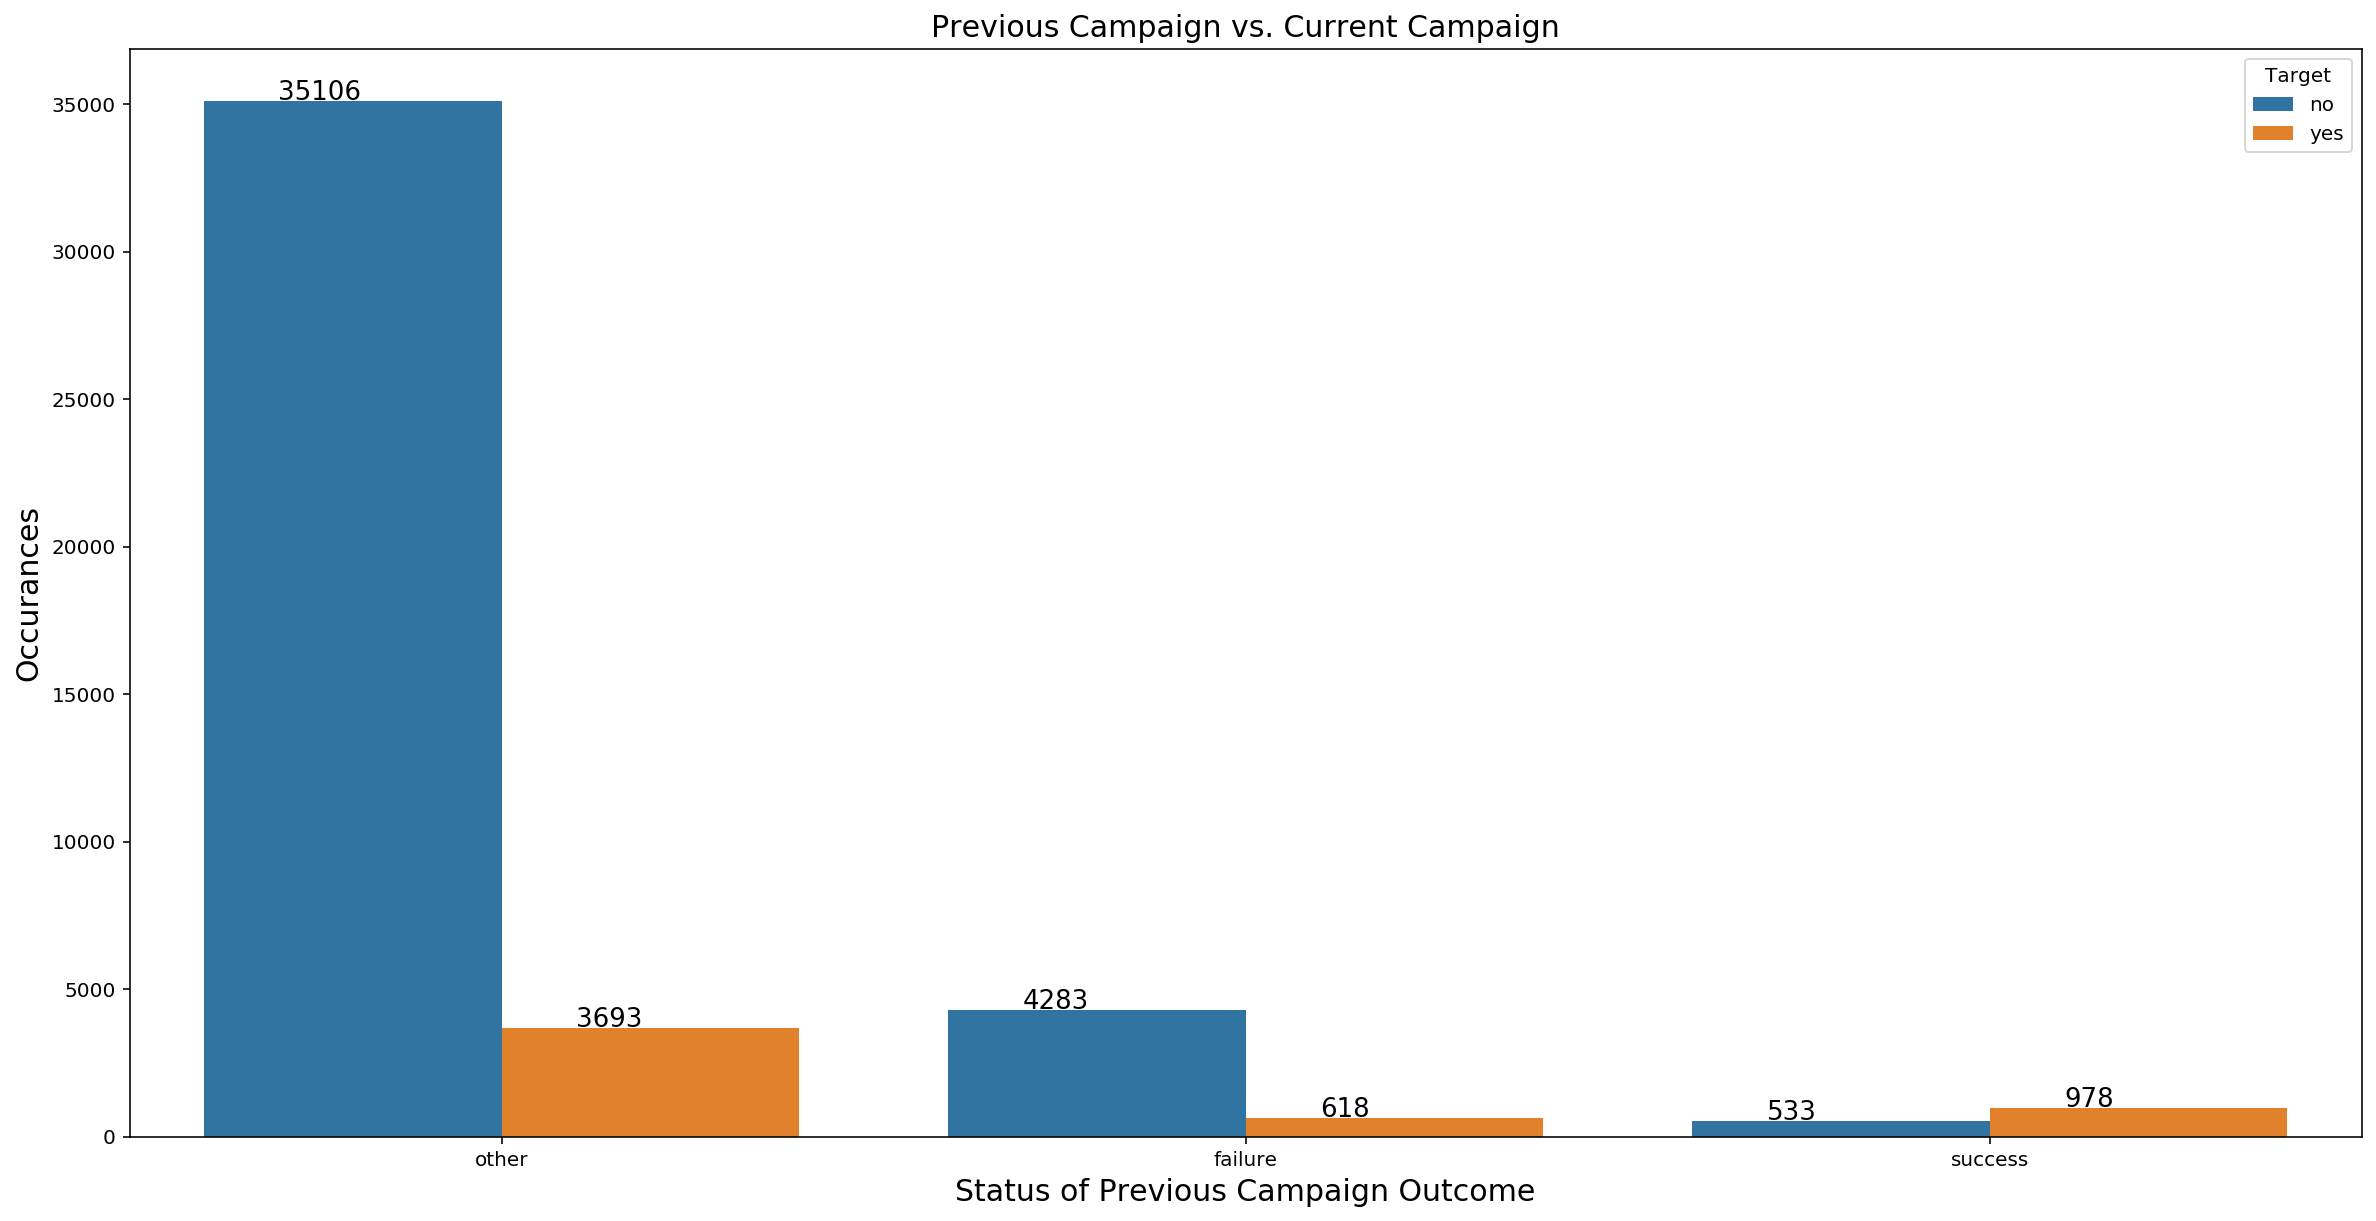

In [78]:
fig, (ax)=plt.subplots(figsize=(20,10))

sns.countplot(data.poutcome,ax=ax, hue = data.Target)
ax.set_xlabel('Status of Previous Campaign Outcome', fontsize=15)
ax.set_ylabel('Occurances', fontsize=15)
ax.set_title('Previous Campaign vs. Current Campaign', fontsize=15)
ax.tick_params(labelsize=10)
for i in ax.patches:
    ax.text(i.get_x()+0.10, i.get_height()+30, str(round((i.get_height()), 2)), fontsize=13, color='black')

We see that the 'other' status of previous campaign outcome is having the highest subscriber and non-subscriber values, which goes to show that this particular data must be recaptured properly as it has a huge impact on our dataset. The highest conversion rate belongs to those who had subscribed previously as well and lowest conversion rate is in the 'other' status of previous campaign.

**With this, we have completed our bivariate analysis of each class (indepenent variable) vs. the Target (dependent variable). We shall now move on to multivariate analysis of all classes**

## Multivariate Analysis 

**In this segment, we shall do two main analysis, the correlation and subsequent heatmap plot, and the pairplot to see general distribution. Let us begin with the pairplot**

### Pair Plot with categories 

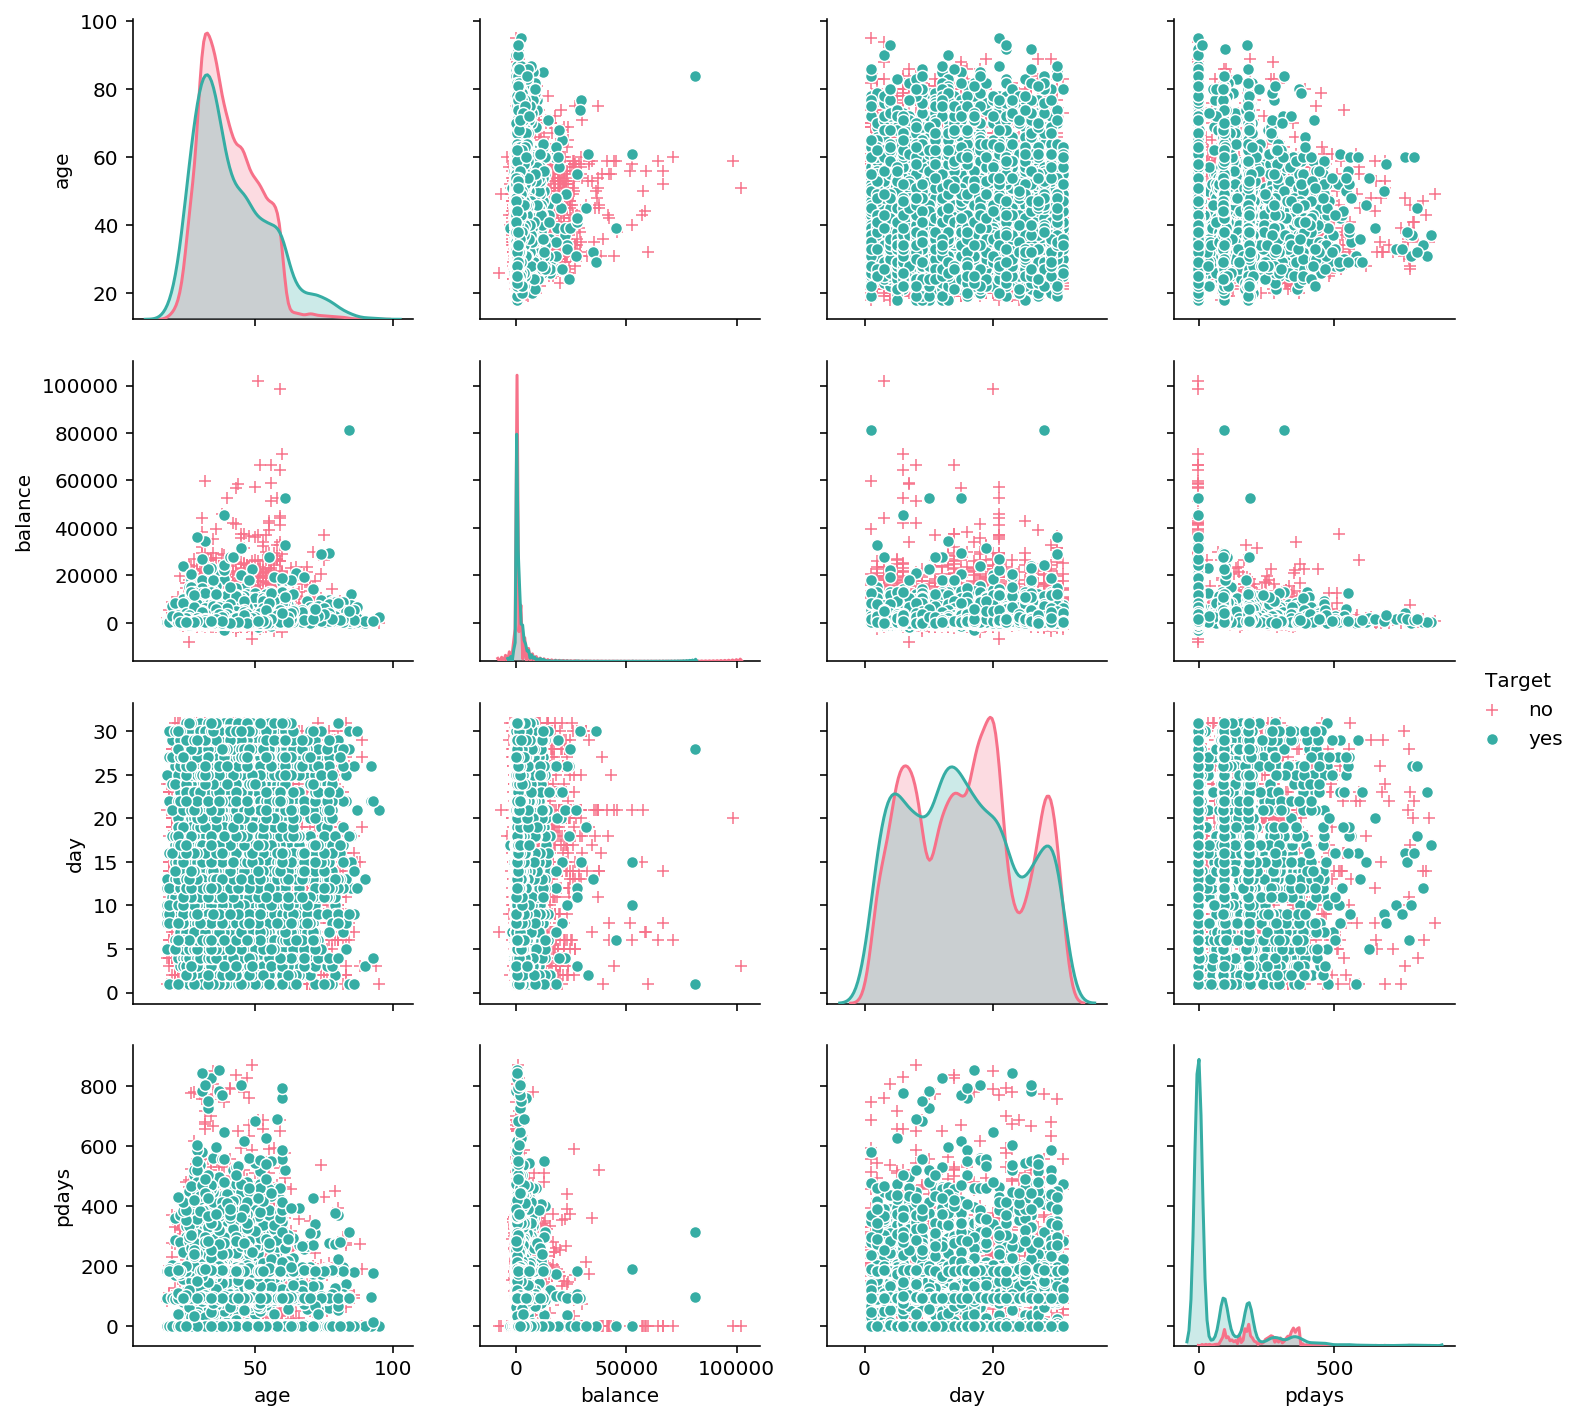

In [79]:
sns.pairplot(data, hue = 'Target', markers = ['+', 'o'], palette="husl");

We see that in the above, we are unable to analyse all the variables as some of them are still categorical and not numerical. Hence, we shall encode the categorical variables into numerical ones.

In [80]:
data2 = data.copy()
labelencoder_X=LabelEncoder()
data2['job']=labelencoder_X.fit_transform(data2['job'])
data2['marital']=labelencoder_X.fit_transform(data2['marital'])
data2['education']=labelencoder_X.fit_transform(data2['education'])
data2['housing']=labelencoder_X.fit_transform(data2['housing'])
data2['loan']=labelencoder_X.fit_transform(data2['loan'])
data2['contact']= labelencoder_X.fit_transform(data2['contact']) 
data2['month']= labelencoder_X.fit_transform(data2['month']) 
data2['poutcome'] = labelencoder_X.fit_transform(data2['poutcome'])
data2['Target'] = labelencoder_X.fit_transform(data2['Target'])

In [81]:
original.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [82]:
data.head()

age           job  marital  education  balance housing loan  contact  day  \
0   58  white collar  married   tertiary     2143     yes   no  unknown    5   
1   44   blue collar   single  secondary       29     yes   no  unknown    5   
2   33  white collar  married  secondary        2     yes  yes  unknown    5   
3   47   blue collar  married    unknown     1506     yes   no  unknown    5   
4   33         other   single    unknown        1      no   no  unknown    5   

  month  pdays poutcome Target  
0   may     -1    other     no  
1   may     -1    other     no  
2   may     -1    other     no  
3   may     -1    other     no  
4   may     -1    other     no

In [83]:
data2.head()

age  job  marital  education  balance  housing  loan  contact  day  month  \
0   58    3        1          2     2143        1     0        2    5      8   
1   44    0        2          1       29        1     0        2    5      8   
2   33    3        1          1        2        1     1        2    5      8   
3   47    0        1          3     1506        1     0        2    5      8   
4   33    1        2          3        1        0     0        2    5      8   

   pdays  poutcome  Target  
0     -1         1       0  
1     -1         1       0  
2     -1         1       0  
3     -1         1       0  
4     -1         1       0

From above, we see that we have created a data set named data2 which has been label encoded to have the categorical variables represented by numerical values. We also have kept the original dataset(original) intact and the categorical dataset (data).

We will now proceed with multivariate analysis using data2 dataset

### Pairplot

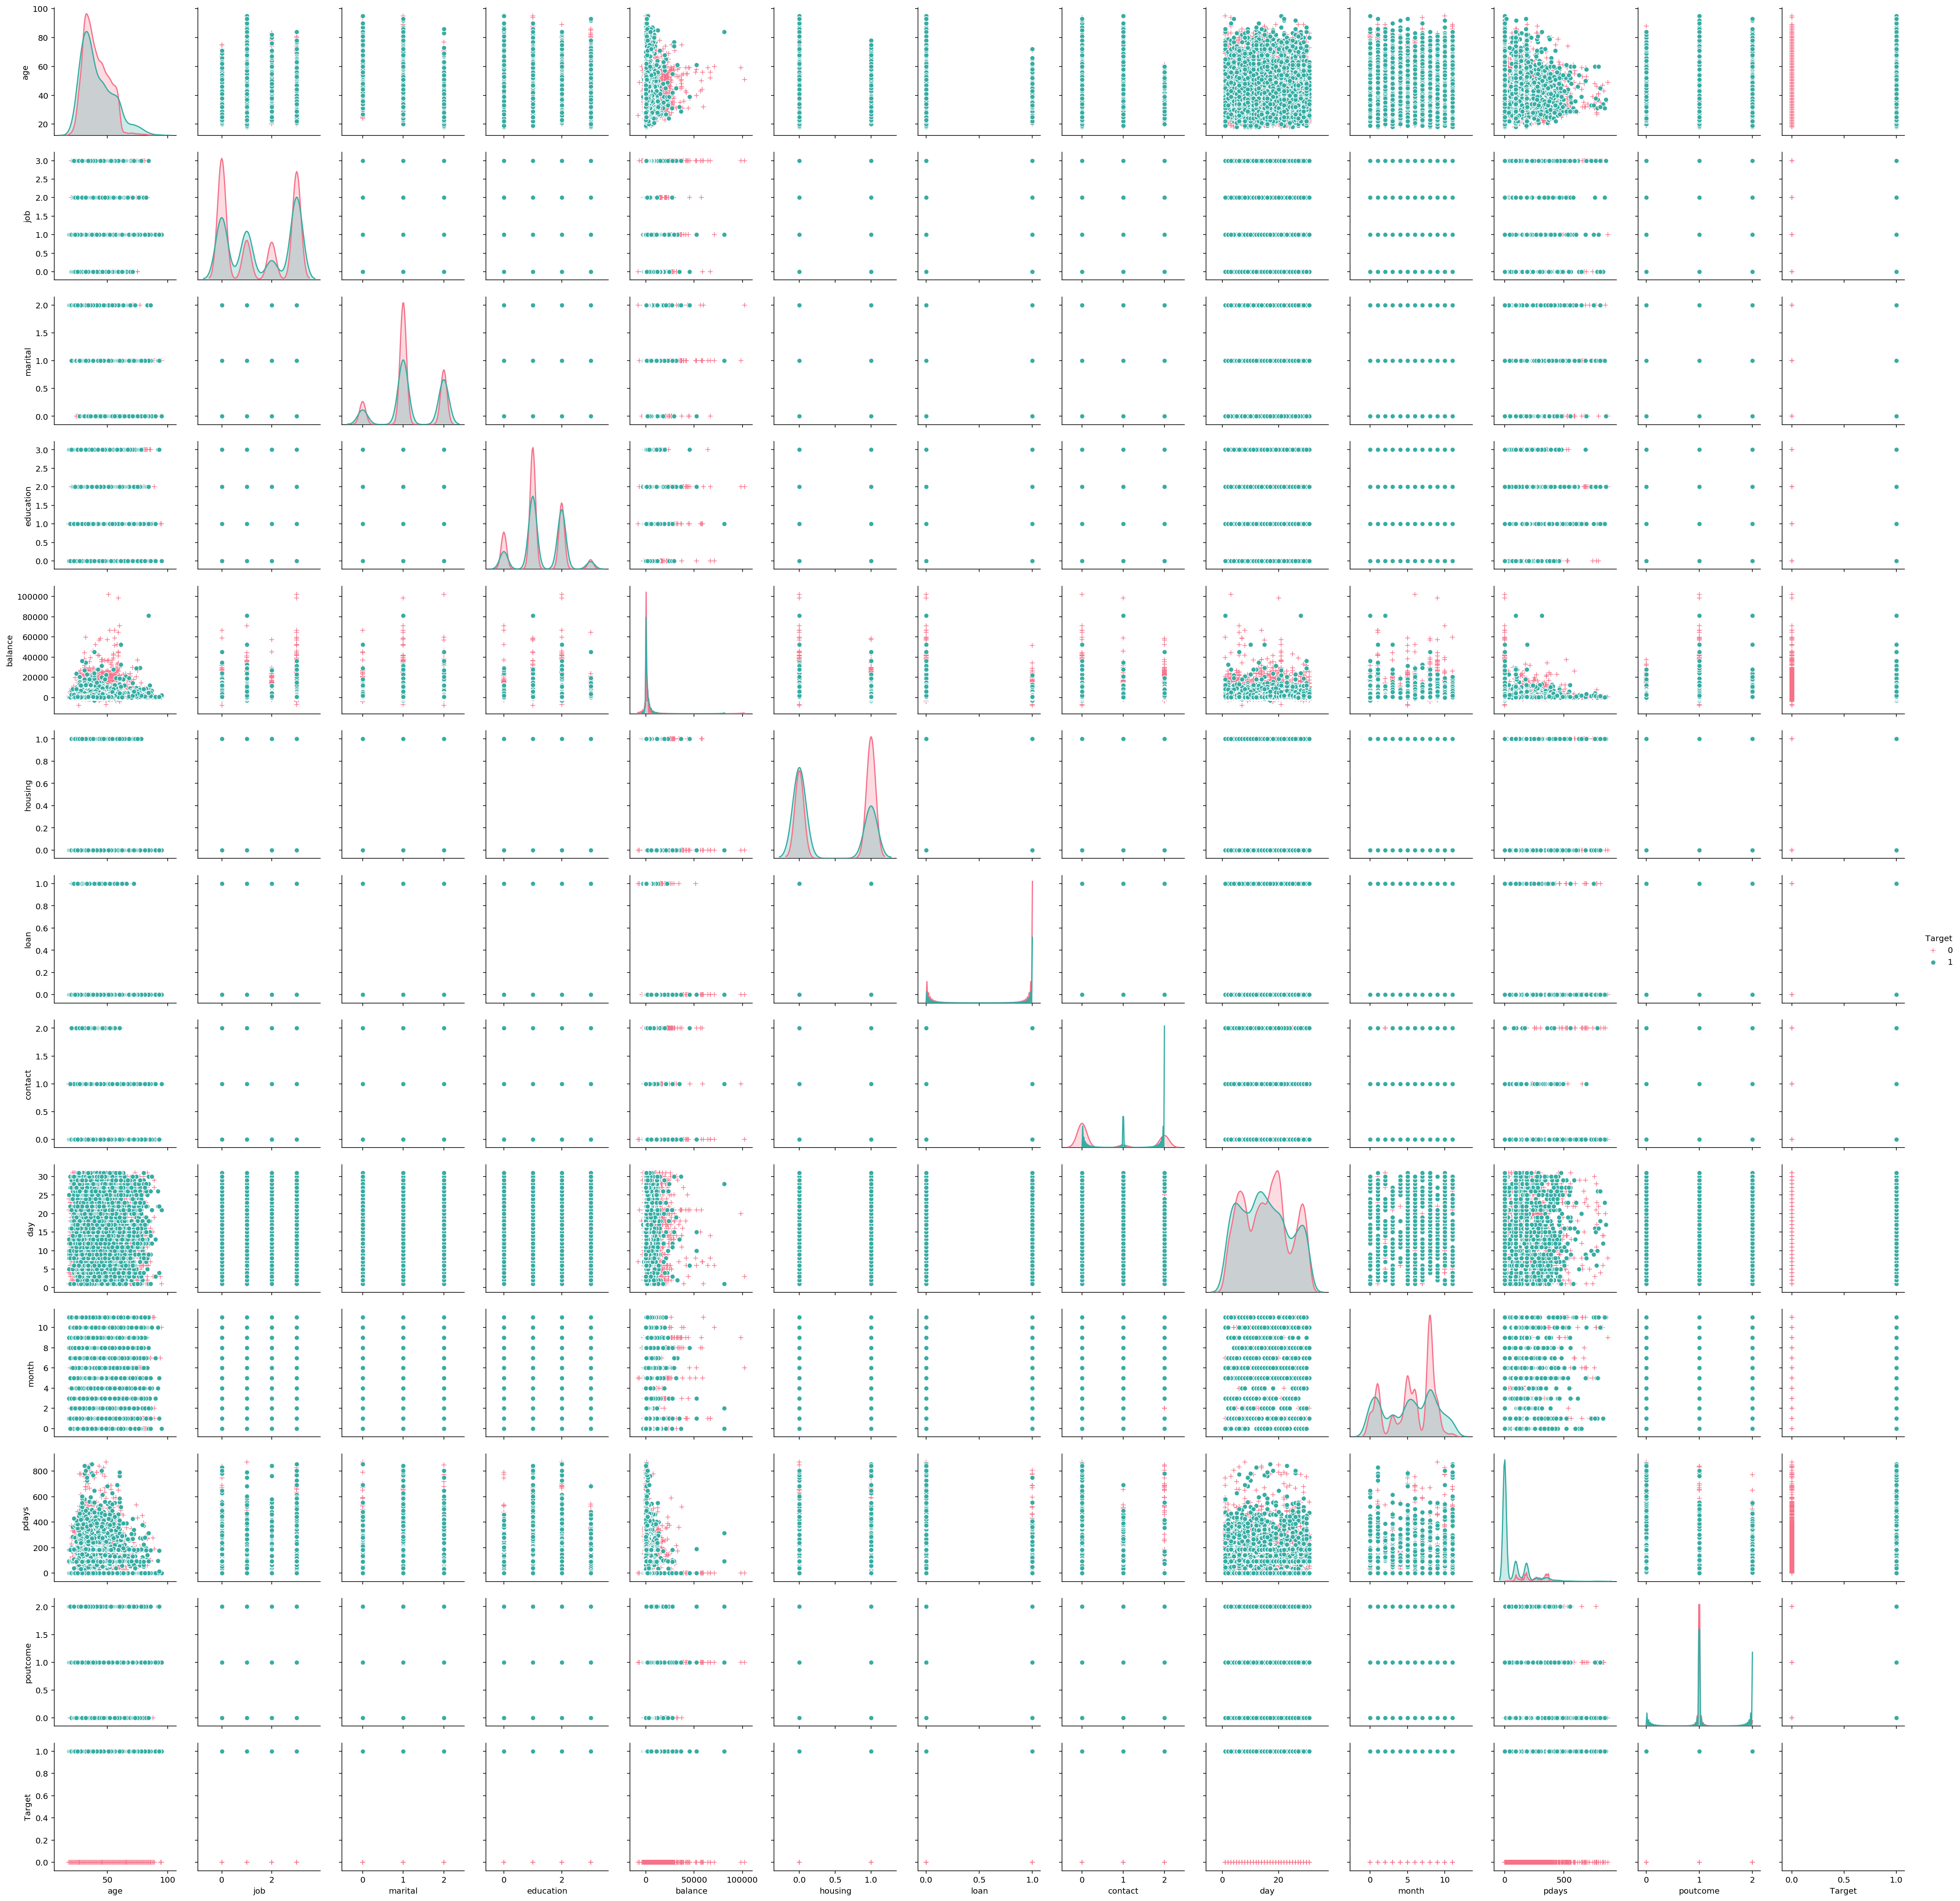

In [84]:
sns.pairplot(data2, hue = 'Target', markers = ['+', 'o'], palette="husl");

### Correlation

In [85]:
cor = data2.corr()
print(cor)

                age       job   marital  education   balance   housing  \
age        1.000000 -0.006065 -0.403240  -0.106807  0.097783 -0.185513   
job       -0.006065  1.000000 -0.000230   0.322660  0.043314 -0.061749   
marital   -0.403240 -0.000230  1.000000   0.108576  0.002122 -0.016096   
education -0.106807  0.322660  0.108576   1.000000  0.064514 -0.090790   
balance    0.097783  0.043314  0.002122   0.064514  1.000000 -0.068768   
housing   -0.185513 -0.061749 -0.016096  -0.090790 -0.068768  1.000000   
loan      -0.015655 -0.002621 -0.046893  -0.048574 -0.084350  0.041323   
contact    0.026221 -0.080152 -0.039201  -0.110928 -0.027273  0.188123   
day       -0.009120  0.003048 -0.005261   0.022671  0.004503 -0.027982   
month     -0.042357 -0.007700 -0.006991  -0.057304  0.019777  0.271481   
pdays     -0.023758 -0.000490  0.019172   0.000052  0.003435  0.124178   
poutcome   0.021452  0.004146  0.006857   0.016835  0.007174 -0.134456   
Target     0.025155  0.034855  0.04558

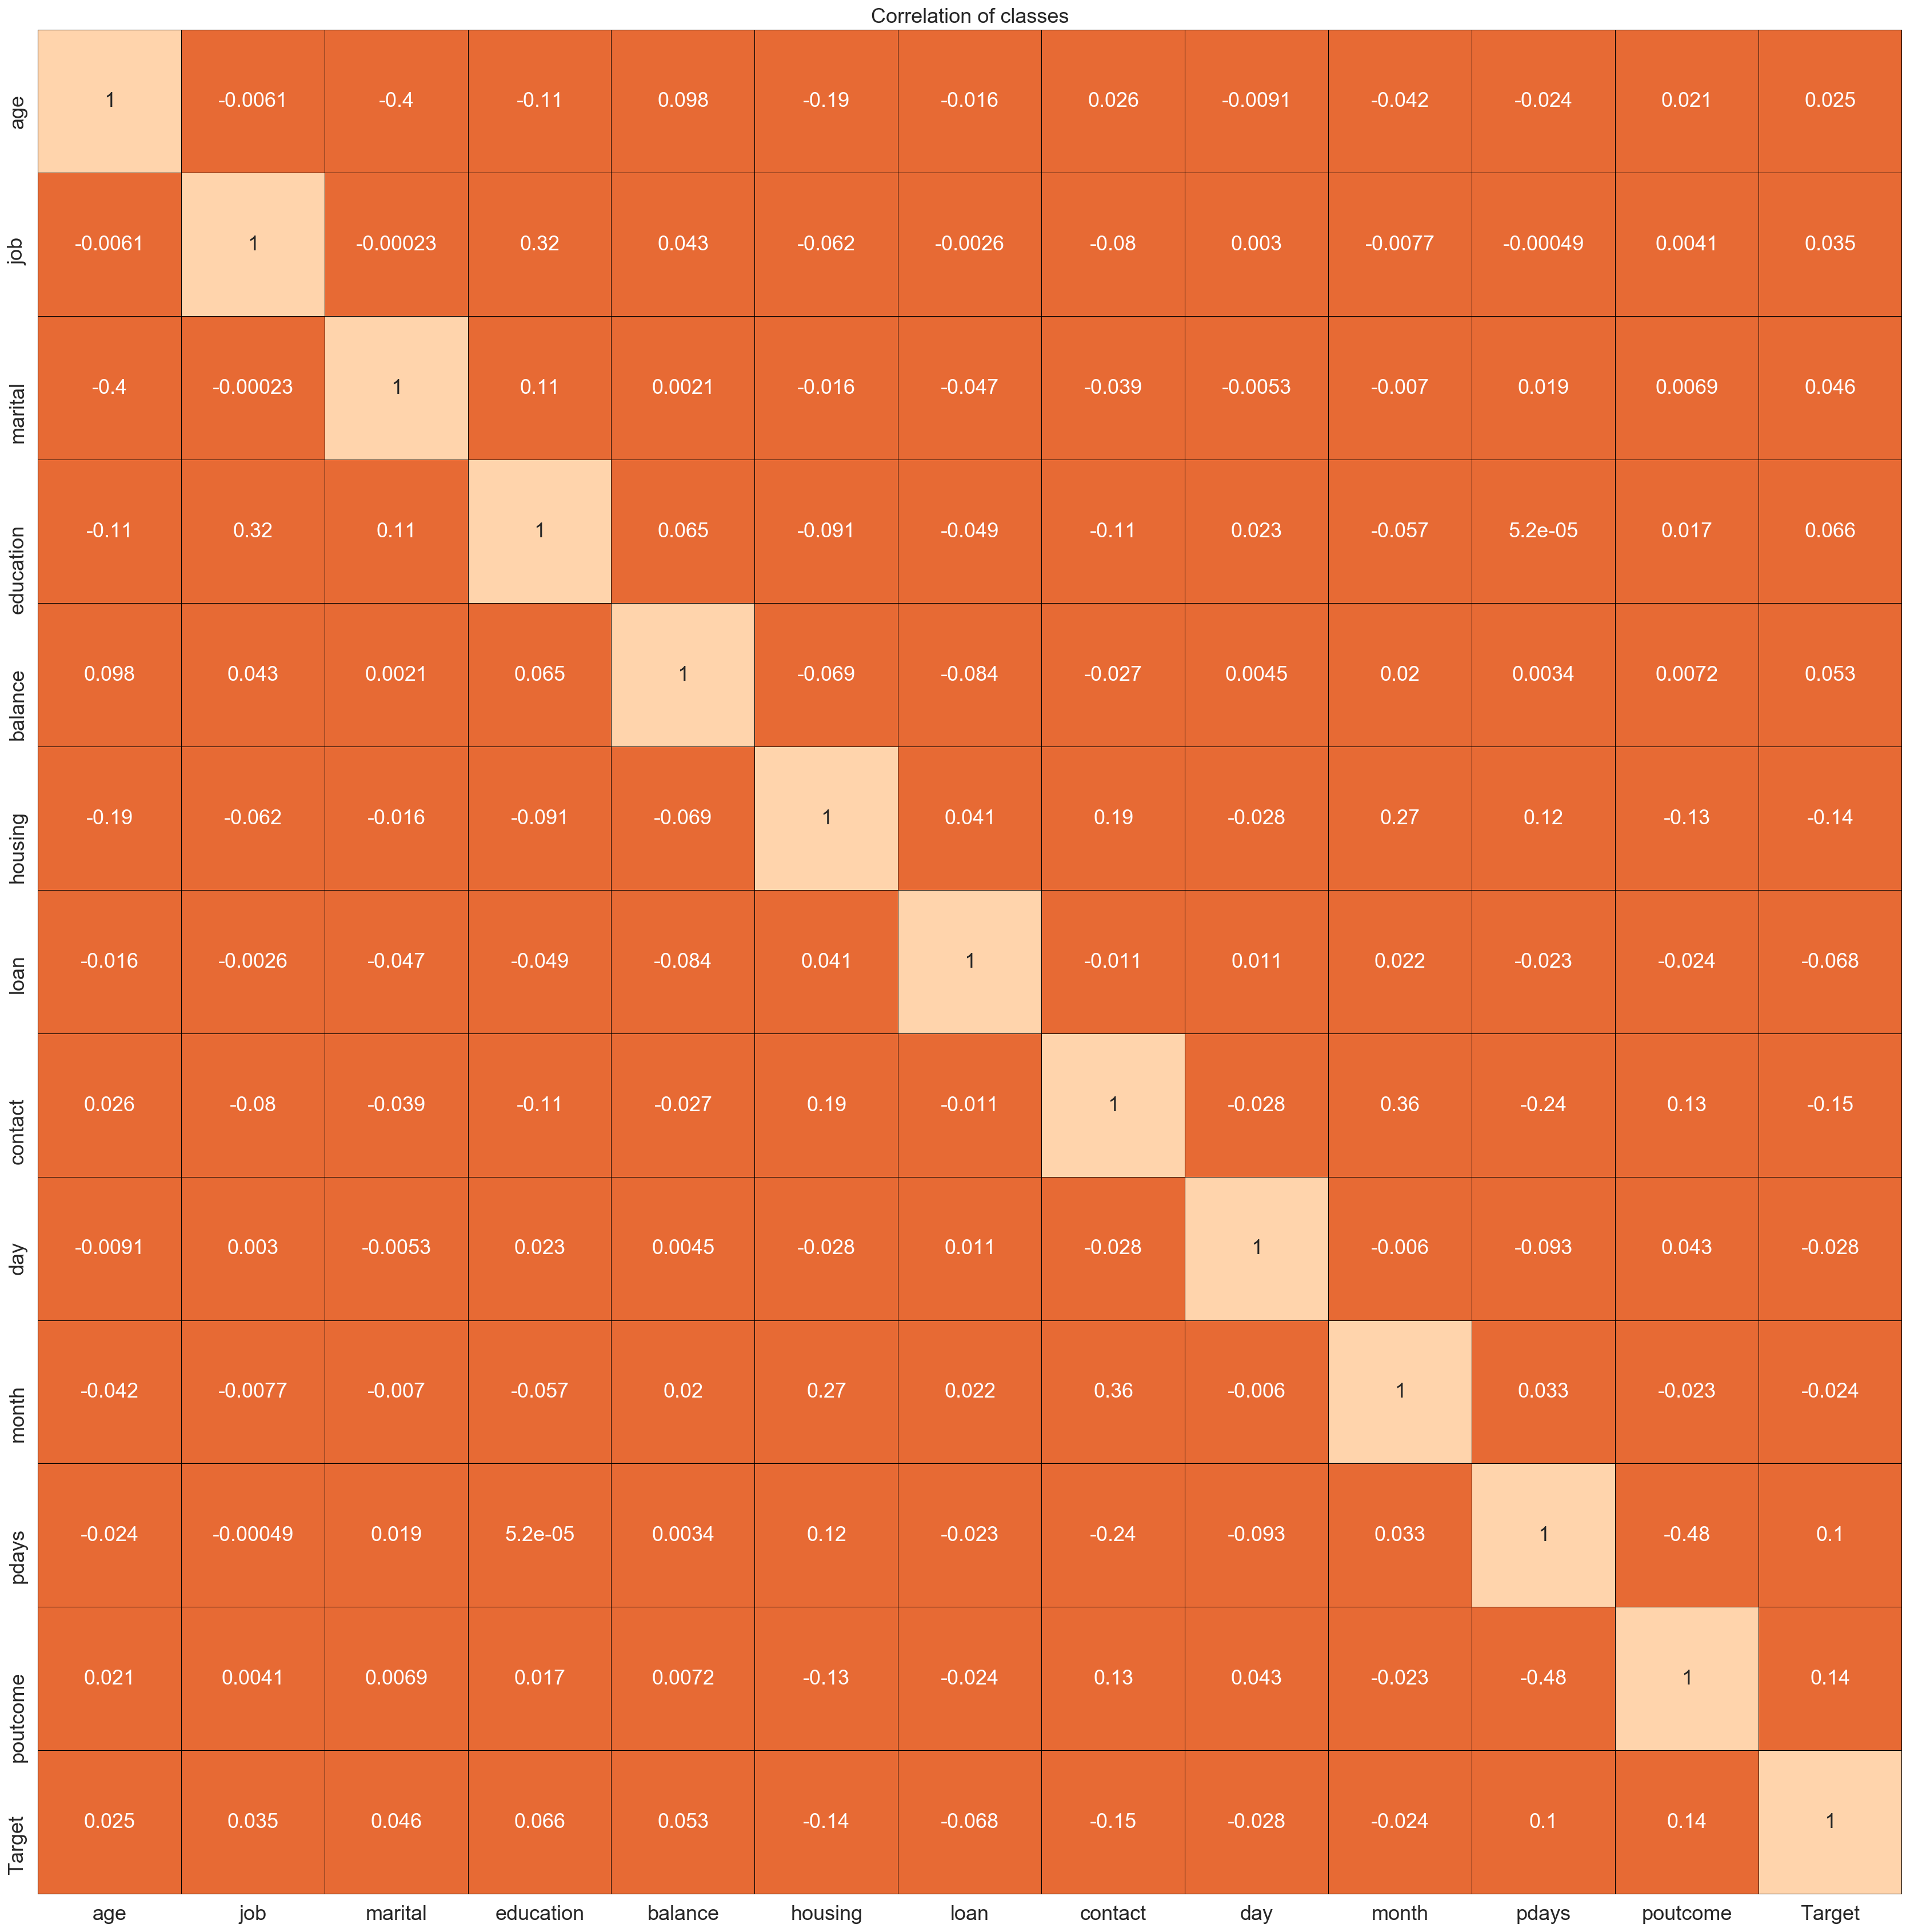

In [86]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(30,30))
sns.heatmap(cor,vmin=0.7, annot=True,linewidths=0.02,center=0,linecolor="black",cbar=False,square=True)
plt.title('Correlation of classes',fontsize=18)
ax.tick_params(labelsize=18)

Above, we see that the highest relations with positive correlation are between Target and Job, Target and poutcome, target and pdays and some negative correlation between Target and housing and Target and contact

**With this, we have completed Exploratory Data Analytics on the dataset. Now, we can apply the decision tree model and gradient boosting to the dataset and see our prediction values**

# Part 3: Predictive Modelling Using Decision Tree and Gradient Boost Ensemble Technique

**Here, we must take care of the imbalance in the Target class and normalize the data to get better results**

## Train-Test Split 

Splitting into independant (x) and dependant (y) groups

In [87]:
x=data2.loc[:,data2.columns!='Target']
y=data2.loc[:,data2.columns=='Target']

Splitting into train and test dataset

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
columns=x_train.columns

## Balancing and Normalizing 

Now, we will normalize the data

In [89]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Now, we will take care of the imbalance we saw in the Target class

In [90]:
imbalance=SMOTE(random_state=100)
# now use SMOTE to oversample our train data which have features data_train_X and labels in data_train_y
im_x,im_y=imbalance.fit_sample(x_train,y_train)
im_x=pd.DataFrame(data=im_x,columns=columns)
im_y=pd.DataFrame(im_y,columns=['Target'])

In [91]:
print('The oversampled data has this many values now: ',len(im_x))
print('Percentage of >yes< is: ' ,len(im_y[im_y['Target']==0])/len(im_x)*100)

The oversampled data has this many values now:  55846
Percentage of >yes< is:  50.0


We see from above that we have increased total no. of observations and proportioned the imbalnce to be 50-50

We can now proceed to apply Decision Tree Model

## Decision Tree Model

### Normal Decision Tree 

In [92]:
model1 = DecisionTreeClassifier(criterion = 'entropy',random_state=8 )
model1.fit(im_x,im_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=8, splitter='best')

In [93]:
y_predict = model1.predict(x_test)
accu=metrics.accuracy_score(y_test, y_predict)
pres = metrics.precision_score(y_test,y_predict)
rec = metrics.recall_score(y_test, y_predict)
print("Accuracy of our Decision Tree Model is: ", accu)
print("Precision of our Decision Tree Model is: ", pres)
print("Recall of our Decision Tree Model is: ", rec)

Accuracy of our Decision Tree Model is:  0.8156885874373341
Precision of our Decision Tree Model is:  0.27382680212868893
Recall of our Decision Tree Model is:  0.36166134185303517


In [94]:
print('Confusion Matrix of Normal Model: \n',metrics.confusion_matrix(y_test, y_predict))
print('Classification report of Normal Model: \n',metrics.classification_report(y_test, y_predict))  

Confusion Matrix of Normal Model: 
 [[10498  1501]
 [  999   566]]
Classification report of Normal Model: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89     11999
           1       0.27      0.36      0.31      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.62      0.60     13564
weighted avg       0.84      0.82      0.83     13564



In [95]:
print (pd.DataFrame(model1.feature_importances_, index = data2.drop('Target', axis = 1).columns))

                  0
age        0.122021
job        0.043079
marital    0.028993
education  0.046022
balance    0.142329
housing    0.019920
loan       0.012031
contact    0.067409
day        0.186716
month      0.223435
pdays      0.034547
poutcome   0.073500


From above, we see that the impact of month, day, balance and age are highest w.r.t. this model

###  Pruning the overgrown tree

In [96]:
model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7,random_state=8,min_samples_leaf=5)
model2.fit(im_x, im_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=8, splitter='best')

In [97]:
y_predict = model2.predict(x_test)
accu = metrics.accuracy_score(y_test, y_predict)
pres = metrics.precision_score(y_test,y_predict)
rec = metrics.recall_score(y_test, y_predict)
print("Accuracy of our Pruned Decision Tree Model is: ", accu)
print("Precision of our Pruned Decision Tree Model is: ", pres)
print("Recall of our Pruned Decision Tree Model is: ", rec)

Accuracy of our Pruned Decision Tree Model is:  0.8106753170156296
Precision of our Pruned Decision Tree Model is:  0.3065946779791747
Recall of our Pruned Decision Tree Model is:  0.5079872204472844


In [98]:
print('Confusion Matrix of Pruned Model: \n',metrics.confusion_matrix(y_test, y_predict))
print('Classification report of Pruned Model: \n',metrics.classification_report(y_test, y_predict))  

Confusion Matrix of Pruned Model: 
 [[10201  1798]
 [  770   795]]
Classification report of Pruned Model: 
               precision    recall  f1-score   support

           0       0.93      0.85      0.89     11999
           1       0.31      0.51      0.38      1565

    accuracy                           0.81     13564
   macro avg       0.62      0.68      0.64     13564
weighted avg       0.86      0.81      0.83     13564



In [99]:
print (pd.DataFrame(model2.feature_importances_, index = data2.drop('Target', axis = 1).columns))

                  0
age        0.017717
job        0.008002
marital    0.000921
education  0.031524
balance    0.096491
housing    0.058518
loan       0.000000
contact    0.251528
day        0.031863
month      0.216698
pdays      0.004412
poutcome   0.282326


From the pruned model, we see that poutcome has the highest impact, followed by contact and month

**We see that both the normal and pruned Decision Trees are having a good accuracy, but a low recal and precision value. This may suggest that we might have either dropped classes which were needed, or may have combined one too many classes in jobs and poutcome. We can validate our theory and attempt to arrive at best model by attempting all possible combinations of dropping classes/combining categories and reapply our decision tree. For the sake of submitting this project in time, I will stop here and move on to Random Forest Classifier**

## Random Forest Classification 

In [100]:
rf = RandomForestClassifier(n_estimators = 50,random_state=100)
rf = rf.fit(im_x,im_y)

In [101]:
y_predict = rf.predict(x_test)
accu = metrics.accuracy_score(y_test, y_predict)
pres = metrics.precision_score(y_test,y_predict)
rec = metrics.recall_score(y_test, y_predict)
print("Accuracy of our Random Forest is: ", accu)
print("Precision of our Random Forest is: ", pres)
print("Recall of our Random Forest is: ", rec)

Accuracy of our Random Forest is:  0.8731937481568859
Precision of our Random Forest is:  0.44106463878326996
Recall of our Random Forest is:  0.3706070287539936


In [102]:
print('Confusion Matrix of Random Forest Model: \n',metrics.confusion_matrix(y_test, y_predict))
print('Classification report of Random Forest Model: \n',metrics.classification_report(y_test, y_predict))  

Confusion Matrix of Random Forest Model: 
 [[11264   735]
 [  985   580]]
Classification report of Random Forest Model: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     11999
           1       0.44      0.37      0.40      1565

    accuracy                           0.87     13564
   macro avg       0.68      0.65      0.67     13564
weighted avg       0.86      0.87      0.87     13564



Here as well, we see the accuracy is decent, but having low precision and low recall

## Ensemble Technique - GradientBoost

In [103]:
gb = GradientBoostingClassifier(n_estimators = 50,random_state=100)
gb = gb.fit(im_x, im_y)

In [104]:
y_predict = gb.predict(x_test)
accu = metrics.accuracy_score(y_test, y_predict)
pres = metrics.precision_score(y_test,y_predict)
rec = metrics.recall_score(y_test, y_predict)
print("Accuracy of our Gradient Boost model is: ", accu)
print("Precision of our Gradient Boost model is: ", pres)
print("Recall of our Gradient Boost model is: ", rec)

Accuracy of our Gradient Boost model is:  0.8214391035092893
Precision of our Gradient Boost model is:  0.3376278893520273
Recall of our Gradient Boost model is:  0.5693290734824281


In [105]:
print('Confusion Matrix of Gradient Boost Model: \n',metrics.confusion_matrix(y_test, y_predict))
print('Classification report of Gradient Boost Model: \n',metrics.classification_report(y_test, y_predict))  

Confusion Matrix of Gradient Boost Model: 
 [[10251  1748]
 [  674   891]]
Classification report of Gradient Boost Model: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     11999
           1       0.34      0.57      0.42      1565

    accuracy                           0.82     13564
   macro avg       0.64      0.71      0.66     13564
weighted avg       0.87      0.82      0.84     13564



# Part 4: Conclusion 

**As seen above, we see that our gradient boost ensemble technique is giving a good accuracy, decent precision, but low recall. As said earlier, the dropping of classes and combination of classes might have to be revisted. Also, apply other techniques not in scope of this project, such as bagging, NaiveBayes, regression techniques can also be tested.**

**In conclusion, the Random Forest gives the best accuracy and best precision values. The Gradient boost technique gives the best recall value. Since recall is of importance to avoid false negatives, we can go with gradient boost method or choose random forest for better accuracy and precision**

# This concludes the project